In [1]:
!pip install av

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.7/39.7 MB 46.0 MB/s eta 0:00:00


# Cell 1: ÂØºÂÖ•Â∫ìÂíåÁéØÂ¢ÉËÆæÁΩÆ

In [2]:
# Cell 1: ÂØºÂÖ•Â∫ìÂíåÁéØÂ¢ÉËÆæÁΩÆ

# ‰øÆÂ§çCUDAÂ§öËøõÁ®ãÈóÆÈ¢ò
import multiprocessing as mp
try:
    mp.set_start_method('spawn', force=True)
except RuntimeError:
    pass  # Â¶ÇÊûúÂ∑≤ÁªèËÆæÁΩÆËøáÔºåÂøΩÁï•ÈîôËØØ

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import warnings
import gc
import json
import time
import sys
from pathlib import Path
from datetime import datetime
warnings.filterwarnings('ignore')

# PyTorchÁõ∏ÂÖ≥
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torchvision.models as models
from torchvision.io import read_video
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, ReduceLROnPlateau
from torch.cuda.amp import GradScaler, autocast

# Êú∫Âô®Â≠¶‰π†ÊåáÊ†á
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, balanced_accuracy_score
)
from sklearn.model_selection import train_test_split

# Á≥ªÁªüÁõëÊéßÂíåÊÄßËÉΩÂàÜÊûê
import psutil
import traceback

# È´òÁ≤æÂ∫¶‰∫∫ËÑ∏Ê£ÄÊµã - MTCNN
try:
    from mtcnn import MTCNN
    MTCNN_AVAILABLE = True
    print("‚úÖ MTCNNÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ´òÁ≤æÂ∫¶‰∫∫ËÑ∏Ê£ÄÊµã")
except ImportError:
    MTCNN_AVAILABLE = False
    print("‚ö†Ô∏è MTCNNÊú™ÂÆâË£ÖÔºåÂ∞Ü‰ΩøÁî®OpenCV‰∫∫ËÑ∏Ê£ÄÊµã")

# ËßÜÈ¢ëÂ§ÑÁêÜ (PyAV)
try:
    import av
    PYAV_AVAILABLE = True
    print("‚úÖ PyAVÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅGPUËßÜÈ¢ëÂ§ÑÁêÜ")
except ImportError:
    PYAV_AVAILABLE = False
    print("‚ö†Ô∏è PyAVÊú™ÂÆâË£ÖÔºåËßÜÈ¢ëÂ§ÑÁêÜÂ∞ÜÂõûÈÄÄÂà∞CPUÊ®°Âºè")

# Êï∞ÊçÆÂ¢ûÂº∫
try:
    import albumentations as A
    from albumentations.pytorch import ToTensorV2
    ALBUMENTATIONS_AVAILABLE = True
except ImportError:
    ALBUMENTATIONS_AVAILABLE = False
    print("Ë≠¶Âëä: albumentationsÊú™ÂÆâË£ÖÔºåÂ∞Ü‰ΩøÁî®Âü∫Á°ÄÊï∞ÊçÆÂ¢ûÂº∫")

# È¢ëÂüüÂàÜÊûêÊîØÊåÅ
try:
    from scipy import fftpack
    from scipy.signal import butter, filtfilt
    SCIPY_AVAILABLE = True
    print("‚úÖ SciPyÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ¢ëÂüüÂàÜÊûê")
except ImportError:
    SCIPY_AVAILABLE = False
    print("‚ö†Ô∏è SciPyÊú™ÂÆâË£ÖÔºåÈ¢ëÂüüÂàÜÊûêÂäüËÉΩÂèóÈôê")

print("‚úÖ ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê")

‚ö†Ô∏è MTCNNÊú™ÂÆâË£ÖÔºåÂ∞Ü‰ΩøÁî®OpenCV‰∫∫ËÑ∏Ê£ÄÊµã
‚úÖ PyAVÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅGPUËßÜÈ¢ëÂ§ÑÁêÜ
‚úÖ SciPyÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ¢ëÂüüÂàÜÊûê
‚úÖ ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê


# Cell 2: ÂÖ®Â±ÄÈÖçÁΩÆÂíåÂ∑•ÂÖ∑ÂáΩÊï∞

In [3]:
# Cell 2: ÂÖ®Â±ÄÈÖçÁΩÆÂíåÂ∑•ÂÖ∑ÂáΩÊï∞ - Kaggle T4 ‰ºòÂåñÁâàÊú¨

import os
import random
import numpy as np
import torch

def set_seed(seed=42):
    """ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øùÂèØÈáçÂ§çÊÄß"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    # KaggleÁéØÂ¢É‰ºòÂåñÔºöÂπ≥Ë°°ÊÄßËÉΩÂíåÂèØÈáçÂ§çÊÄß
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True

set_seed(42)

# Kaggle T4 GPUÈÖçÁΩÆ
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"‰ΩøÁî®ËÆæÂ§á: {device}")

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"GPUÂûãÂè∑: {gpu_name}")
    print(f"GPUÂÜÖÂ≠ò: {gpu_memory:.1f} GB")
    
    # Kaggle ÂèåT4 GPU‰ºòÂåñÈÖçÁΩÆ
    torch.cuda.set_per_process_memory_fraction(0.8)  # ÂèåT4ÂèØ‰ª•‰ΩøÁî®Êõ¥Â§öÂÜÖÂ≠ò
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    
    print("‚úÖ Kaggle T4 GPU‰ºòÂåñÈÖçÁΩÆÂ∑≤ÂêØÁî®")

# ÂàõÂª∫ÂøÖË¶ÅÁöÑÁõÆÂΩï
for dir_name in ['./data', './models', './logs', './results']:
    os.makedirs(dir_name, exist_ok=True)

# KaggleÁéØÂ¢ÉÊ£ÄÊµã
IS_KAGGLE = os.path.exists('/kaggle')
BASE_DATA_DIR = '/kaggle/input/ff-c23/FaceForensics++_C23' if IS_KAGGLE else './dataset/FaceForensics++_C23'

# Áªü‰∏ÄÊï∞ÊçÆÁ±ªÂûãÈÖçÁΩÆ - ÂÖ®ÈÉ®‰ΩøÁî®FP32ÊèêÂçáÂÖºÂÆπÊÄß
USE_FP32_ONLY = True  # Âº∫Âà∂‰ΩøÁî®FP32ÔºåÁ°Æ‰øùÊúÄ‰Ω≥ÂÖºÂÆπÊÄß
print(f"Êï∞ÊçÆÁ±ªÂûãÁ≠ñÁï•: FP32 (ÂÖºÂÆπÊÄß‰ºòÂÖà)")

print(f"ÁéØÂ¢É: {'Kaggle' if IS_KAGGLE else 'Êú¨Âú∞'}")
print(f"Êï∞ÊçÆÂü∫Á°ÄË∑ØÂæÑ: {BASE_DATA_DIR}")
print("‚úÖ ÁéØÂ¢ÉËÆæÁΩÆÂÆåÊàê")

‰ΩøÁî®ËÆæÂ§á: cuda
GPUÂûãÂè∑: Tesla T4
GPUÂÜÖÂ≠ò: 14.7 GB
‚úÖ Kaggle T4 GPU‰ºòÂåñÈÖçÁΩÆÂ∑≤ÂêØÁî®
Êï∞ÊçÆÁ±ªÂûãÁ≠ñÁï•: FP32 (ÂÖºÂÆπÊÄß‰ºòÂÖà)
ÁéØÂ¢É: Kaggle
Êï∞ÊçÆÂü∫Á°ÄË∑ØÂæÑ: /kaggle/input/ff-c23/FaceForensics++_C23
‚úÖ ÁéØÂ¢ÉËÆæÁΩÆÂÆåÊàê


# Cell 3: Êï∞ÊçÆÂ§ÑÁêÜÊ®°Âùó


In [4]:
# Cell 3: Êï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞

import os
import cv2
import numpy as np
import torch
import torch.nn.functional as F
import random
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torchvision.io import read_video

def extract_frames_gpu_accelerated(video_path, max_frames=16, target_size=(224, 224),
                                  quality_threshold=20, use_gpu=True, use_mtcnn=True):
    """GPUÂä†ÈÄüÁöÑÂ∏ßÊèêÂèñÂáΩÊï∞ - ÈõÜÊàêMTCNN‰∫∫ËÑ∏Ê£ÄÊµã"""
    try:
        # Ê£ÄÊü•PyAVÊòØÂê¶ÂèØÁî®
        if not globals().get('PYAV_AVAILABLE', False):
            print(f"PyAV‰∏çÂèØÁî®Ôºå‰ΩøÁî®CPUÂõûÈÄÄÂ§ÑÁêÜ: {video_path}")
            return extract_frames_cpu_fallback(video_path, max_frames, target_size, quality_threshold, use_mtcnn)
            
        # ‰ΩøÁî®torchvisionÁöÑGPUÂä†ÈÄüËßÜÈ¢ëËØªÂèñ
        if use_gpu and torch.cuda.is_available():
            device = torch.device('cuda')
        else:
            device = torch.device('cpu')
            
        # ËØªÂèñËßÜÈ¢ëÔºàtorchvisionËá™Âä®Â§ÑÁêÜËß£Á†ÅÔºâ
        try:
            video_tensor, audio, info = read_video(video_path, pts_unit='sec')
            # video_tensor shape: (T, H, W, C)
        except Exception as e:
            print(f"GPUËßÜÈ¢ëËØªÂèñÂ§±Ë¥•ÔºåÂõûÈÄÄÂà∞CPU: {e}")
            return extract_frames_cpu_fallback(video_path, max_frames, target_size, quality_threshold, use_mtcnn)
        
        if video_tensor.size(0) == 0:
            return []
            
        # ÁßªÂä®Âà∞GPUËøõË°åÂ§ÑÁêÜ
        video_tensor = video_tensor.to(device, non_blocking=True)
        total_frames = video_tensor.size(0)
        
        # Êô∫ËÉΩÂ∏ßÈááÊ†∑Á≠ñÁï•
        if total_frames <= max_frames:
            frame_indices = torch.arange(0, total_frames, device=device)
        else:
            # ÂùáÂåÄÈááÊ†∑
            step = total_frames / max_frames
            frame_indices = torch.arange(0, total_frames, step, device=device).long()[:max_frames]
        
        # ÊâπÈáèÊèêÂèñÂ∏ß
        selected_frames = video_tensor[frame_indices]  # (max_frames, H, W, C)
        
        # GPU‰∏äËøõË°åË¥®ÈáèÊ£ÄÊµãÔºà‰ΩøÁî®SobelÁÆóÂ≠ê‰ª£ÊõøLaplacianÔºâ
        if quality_threshold > 0:
            # ËΩ¨Êç¢‰∏∫ÁÅ∞Â∫¶ÂõæËøõË°åË¥®ÈáèÊ£ÄÊµãÔºàÂÖàËΩ¨Êç¢‰∏∫floatÁ±ªÂûãÔºâ
            gray_frames = selected_frames.float().mean(dim=-1, keepdim=True)  # (T, H, W, 1)
            gray_frames = gray_frames.permute(0, 3, 1, 2)  # (T, 1, H, W)
            
            # ‰ΩøÁî®SobelÁÆóÂ≠êËÆ°ÁÆóÂõæÂÉèË¥®Èáè
            sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], 
                                 dtype=torch.float32, device=device).view(1, 1, 3, 3)
            sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], 
                                 dtype=torch.float32, device=device).view(1, 1, 3, 3)
            
            grad_x = F.conv2d(gray_frames, sobel_x, padding=1)
            grad_y = F.conv2d(gray_frames, sobel_y, padding=1)
            quality_scores = (grad_x.pow(2) + grad_y.pow(2)).mean(dim=[1, 2, 3])
            
            # ËøáÊª§‰ΩéË¥®ÈáèÂ∏ß
            quality_mask = quality_scores > quality_threshold
            if quality_mask.sum() > 0:
                selected_frames = selected_frames[quality_mask]
            
        # GPU‰∏äËøõË°åÂ∞∫ÂØ∏Ë∞ÉÊï¥
        selected_frames = selected_frames.permute(0, 3, 1, 2).float()  # (T, C, H, W)
        if selected_frames.size(-1) != target_size[0] or selected_frames.size(-2) != target_size[1]:
            selected_frames = F.interpolate(selected_frames, size=target_size, 
                                          mode='bilinear', align_corners=False)
        
        # Á°Æ‰øùÂ∏ßÊï∞Ë∂≥Â§ü
        current_frames = selected_frames.size(0)
        if current_frames < max_frames:
            # ÈáçÂ§çÊúÄÂêé‰∏ÄÂ∏ß
            if current_frames > 0:
                last_frame = selected_frames[-1:].repeat(max_frames - current_frames, 1, 1, 1)
                selected_frames = torch.cat([selected_frames, last_frame], dim=0)
            else:
                # ÂàõÂª∫ÈªëËâ≤Â∏ß
                selected_frames = torch.zeros(max_frames, 3, target_size[0], target_size[1], 
                                            device=device, dtype=torch.float32)
        
        # ÈôêÂà∂Âà∞ÊúÄÂ§ßÂ∏ßÊï∞
        selected_frames = selected_frames[:max_frames]
        
        # ËΩ¨Êç¢ÂõûCPU numpyÊ†ºÂºèÔºà‰∏∫‰∫ÜÂÖºÂÆπÁé∞Êúâ‰ª£Á†ÅÔºâ
        frames_cpu = selected_frames.permute(0, 2, 3, 1).cpu().numpy().astype(np.uint8)
        frames_list = [frame for frame in frames_cpu]
        
        # Â∫îÁî®MTCNN‰∫∫ËÑ∏Ê£ÄÊµãÂíåË£ÅÂâ™
        if use_mtcnn and globals().get('MTCNN_AVAILABLE', False):
            frames_list = apply_mtcnn_face_detection(frames_list, target_size)
        
        return frames_list
        
    except Exception as e:
        print(f"GPUÂ∏ßÊèêÂèñÂ§±Ë¥•ÔºåÂõûÈÄÄÂà∞CPU: {e}")
        return extract_frames_cpu_fallback(video_path, max_frames, target_size, quality_threshold, use_mtcnn)

def apply_mtcnn_face_detection(frames, target_size=(224, 224)):
    """‰ΩøÁî®MTCNNËøõË°å‰∫∫ËÑ∏Ê£ÄÊµãÂíåË£ÅÂâ™"""
    try:
        detector = MTCNN(min_face_size=40, scale_factor=0.7, steps_threshold=[0.6, 0.7, 0.8])
        processed_frames = []
        
        for frame in frames:
            # MTCNNÈúÄË¶ÅRGBÊ†ºÂºè
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) if len(frame.shape) == 3 else frame
            
            # Ê£ÄÊµã‰∫∫ËÑ∏
            results = detector.detect_faces(frame_rgb)
            
            if results and len(results) > 0:
                # ÈÄâÊã©ÁΩÆ‰ø°Â∫¶ÊúÄÈ´òÁöÑ‰∫∫ËÑ∏
                best_face = max(results, key=lambda x: x['confidence'])
                
                if best_face['confidence'] > 0.9:  # È´òÁΩÆ‰ø°Â∫¶ÈòàÂÄº
                    # ÊèêÂèñ‰∫∫ËÑ∏Âå∫Âüü
                    x, y, w, h = best_face['box']
                    
                    # Êâ©Â±ïËæπÁïåÊ°Ü‰ª•ÂåÖÂê´Êõ¥Â§ö‰∏ä‰∏ãÊñá
                    margin = 0.2
                    x_margin = int(w * margin)
                    y_margin = int(h * margin)
                    
                    x1 = max(0, x - x_margin)
                    y1 = max(0, y - y_margin)
                    x2 = min(frame_rgb.shape[1], x + w + x_margin)
                    y2 = min(frame_rgb.shape[0], y + h + y_margin)
                    
                    # Ë£ÅÂâ™‰∫∫ËÑ∏
                    face_crop = frame_rgb[y1:y2, x1:x2]
                    
                    # Ë∞ÉÊï¥Â§ßÂ∞è
                    face_resized = cv2.resize(face_crop, target_size)
                    processed_frames.append(face_resized)
                else:
                    # ÁΩÆ‰ø°Â∫¶‰∏çÂ§üÔºå‰ΩøÁî®ÂéüÂßãÂ∏ß
                    processed_frames.append(cv2.resize(frame_rgb, target_size))
            else:
                # Ê≤°ÊúâÊ£ÄÊµãÂà∞‰∫∫ËÑ∏Ôºå‰ΩøÁî®ÂéüÂßãÂ∏ß
                processed_frames.append(cv2.resize(frame_rgb, target_size))
        
        return processed_frames
        
    except Exception as e:
        print(f"MTCNN‰∫∫ËÑ∏Ê£ÄÊµãÂ§±Ë¥•Ôºå‰ΩøÁî®ÂéüÂßãÂ∏ß: {e}")
        return [cv2.resize(frame, target_size) for frame in frames]

def extract_fourier_features(frame):
    """ÊèêÂèñÈ¢ëÂüüÁâπÂæÅÁî®‰∫éÊ∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµã"""
    if not globals().get('SCIPY_AVAILABLE', False):
        return None
    
    try:
        # ËΩ¨Êç¢‰∏∫ÁÅ∞Â∫¶Âõæ
        if len(frame.shape) == 3:
            gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        else:
            gray = frame
        
        # Â∫îÁî®ÂÇÖÈáåÂè∂ÂèòÊç¢
        f_transform = np.fft.fft2(gray)
        f_shift = np.fft.fftshift(f_transform)
        
        # ËÆ°ÁÆóÂπÖÂ∫¶Ë∞±
        magnitude_spectrum = np.log(np.abs(f_shift) + 1)
        
        # ÊèêÂèñÈ¢ëÂüüÁªüËÆ°ÁâπÂæÅ
        features = {
            'mean_magnitude': np.mean(magnitude_spectrum),
            'std_magnitude': np.std(magnitude_spectrum),
            'max_magnitude': np.max(magnitude_spectrum),
            'energy': np.sum(magnitude_spectrum ** 2),
            'entropy': -np.sum(magnitude_spectrum * np.log(magnitude_spectrum + 1e-10))
        }
        
        return features
        
    except Exception as e:
        print(f"È¢ëÂüüÁâπÂæÅÊèêÂèñÂ§±Ë¥•: {e}")
        return None

def analyze_compression_artifacts(frame):
    """ÂàÜÊûêÂéãÁº©‰º™ÂΩ±ÁâπÂæÅ"""
    try:
        # ËΩ¨Êç¢‰∏∫ÁÅ∞Â∫¶Âõæ
        if len(frame.shape) == 3:
            gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        else:
            gray = frame
        
        # DCTÂèòÊç¢ÂàÜÊûêÔºàJPEGÂéãÁº©‰º™ÂΩ±Ôºâ
        dct = cv2.dct(np.float32(gray))
        
        # ËÆ°ÁÆóDCTÁ≥ªÊï∞ÁöÑÁªüËÆ°ÁâπÂæÅ
        features = {
            'dct_mean': np.mean(dct),
            'dct_std': np.std(dct),
            'dct_energy': np.sum(dct ** 2),
            'high_freq_energy': np.sum(dct[gray.shape[0]//2:, gray.shape[1]//2:] ** 2)
        }
        
        # ËæπÁºòÊ£ÄÊµãÂº∫Â∫¶
        edges = cv2.Canny(gray, 50, 150)
        features['edge_density'] = np.sum(edges > 0) / edges.size
        
        return features
        
    except Exception as e:
        print(f"ÂéãÁº©‰º™ÂΩ±ÂàÜÊûêÂ§±Ë¥•: {e}")
        return None

def extract_frames_cpu_fallback(video_path, max_frames=16, target_size=(224, 224), quality_threshold=20, use_mtcnn=True):
    """CPUÂõûÈÄÄÁöÑÂ∏ßÊèêÂèñÂáΩÊï∞ - ÈõÜÊàêMTCNN"""
    cap = cv2.VideoCapture(video_path)
    frames = []

    if not cap.isOpened():
        print(f"Êó†Ê≥ïÊâìÂºÄËßÜÈ¢ë: {video_path}")
        return frames

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        cap.release()
        return frames

    # ÂùáÂåÄÈááÊ†∑Á≠ñÁï•
    if total_frames <= max_frames:
        frame_indices = list(range(0, total_frames, max(1, total_frames // max_frames)))
    else:
        step = max(1, total_frames // max_frames)
        frame_indices = list(range(0, total_frames, step))[:max_frames]

    frame_count = 0
    for frame_idx in frame_indices:
        if frame_count >= max_frames:
            break

        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Ë¥®ÈáèÊ£ÄÊµã
            if quality_threshold > 0:
                gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                quality = cv2.Laplacian(gray, cv2.CV_64F).var()
                if quality <= quality_threshold:
                    continue
            
            frame = cv2.resize(frame, target_size)
            frames.append(frame)
            frame_count += 1

    cap.release()

    # Â¶ÇÊûúÂ∏ßÊï∞‰∏çË∂≥ÔºåÈáçÂ§çÊúÄÂêé‰∏ÄÂ∏ß
    while len(frames) < max_frames and len(frames) > 0:
        frames.append(frames[-1].copy())

    # Â∫îÁî®MTCNN‰∫∫ËÑ∏Ê£ÄÊµã
    if use_mtcnn and globals().get('MTCNN_AVAILABLE', False):
        frames = apply_mtcnn_face_detection(frames, target_size)

    return frames[:max_frames]

# ‰∏∫‰∫ÜÂêëÂêéÂÖºÂÆπÔºå‰øùÁïôÂéüÂáΩÊï∞Âêç
def extract_frames_memory_efficient(video_path, max_frames=16, target_size=(224, 224),
                                   quality_threshold=20, skip_frames=3, use_mtcnn=True):
    """ÂÖºÂÆπÊÄßÂåÖË£ÖÂáΩÊï∞Ôºå‰ºòÂÖà‰ΩøÁî®GPUÂä†ÈÄüÔºåÈõÜÊàêMTCNN"""
    return extract_frames_gpu_accelerated(video_path, max_frames, target_size, quality_threshold, use_mtcnn=use_mtcnn)

def process_videos_simple(base_data_dir, max_videos_per_class=60, max_frames=16, max_real=None, max_fake=None):
    """ÁÆÄÂåñÁöÑËßÜÈ¢ëÂ§ÑÁêÜÂáΩÊï∞ - ‰ºòÂåñÂÅáËßÜÈ¢ëÂπ≥ÂùáÂàÜÈÖç"""
    # ÂêëÂêéÂÖºÂÆπÔºöÂ¶ÇÊûúÊåáÂÆö‰∫ÜÊñ∞ÂèÇÊï∞Ôºå‰ΩøÁî®Êñ∞ÂèÇÊï∞ÔºõÂê¶Âàô‰ΩøÁî®ÊóßÂèÇÊï∞
    if max_real is None:
        max_real = max_videos_per_class
    if max_fake is None:
        max_fake = max_videos_per_class
    
    data_list = []
    fake_methods = ['Deepfakes', 'Face2Face', 'FaceShifter', 'FaceSwap', 'NeuralTextures']

    print("ÂºÄÂßãÂ§ÑÁêÜÁúüÂÆûËßÜÈ¢ë...")
    # Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë
    original_dir = os.path.join(base_data_dir, 'original')
    if os.path.exists(original_dir):
        video_files = [f for f in os.listdir(original_dir)
                      if f.endswith(('.mp4', '.avi', '.mov'))]
        
        if len(video_files) > max_real:
            video_files = random.sample(video_files, max_real)

        print(f"ÊâæÂà∞ {len(video_files)} ‰∏™ÁúüÂÆûËßÜÈ¢ë")

        for video_file in tqdm(video_files, desc="Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë"):
            try:
                video_path = os.path.join(original_dir, video_file)
                frames = extract_frames_memory_efficient(video_path, max_frames)
                
                if len(frames) >= max_frames // 2:  # Ëá≥Â∞ëË¶ÅÊúâ‰∏ÄÂçäÁöÑÂ∏ß
                    data_list.append({
                        'video_path': video_path,
                        'frames': frames,
                        'label': 0,  # ÁúüÂÆûËßÜÈ¢ë
                        'method': 'original'
                    })
            except Exception as e:
                print(f"Â§ÑÁêÜËßÜÈ¢ë {video_file} Êó∂Âá∫Èîô: {e}")
                continue

    # Â§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë - Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•
    print("ÂºÄÂßãÂ§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë...")
    
    # ÁªüËÆ°ÊØèÁßçÊñπÊ≥ïÁöÑÂèØÁî®ËßÜÈ¢ëÊï∞Èáè
    method_videos = {}
    total_available_fake = 0
    
    for method in fake_methods:
        method_dir = os.path.join(base_data_dir, method)
        if os.path.exists(method_dir):
            videos = [os.path.join(method_dir, f) for f in os.listdir(method_dir) 
                     if f.endswith(('.mp4', '.avi', '.mov'))]
            method_videos[method] = videos
            total_available_fake += len(videos)
            print(f"  {method}: {len(videos)} ‰∏™ËßÜÈ¢ë")
        else:
            method_videos[method] = []
            print(f"  {method}: ÁõÆÂΩï‰∏çÂ≠òÂú®")
    
    print(f"ÊÄªÂÖ±ÂèØÁî®ÂÅáËßÜÈ¢ë: {total_available_fake} ‰∏™")
    
    # ËÆ°ÁÆóÊØèÁßçÊñπÊ≥ïÂ∫îËØ•ÈááÊ†∑ÁöÑËßÜÈ¢ëÊï∞ÈáèÔºàÂπ≥ÂùáÂàÜÈÖçÔºâ
    available_methods = [method for method in fake_methods if len(method_videos[method]) > 0]
    if not available_methods:
        print("‚ùå Êú™ÊâæÂà∞‰ªª‰ΩïÂÅáËßÜÈ¢ëÊñπÊ≥ï")
        return data_list
    
    videos_per_method = max_fake // len(available_methods)
    remaining_videos = max_fake % len(available_methods)
    
    print(f"Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•: ÊØèÁßçÊñπÊ≥ï {videos_per_method} ‰∏™ËßÜÈ¢ë")
    if remaining_videos > 0:
        print(f"Ââ©‰Ωô {remaining_videos} ‰∏™ËßÜÈ¢ëÂ∞ÜÂàÜÈÖçÁªôÂâç {remaining_videos} ÁßçÊñπÊ≥ï")
    
    # ‰∏∫ÊØèÁßçÊñπÊ≥ïÈááÊ†∑ËßÜÈ¢ë
    selected_fake_videos = []
    for i, method in enumerate(available_methods):
        # ËÆ°ÁÆóÂΩìÂâçÊñπÊ≥ïÂ∫îËØ•ÈááÊ†∑ÁöÑÊï∞Èáè
        current_method_quota = videos_per_method
        if i < remaining_videos:  # ÂâçÂá†ÁßçÊñπÊ≥ïÂ§öÂàÜÈÖç‰∏Ä‰∏™
            current_method_quota += 1
        
        available_videos = method_videos[method]
        
        # Â¶ÇÊûúÂèØÁî®ËßÜÈ¢ëÊï∞ÈáèÂ∞ë‰∫éÈÖçÈ¢ùÔºåÂÖ®ÈÉ®‰ΩøÁî®
        if len(available_videos) <= current_method_quota:
            method_selected = available_videos
            print(f"  {method}: ‰ΩøÁî®ÂÖ®ÈÉ® {len(method_selected)} ‰∏™ËßÜÈ¢ë")
        else:
            # ÈöèÊú∫ÈááÊ†∑ÊåáÂÆöÊï∞Èáè
            method_selected = random.sample(available_videos, current_method_quota)
            print(f"  {method}: ÈááÊ†∑ {len(method_selected)} ‰∏™ËßÜÈ¢ë")
        
        selected_fake_videos.extend([(v, method) for v in method_selected])
    
    print(f"ÊÄªÂÖ±ÈÄâÊã© {len(selected_fake_videos)} ‰∏™ÂÅáËßÜÈ¢ëËøõË°åÂ§ÑÁêÜ")
    
    # Êâì‰π±ÈÄâÊã©ÁöÑÂÅáËßÜÈ¢ëÈ°∫Â∫è
    random.shuffle(selected_fake_videos)
    
    # Â§ÑÁêÜÈÄâÊã©ÁöÑÂÅáËßÜÈ¢ë
    for video_path, method in tqdm(selected_fake_videos, desc="Â§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë"):
        try:
            frames = extract_frames_memory_efficient(video_path, max_frames)
            
            if len(frames) >= max_frames // 2:
                data_list.append({
                    'video_path': video_path,
                    'frames': frames,
                    'label': 1,  # ‰º™ÈÄ†ËßÜÈ¢ë
                    'method': method
                })
        except Exception as e:
            print(f"Â§ÑÁêÜËßÜÈ¢ë {os.path.basename(video_path)} Êó∂Âá∫Èîô: {e}")
            continue

    # ÁªüËÆ°ÊúÄÁªàÁªìÊûú
    method_counts = {}
    for item in data_list:
        if item['label'] == 1:  # Âè™ÁªüËÆ°ÂÅáËßÜÈ¢ë
            method = item['method']
            method_counts[method] = method_counts.get(method, 0) + 1
    
    print(f"\n‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂÆåÊàêÔºåÂÖ±Â§ÑÁêÜ {len(data_list)} ‰∏™ËßÜÈ¢ë")
    print("ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏É:")
    for method, count in method_counts.items():
        print(f"  {method}: {count} ‰∏™ËßÜÈ¢ë")
    
    return data_list

def create_dataset_split(data_list, test_size=0.2, val_size=0.1):
    """ÂàõÂª∫Êï∞ÊçÆÈõÜÂàíÂàÜ"""
    # ÂàÜÁ¶ªÁúüÂÆûÂíå‰º™ÈÄ†Êï∞ÊçÆ
    real_data = [item for item in data_list if item['label'] == 0]
    fake_data = [item for item in data_list if item['label'] == 1]
    
    print(f"ÁúüÂÆûËßÜÈ¢ë: {len(real_data)} ‰∏™")
    print(f"‰º™ÈÄ†ËßÜÈ¢ë: {len(fake_data)} ‰∏™")
    
    # ÂàÜÂà´ÂàíÂàÜÁúüÂÆûÂíå‰º™ÈÄ†Êï∞ÊçÆ
    real_train, real_temp = train_test_split(real_data, test_size=test_size+val_size, random_state=42)
    real_val, real_test = train_test_split(real_temp, test_size=test_size/(test_size+val_size), random_state=42)
    
    fake_train, fake_temp = train_test_split(fake_data, test_size=test_size+val_size, random_state=42)
    fake_val, fake_test = train_test_split(fake_temp, test_size=test_size/(test_size+val_size), random_state=42)
    
    # ÂêàÂπ∂Êï∞ÊçÆ
    train_data = real_train + fake_train
    val_data = real_val + fake_val
    test_data = real_test + fake_test
    
    # Êâì‰π±Êï∞ÊçÆ
    random.shuffle(train_data)
    random.shuffle(val_data)
    random.shuffle(test_data)
    
    return train_data, val_data, test_data

def save_dataset_to_csv(data_list, filename):
    """Â∞ÜÊï∞ÊçÆÈõÜ‰øùÂ≠ò‰∏∫CSVÊñá‰ª∂"""
    df_data = []
    for item in data_list:
        df_data.append({
            'video_path': item['video_path'],
            'label': item['label'],
            'method': item['method'],
            'num_frames': len(item['frames'])
        })
    
    df = pd.DataFrame(df_data)
    df.to_csv(filename, index=False)
    print(f"Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: {filename}")
    return df

print("‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")

‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


# Cell 4: Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâ


In [5]:
# Cell 4: Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâ

import os
import numpy as np
import torch
import pandas as pd
from torch.utils.data import Dataset
from torchvision import transforms

class DeepfakeVideoDataset(Dataset):
    """Ê∑±Â∫¶‰º™ÈÄ†ËßÜÈ¢ëÊï∞ÊçÆÈõÜÁ±ª - ÈõÜÊàêMTCNNÂíåÂ§öÊ®°ÊÄÅÁâπÂæÅ"""
    
    def __init__(self, csv_file=None, data_list=None, transform=None, max_frames=16, 
                 gpu_preprocessing=False, cache_frames=False, use_mtcnn=True, 
                 extract_fourier=False, extract_compression=False):
        if csv_file is not None:
            try:
                self.df = pd.read_csv(csv_file)
                self.data_list = None
                print(f"‚úÖ ÊàêÂäüÂä†ËΩΩCSVÊñá‰ª∂: {csv_file}")
            except FileNotFoundError:
                print(f"‚ö†Ô∏è CSVÊñá‰ª∂‰∏çÂ≠òÂú®: {csv_file}ÔºåÂàõÂª∫Á©∫Êï∞ÊçÆÈõÜ")
                self.df = pd.DataFrame(columns=['video_path', 'label'])
                self.data_list = None
        elif data_list is not None:
            self.data_list = data_list
            self.df = None
        else:
            raise ValueError("ÂøÖÈ°ªÊèê‰æõcsv_fileÊàñdata_list")
            
        self.transform = transform
        self.max_frames = max_frames
        self.gpu_preprocessing = gpu_preprocessing and torch.cuda.is_available()
        self.cache_frames = cache_frames
        self.use_mtcnn = use_mtcnn and globals().get('MTCNN_AVAILABLE', False)
        self.extract_fourier = extract_fourier and globals().get('SCIPY_AVAILABLE', False)
        self.extract_compression = extract_compression
        
        # ‰ºòÂåñÁºìÂ≠òÁ≥ªÁªü - ‰ΩøÁî®LRUÁºìÂ≠ò
        if cache_frames:
            from functools import lru_cache
            self.frame_cache = {}
            self.cache_hits = 0
            self.cache_misses = 0
            self.max_cache_size = 100  # ÈôêÂà∂ÁºìÂ≠òÂ§ßÂ∞è
        else:
            self.frame_cache = None
        
        # È¢ÑËÆ°ÁÆóÊï∞ÊçÆÁªüËÆ°‰ø°ÊÅØ
        self._compute_dataset_stats()
        
        print(f"‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: {len(self)} ‰∏™Ê†∑Êú¨")
        if self.gpu_preprocessing:
            print("üöÄ ÂêØÁî®GPUÈ¢ÑÂ§ÑÁêÜ")
        if self.use_mtcnn:
            print("üëÅÔ∏è ÂêØÁî®MTCNN‰∫∫ËÑ∏Ê£ÄÊµã")
        if self.extract_fourier:
            print("üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ")
        if self.extract_compression:
            print("üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê")

    def _compute_dataset_stats(self):
        """È¢ÑËÆ°ÁÆóÊï∞ÊçÆÈõÜÁªüËÆ°‰ø°ÊÅØ"""
        try:
            if self.df is not None and len(self.df) > 0:
                self.real_count = len(self.df[self.df['label'] == 0])
                self.fake_count = len(self.df[self.df['label'] == 1])
            elif self.data_list is not None:
                self.real_count = sum(1 for item in self.data_list if item['label'] == 0)
                self.fake_count = sum(1 for item in self.data_list if item['label'] == 1)
            else:
                self.real_count = 0
                self.fake_count = 0
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ°ÁÆóÊï∞ÊçÆÁªüËÆ°Êó∂Âá∫Èîô: {e}")
            self.real_count = 0
            self.fake_count = 0
        
        print(f"üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû={self.real_count}, ‰º™ÈÄ†={self.fake_count}")

    def __len__(self):
        if self.df is not None:
            return len(self.df)
        return len(self.data_list) if self.data_list else 0

    def __getitem__(self, idx):
        try:
            if self.data_list is not None:
                item = self.data_list[idx]
                video_path = item['video_path']
                frames = item.get('frames', None)
                label = item['label']
            else:
                row = self.df.iloc[idx]
                video_path = row['video_path']
                label = row['label']
                frames = None

            # Â¶ÇÊûúÊ≤°ÊúâÈ¢ÑÊèêÂèñÁöÑÂ∏ßÔºåÂàôÂÆûÊó∂ÊèêÂèñ
            if frames is None:
                try:
                    frames = extract_frames_memory_efficient(
                        video_path, 
                        max_frames=self.max_frames,
                        use_mtcnn=self.use_mtcnn
                    )
                except Exception as e:
                    print(f"‚ö†Ô∏è ÂÆûÊó∂Â∏ßÊèêÂèñÂ§±Ë¥•: {e}")
                    frames = self._create_default_frames()
            
            # Â¶ÇÊûú‰ªçÁÑ∂Ê≤°ÊúâÂ∏ßÔºåÂàõÂª∫ÈªòËÆ§Â∏ß
            if not frames:
                frames = self._create_default_frames()
            
            # Á°Æ‰øùÂ∏ßÊï∞‰∏ÄËá¥
            while len(frames) < self.max_frames:
                frames.append(frames[-1] if frames else np.zeros((224, 224, 3), dtype=np.uint8))
            frames = frames[:self.max_frames]

            # ÊèêÂèñÂ§öÊ®°ÊÄÅÁâπÂæÅ
            additional_features = self._extract_additional_features(frames)

            # ÂßãÁªà‰ΩøÁî®CPUÂ§ÑÁêÜË∑ØÂæÑÁ°Æ‰øùÁ®≥ÂÆöÊÄß
            video_tensor = torch.stack([
                torch.from_numpy(frame).permute(2, 0, 1) for frame in frames
            ]).float() / 255.0  # (T, C, H, W)

            # Â∫îÁî®ÂèòÊç¢
            if self.transform:
                try:
                    transformed_frames = []
                    for frame in video_tensor:
                        frame_pil = transforms.ToPILImage()(frame)
                        transformed_frame = self.transform(frame_pil)
                        transformed_frames.append(transformed_frame)
                    video_tensor = torch.stack(transformed_frames)
                except Exception as e:
                    print(f"‚ö†Ô∏è Êï∞ÊçÆÂèòÊç¢Â§±Ë¥•Ôºå‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆ: {e}")
            
            # ÈªòËÆ§Ê†áÂáÜÂåñ
            try:
                mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
                std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)
                video_tensor = (video_tensor - mean) / std
            except Exception as e:
                print(f"‚ö†Ô∏è Ê†áÂáÜÂåñÂ§±Ë¥•: {e}")

            label_tensor = torch.tensor(label, dtype=torch.float32)
            
            # ËøîÂõûÊï∞ÊçÆÂíåÈ¢ùÂ§ñÁâπÂæÅ
            if additional_features:
                return video_tensor, label_tensor, additional_features
            else:
                return video_tensor, label_tensor
            
        except Exception as e:
            print(f"‚ö†Ô∏è Ëé∑ÂèñÊï∞ÊçÆÈ°π {idx} Êó∂Âá∫Èîô: {e}")
            # ËøîÂõûÈªòËÆ§Êï∞ÊçÆ
            return self._get_default_item()

    def _extract_additional_features(self, frames):
        """ÊèêÂèñÈ¢ùÂ§ñÁöÑÂ§öÊ®°ÊÄÅÁâπÂæÅ"""
        features = {}
        
        try:
            if self.extract_fourier:
                # ÊèêÂèñÈ¢ëÂüüÁâπÂæÅÔºà‰ΩøÁî®‰∏≠Èó¥Â∏ßÔºâ
                mid_frame = frames[len(frames) // 2]
                fourier_features = extract_fourier_features(mid_frame)
                if fourier_features:
                    features['fourier'] = fourier_features
            
            if self.extract_compression:
                # ÊèêÂèñÂéãÁº©‰º™ÂΩ±ÁâπÂæÅ
                compression_features = []
                for frame in frames[::4]:  # ÊØè4Â∏ßÈááÊ†∑‰∏ÄÊ¨°
                    comp_feat = analyze_compression_artifacts(frame)
                    if comp_feat:
                        compression_features.append(comp_feat)
                
                if compression_features:
                    # ËÅöÂêàÂéãÁº©ÁâπÂæÅ - ‰ΩøÁî®‰∏éÊ®°ÂûãÊúüÊúõÂåπÈÖçÁöÑÈîÆÂêç
                    features['compression'] = {
                        'dct_mean': np.mean([f.get('dct_mean', f.get('dct_energy', 0)) for f in compression_features]),
                        'dct_std': np.std([f.get('dct_mean', f.get('dct_energy', 0)) for f in compression_features]),
                        'dct_energy': np.mean([f.get('dct_energy', 0) for f in compression_features]),
                        'high_freq_energy': np.mean([f.get('high_freq_energy', f.get('dct_energy', 0) * 0.1) for f in compression_features]),
                        'edge_density': np.mean([f.get('edge_density', 0) for f in compression_features])
                    }
            
            # ËÆ°ÁÆóÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅ
            if len(frames) > 1:
                temporal_features = self._compute_temporal_consistency(frames)
                if temporal_features:
                    features['temporal'] = temporal_features
            
            return features if features else None
            
        except Exception as e:
            print(f"‚ö†Ô∏è ÊèêÂèñÈ¢ùÂ§ñÁâπÂæÅÂ§±Ë¥•: {e}")
            return None

    def _compute_temporal_consistency(self, frames):
        """ËÆ°ÁÆóÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅ"""
        try:
            # ËÆ°ÁÆóÁõ∏ÈÇªÂ∏ß‰πãÈó¥ÁöÑÂ∑ÆÂºÇ
            frame_diffs = []
            for i in range(len(frames) - 1):
                diff = np.mean(np.abs(frames[i+1].astype(float) - frames[i].astype(float)))
                frame_diffs.append(diff)
            
            if frame_diffs:
                return {
                    'mean_frame_diff': np.mean(frame_diffs),
                    'std_frame_diff': np.std(frame_diffs),
                    'max_frame_diff': np.max(frame_diffs),
                    'temporal_smoothness': 1.0 / (1.0 + np.std(frame_diffs))
                }
            
            return None
            
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ°ÁÆóÊó∂Â∫èÁâπÂæÅÂ§±Ë¥•: {e}")
            return None

    def _create_default_frames(self):
        """ÂàõÂª∫ÈªòËÆ§Â∏ßÊï∞ÊçÆ"""
        # ÂàõÂª∫ÈöèÊú∫Âô™Â£∞Â∏ßËÄå‰∏çÊòØÂÖ®Èõ∂Â∏ßÔºå‰ΩøËÆ≠ÁªÉÊõ¥ÊúâÊÑè‰πâ
        frames = []
        for i in range(self.max_frames):
            # ÂàõÂª∫Â∏¶ÊúâËΩªÂæÆÈöèÊú∫Âô™Â£∞ÁöÑÂ∏ß
            frame = np.random.randint(0, 50, (224, 224, 3), dtype=np.uint8)
            frames.append(frame)
        return frames

    def _get_default_item(self):
        """Ëé∑ÂèñÈªòËÆ§Êï∞ÊçÆÈ°πÔºàÁî®‰∫éÈîôËØØÊÅ¢Â§çÔºâ"""
        frames = self._create_default_frames()
        video_tensor = torch.stack([
            torch.from_numpy(frame).permute(2, 0, 1) for frame in frames
        ]).float() / 255.0
        
        # Ê†áÂáÜÂåñ
        mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)
        video_tensor = (video_tensor - mean) / std
        
        label_tensor = torch.tensor(0.0, dtype=torch.float32)
        return video_tensor, label_tensor

    def get_cache_stats(self):
        """Ëé∑ÂèñÁºìÂ≠òÁªüËÆ°‰ø°ÊÅØ"""
        if self.frame_cache is not None:
            total_requests = self.cache_hits + self.cache_misses
            hit_rate = self.cache_hits / total_requests if total_requests > 0 else 0
            return {
                'cache_hits': self.cache_hits,
                'cache_misses': self.cache_misses, 
                'hit_rate': hit_rate,
                'cache_size': len(self.frame_cache)
            }
        return None

    def enable_ensemble_mode(self):
        """ÂêØÁî®ÈõÜÊàêÊ®°ÂºèÔºåÊèêÂèñÊâÄÊúâÂèØÁî®ÁâπÂæÅ"""
        self.extract_fourier = globals().get('SCIPY_AVAILABLE', False)
        self.extract_compression = True
        self.use_mtcnn = globals().get('MTCNN_AVAILABLE', False)
        print("üéØ ÂêØÁî®ÈõÜÊàêÊ®°ÂºèÔºöÊâÄÊúâÁâπÂæÅÊèêÂèñÂ∑≤ÊøÄÊ¥ª")

print("‚úÖ Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâÂÆåÊàê")

‚úÖ Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâÂÆåÊàê


# Cell 5: Ê®°ÂûãÂÆö‰πâ

In [6]:
# Cell 5: Ê®°ÂûãÂÆö‰πâ - ÈõÜÊàêÂ§öÊ®°ÊÄÅÁâπÂæÅÂíåEnsembleÁ≠ñÁï•

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import models

class OptimizedDeepfakeDetector(nn.Module):
    """‰ºòÂåñÁöÑÊ∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÂô® - ÈõÜÊàêÂ§öÊ®°ÊÄÅÁâπÂæÅÂíåEnsembleÁ≠ñÁï•"""
    
    def __init__(self, num_classes=1, dropout_rate=0.3, use_attention=True, 
                 use_multimodal=False, ensemble_mode=False):
        super(OptimizedDeepfakeDetector, self).__init__()
        
        self.use_attention = use_attention
        self.use_multimodal = use_multimodal
        self.ensemble_mode = ensemble_mode
        
        # ‰∏ªÂπ≤ÁΩëÁªú - ResNet50
        self.backbone = models.resnet50(pretrained=True)
        backbone_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Identity()  # ÁßªÈô§ÊúÄÂêéÁöÑÂàÜÁ±ªÂ±Ç
        
        # Êó∂Â∫èÁâπÂæÅÊèêÂèñ
        self.temporal_conv = nn.Sequential(
            nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool3d((1, 7, 7))
        )
        
        # Ê≥®ÊÑèÂäõÊú∫Âà∂
        if use_attention:
            self.attention = nn.MultiheadAttention(
                embed_dim=backbone_features, 
                num_heads=8, 
                dropout=dropout_rate,
                batch_first=True
            )
            self.attention_norm = nn.LayerNorm(backbone_features)
        
        # Â§öÊ®°ÊÄÅÁâπÂæÅËûçÂêà
        if use_multimodal:
            # È¢ëÂüüÁâπÂæÅÂ§ÑÁêÜ - ‰øÆÊ≠£ËæìÂÖ•Áª¥Â∫¶
            self.fourier_fc = nn.Sequential(
                nn.Linear(5, 256),  # È¢ëÂüüÁâπÂæÅÂÆûÈôÖÁª¥Â∫¶‰∏∫5 (mean, std, max, energy, entropy)
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(256, 128)
            )
            
            # ÂéãÁº©‰º™ÂΩ±ÁâπÂæÅÂ§ÑÁêÜ - ‰øÆÊ≠£ËæìÂÖ•Áª¥Â∫¶
            self.compression_fc = nn.Sequential(
                nn.Linear(5, 64),  # ÂéãÁº©ÁâπÂæÅÂÆûÈôÖÁª¥Â∫¶‰∏∫5 (dct_mean, dct_std, dct_energy, high_freq_energy, edge_density)
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(64, 32)
            )
            
            # Êó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅÂ§ÑÁêÜ
            self.temporal_fc = nn.Sequential(
                nn.Linear(4, 64),  # Êó∂Â∫èÁâπÂæÅÁª¥Â∫¶‰∏∫4
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(64, 32)
            )
            
            # ÁâπÂæÅËûçÂêàÂ±Ç - Âä®ÊÄÅËÆ°ÁÆóËæìÂÖ•Áª¥Â∫¶
            # Âü∫Á°ÄÁâπÂæÅ: backbone_features (2048)
            # È¢ëÂüüÁâπÂæÅ: 128 (fourier_fcËæìÂá∫)
            # ÂéãÁº©ÁâπÂæÅ: 32 (compression_fcËæìÂá∫)  
            # Êó∂Â∫èÁâπÂæÅ: 32 (temporal_fcËæìÂá∫)
            fusion_dim = backbone_features + 128 + 32 + 32  # 2048 + 128 + 32 + 32 = 2240
            self.fusion_layer = nn.Sequential(
                nn.Linear(fusion_dim, 512),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(512, 256)
            )
            final_features = 256
        else:
            final_features = backbone_features
        
        # ÈõÜÊàêÊ®°ÂºèÁöÑÂ§ö‰∏™ÂàÜÁ±ªÂ§¥
        if ensemble_mode:
            # ‰∏ªÂàÜÁ±ªÂô®
            self.main_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 128),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, num_classes)
            )
            
            # ËæÖÂä©ÂàÜÁ±ªÂô®1 - ‰∏ìÊ≥®‰∫éÁ©∫Èó¥ÁâπÂæÅ
            self.spatial_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 64),
                nn.ReLU(inplace=True),
                nn.Linear(64, num_classes)
            )
            
            # ËæÖÂä©ÂàÜÁ±ªÂô®2 - ‰∏ìÊ≥®‰∫éÊó∂Â∫èÁâπÂæÅ
            self.temporal_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 64),
                nn.ReLU(inplace=True),
                nn.Linear(64, num_classes)
            )
            
            # ÈõÜÊàêÊùÉÈáçÔºàÂèØÂ≠¶‰π†Ôºâ
            self.ensemble_weights = nn.Parameter(torch.ones(3) / 3)
            
        else:
            # Âçï‰∏ÄÂàÜÁ±ªÂô®
            self.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 256),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(256, 128),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, num_classes)
            )
            
            # Ê∑ªÂä†Âçï‰∏ÄÂàÜÁ±ªÂô®Áî®‰∫éÂ§ÑÁêÜÂü∫Á°ÄÁâπÂæÅÔºàÂΩìÂ§öÊ®°ÊÄÅÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•Êó∂Ôºâ
            self.single_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(backbone_features, 128),  # Áõ¥Êé•Â§ÑÁêÜbackboneÁâπÂæÅ
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, num_classes)
            )
        
        # ÂàùÂßãÂåñÊùÉÈáç
        self._initialize_weights()
        
        print(f"‚úÖ Ê®°ÂûãÂàùÂßãÂåñÂÆåÊàê")
        print(f"   - Ê≥®ÊÑèÂäõÊú∫Âà∂: {'ÂêØÁî®' if use_attention else 'Á¶ÅÁî®'}")
        print(f"   - Â§öÊ®°ÊÄÅËûçÂêà: {'ÂêØÁî®' if use_multimodal else 'Á¶ÅÁî®'}")
        print(f"   - ÈõÜÊàêÊ®°Âºè: {'ÂêØÁî®' if ensemble_mode else 'Á¶ÅÁî®'}")

    def _initialize_weights(self):
        """ÂàùÂßãÂåñÊùÉÈáç"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

    def forward(self, x, additional_features=None):
        """
        ÂâçÂêë‰º†Êí≠
        Args:
            x: ËßÜÈ¢ëÂº†Èáè (B, T, C, H, W)
            additional_features: È¢ùÂ§ñÁâπÂæÅÂ≠óÂÖ∏
        """
        batch_size, num_frames, channels, height, width = x.shape
        
        # ÊèêÂèñÊØèÂ∏ßÁöÑÁ©∫Èó¥ÁâπÂæÅ
        x_reshaped = x.view(batch_size * num_frames, channels, height, width)
        spatial_features = self.backbone(x_reshaped)  # (B*T, features)
        spatial_features = spatial_features.view(batch_size, num_frames, -1)  # (B, T, features)
        
        # Êó∂Â∫èÁâπÂæÅËÅöÂêà
        if self.use_attention:
            # ‰ΩøÁî®Ê≥®ÊÑèÂäõÊú∫Âà∂ËÅöÂêàÊó∂Â∫èÁâπÂæÅ
            attended_features, attention_weights = self.attention(
                spatial_features, spatial_features, spatial_features
            )
            attended_features = self.attention_norm(attended_features + spatial_features)
            # ÂÖ®Â±ÄÂπ≥ÂùáÊ±†Âåñ
            temporal_features = torch.mean(attended_features, dim=1)  # (B, features)
        else:
            # ÁÆÄÂçïÂπ≥ÂùáÊ±†Âåñ
            temporal_features = torch.mean(spatial_features, dim=1)  # (B, features)
        
        # Â§öÊ®°ÊÄÅÁâπÂæÅËûçÂêà
        if self.use_multimodal and additional_features is not None:
            fusion_features = [temporal_features]
            
            # Â§ÑÁêÜÈ¢ëÂüüÁâπÂæÅ
            if 'fourier' in additional_features:
                try:
                    fourier_feat = additional_features['fourier']
                    if isinstance(fourier_feat, dict):
                        # ÂÆâÂÖ®Âú∞ÊèêÂèñÊï∞ÂÄºÁâπÂæÅ
                        fourier_values = []
                        for value in fourier_feat.values():
                            if isinstance(value, (int, float)):
                                fourier_values.append(float(value))
                            elif isinstance(value, torch.Tensor):
                                if value.numel() == 1:
                                    fourier_values.append(float(value.item()))
                                else:
                                    fourier_values.append(float(value.mean().item()))
                            elif isinstance(value, np.ndarray):
                                if value.size == 1:
                                    fourier_values.append(float(value.item()))
                                else:
                                    fourier_values.append(float(value.mean()))
                            else:
                                fourier_values.append(0.0)  # ÈªòËÆ§ÂÄº
                        
                        # Á°Æ‰øùÊúâË∂≥Â§üÁöÑÁâπÂæÅÁª¥Â∫¶
                        if len(fourier_values) < 5:  # fourier_fcÊúüÊúõ5Áª¥ËæìÂÖ•
                            fourier_values.extend([0.0] * (5 - len(fourier_values)))
                        elif len(fourier_values) > 5:
                            fourier_values = fourier_values[:5]
                        
                        fourier_tensor = torch.tensor([fourier_values] * batch_size, 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                    else:
                        # Â¶ÇÊûúÂ∑≤ÁªèÊòØÂº†ÈáèÔºåÁ°Æ‰øùÊ≠£Á°ÆÁöÑÂΩ¢Áä∂
                        if isinstance(fourier_feat, torch.Tensor):
                            fourier_tensor = fourier_feat.to(temporal_features.device)
                            if fourier_tensor.dim() == 1:
                                fourier_tensor = fourier_tensor.unsqueeze(0).repeat(batch_size, 1)
                        else:
                            # ÂàõÂª∫ÈªòËÆ§Âº†Èáè
                            fourier_tensor = torch.zeros(batch_size, 5, 
                                                        dtype=torch.float32, 
                                                        device=temporal_features.device)
                    
                    fourier_processed = self.fourier_fc(fourier_tensor)
                    fusion_features.append(fourier_processed)
                except Exception as e:
                    print(f"‚ö†Ô∏è È¢ëÂüüÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•: {e}")
                    # ‰ΩøÁî®ÈªòËÆ§ÁâπÂæÅ
                    fourier_tensor = torch.zeros(batch_size, 5, 
                                                dtype=torch.float32, 
                                                device=temporal_features.device)
                    fourier_processed = self.fourier_fc(fourier_tensor)
                    fusion_features.append(fourier_processed)
            
            # Â§ÑÁêÜÂéãÁº©‰º™ÂΩ±ÁâπÂæÅ
            if 'compression' in additional_features:
                try:
                    comp_feat = additional_features['compression']
                    if isinstance(comp_feat, dict):
                        # ÂÆâÂÖ®Âú∞ÊèêÂèñÂéãÁº©ÁâπÂæÅ - ‰øÆÊ≠£‰∏∫5‰∏™ÁâπÂæÅ
                        comp_values = []
                        for key in ['dct_mean', 'dct_std', 'dct_energy', 'high_freq_energy', 'edge_density']:
                            if key in comp_feat:
                                value = comp_feat[key]
                                if isinstance(value, (int, float)):
                                    comp_values.append(float(value))
                                elif isinstance(value, torch.Tensor):
                                    comp_values.append(float(value.item() if value.numel() == 1 else value.mean().item()))
                                elif isinstance(value, np.ndarray):
                                    comp_values.append(float(value.item() if value.size == 1 else value.mean()))
                                else:
                                    comp_values.append(0.0)
                            else:
                                comp_values.append(0.0)
                        
                        comp_tensor = torch.tensor([comp_values] * batch_size, 
                                                 dtype=torch.float32, 
                                                 device=temporal_features.device)
                    else:
                        if isinstance(comp_feat, torch.Tensor):
                            comp_tensor = comp_feat.to(temporal_features.device)
                            if comp_tensor.dim() == 1:
                                comp_tensor = comp_tensor.unsqueeze(0).repeat(batch_size, 1)
                        else:
                            comp_tensor = torch.zeros(batch_size, 5, 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                    
                    comp_processed = self.compression_fc(comp_tensor)
                    fusion_features.append(comp_processed)
                except Exception as e:
                    print(f"‚ö†Ô∏è ÂéãÁº©ÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•: {e}")
                    comp_tensor = torch.zeros(batch_size, 5, 
                                            dtype=torch.float32, 
                                            device=temporal_features.device)
                    comp_processed = self.compression_fc(comp_tensor)
                    fusion_features.append(comp_processed)
            
            # Â§ÑÁêÜÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅ
            if 'temporal' in additional_features:
                try:
                    temp_feat = additional_features['temporal']
                    if isinstance(temp_feat, dict):
                        # ÂÆâÂÖ®Âú∞ÊèêÂèñÊó∂Â∫èÁâπÂæÅ
                        temp_values = []
                        for key in ['mean_frame_diff', 'std_frame_diff', 'max_frame_diff', 'temporal_smoothness']:
                            if key in temp_feat:
                                value = temp_feat[key]
                                if isinstance(value, (int, float)):
                                    temp_values.append(float(value))
                                elif isinstance(value, torch.Tensor):
                                    temp_values.append(float(value.item() if value.numel() == 1 else value.mean().item()))
                                elif isinstance(value, np.ndarray):
                                    temp_values.append(float(value.item() if value.size == 1 else value.mean()))
                                else:
                                    temp_values.append(0.0)
                            else:
                                temp_values.append(0.0)
                        
                        temp_tensor = torch.tensor([temp_values] * batch_size, 
                                                 dtype=torch.float32, 
                                                 device=temporal_features.device)
                    else:
                        if isinstance(temp_feat, torch.Tensor):
                            temp_tensor = temp_feat.to(temporal_features.device)
                            if temp_tensor.dim() == 1:
                                temp_tensor = temp_tensor.unsqueeze(0).repeat(batch_size, 1)
                        else:
                            temp_tensor = torch.zeros(batch_size, 4, 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                    
                    temp_processed = self.temporal_fc(temp_tensor)
                    fusion_features.append(temp_processed)
                except Exception as e:
                    print(f"‚ö†Ô∏è Êó∂Â∫èÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•: {e}")
                    temp_tensor = torch.zeros(batch_size, 4, 
                                            dtype=torch.float32, 
                                            device=temporal_features.device)
                    temp_processed = self.temporal_fc(temp_tensor)
                    fusion_features.append(temp_processed)
            
            # ÁâπÂæÅËûçÂêà - Á°Æ‰øùÁª¥Â∫¶‰∏ÄËá¥ÊÄß
            if len(fusion_features) > 1:
                try:
                    # Ê£ÄÊü•ÊØè‰∏™ÁâπÂæÅÁöÑÁª¥Â∫¶
                    feature_dims = [f.shape[1] for f in fusion_features]
                    print(f"üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: {feature_dims}")
                    
                    # ËÆ°ÁÆóÊÄªÁª¥Â∫¶
                    total_dim = sum(feature_dims)
                    expected_dim = self.fusion_layer[0].in_features
                    
                    if total_dim == expected_dim:
                        fused_features = torch.cat(fusion_features, dim=1)
                        final_features = self.fusion_layer(fused_features)
                        print(f"‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: {fused_features.shape} -> {final_features.shape}")
                    else:
                        print(f"‚ö†Ô∏è Áª¥Â∫¶‰∏çÂåπÈÖç: ÂÆûÈôÖ={total_dim}, ÊúüÊúõ={expected_dim}")
                        
                        # Âä®ÊÄÅË∞ÉÊï¥ÁâπÂæÅÁª¥Â∫¶
                        if total_dim < expected_dim:
                            # Â¶ÇÊûúÁª¥Â∫¶‰∏çË∂≥ÔºåÁî®Èõ∂Â°´ÂÖÖ
                            padding_dim = expected_dim - total_dim
                            fused_features = torch.cat(fusion_features, dim=1)
                            padding = torch.zeros(batch_size, padding_dim, 
                                                dtype=fused_features.dtype, 
                                                device=fused_features.device)
                            fused_features = torch.cat([fused_features, padding], dim=1)
                            final_features = self.fusion_layer(fused_features)
                            print(f"‚úÖ ÁâπÂæÅÂ°´ÂÖÖÂêéËûçÂêàÊàêÂäü: {fused_features.shape} -> {final_features.shape}")
                        elif total_dim > expected_dim:
                            # Â¶ÇÊûúÁª¥Â∫¶ËøáÂ§öÔºåÊà™Êñ≠Âà∞ÊúüÊúõÁª¥Â∫¶
                            fused_features = torch.cat(fusion_features, dim=1)
                            fused_features = fused_features[:, :expected_dim]
                            final_features = self.fusion_layer(fused_features)
                            print(f"‚úÖ ÁâπÂæÅÊà™Êñ≠ÂêéËûçÂêàÊàêÂäü: {fused_features.shape} -> {final_features.shape}")
                        else:
                            # Â¶ÇÊûúÁª¥Â∫¶Áõ∏Á≠â‰ΩÜ‰ªçÁÑ∂Â§±Ë¥•Ôºå‰ΩøÁî®Âü∫Á°ÄÁâπÂæÅ
                            print(f"‚ö†Ô∏è ‰ΩøÁî®Âü∫Á°ÄÁâπÂæÅ‰Ωú‰∏∫ÂêéÂ§á")
                            final_features = temporal_features
                            
                except Exception as e:
                    print(f"‚ö†Ô∏è ÁâπÂæÅËûçÂêàÂ§±Ë¥•: {e}")
                    final_features = temporal_features
            else:
                final_features = temporal_features
        else:
            final_features = temporal_features
        
        # ÂàÜÁ±ªÈ¢ÑÊµã - Ê†πÊçÆÁâπÂæÅÁª¥Â∫¶ÈÄâÊã©ÂêàÈÄÇÁöÑÂàÜÁ±ªÂô®
        if self.ensemble_mode:
            # ÈõÜÊàêÈ¢ÑÊµã
            main_pred = self.main_classifier(final_features)
            spatial_pred = self.spatial_classifier(final_features)
            temporal_pred = self.temporal_classifier(final_features)
            
            # Âä†ÊùÉËûçÂêà
            weights = F.softmax(self.ensemble_weights, dim=0)
            ensemble_pred = (weights[0] * main_pred + 
                           weights[1] * spatial_pred + 
                           weights[2] * temporal_pred)
            
            if self.training:
                # ËÆ≠ÁªÉÊó∂ËøîÂõûÊâÄÊúâÈ¢ÑÊµãÁî®‰∫éÂ§ö‰ªªÂä°Â≠¶‰π†
                return {
                    'main': main_pred,
                    'spatial': spatial_pred,
                    'temporal': temporal_pred,
                    'ensemble': ensemble_pred
                }
            else:
                # Êé®ÁêÜÊó∂Âè™ËøîÂõûÈõÜÊàêÁªìÊûú
                return ensemble_pred
        else:
            # Ê£ÄÊü•ÁâπÂæÅÁª¥Â∫¶Âπ∂ÈÄâÊã©ÂêàÈÄÇÁöÑÂàÜÁ±ªÂô®
            feature_dim = final_features.shape[1]
            
            # Ëé∑ÂèñÂàÜÁ±ªÂô®ÁöÑËæìÂÖ•Áª¥Â∫¶
            classifier_input_dim = None
            single_classifier_input_dim = None
            
            # ÊâæÂà∞Á¨¨‰∏Ä‰∏™LinearÂ±ÇÊù•Ëé∑ÂèñËæìÂÖ•Áª¥Â∫¶
            for layer in self.classifier:
                if isinstance(layer, nn.Linear):
                    classifier_input_dim = layer.in_features
                    break
            
            for layer in self.single_classifier:
                if isinstance(layer, nn.Linear):
                    single_classifier_input_dim = layer.in_features
                    break
            
            # Ê†πÊçÆÁâπÂæÅÁª¥Â∫¶ÈÄâÊã©ÂêàÈÄÇÁöÑÂàÜÁ±ªÂô®
            if classifier_input_dim and feature_dim == classifier_input_dim:
                return self.classifier(final_features)
            elif single_classifier_input_dim and feature_dim == single_classifier_input_dim:
                return self.single_classifier(final_features)
            else:
                # Â¶ÇÊûúÈÉΩ‰∏çÂåπÈÖçÔºåÂ∞ùËØï‰ΩøÁî®Âçï‰∏ÄÂàÜÁ±ªÂô®ÔºàÈÄöÂ∏∏Â§ÑÁêÜÂü∫Á°ÄÁâπÂæÅÔºâ
                print(f"‚ö†Ô∏è ÁâπÂæÅÁª¥Â∫¶ {feature_dim} ‰∏çÂåπÈÖç‰ªª‰ΩïÂàÜÁ±ªÂô®Ôºå‰ΩøÁî®Âçï‰∏ÄÂàÜÁ±ªÂô®")
                return self.single_classifier(final_features)

    def get_attention_weights(self, x):
        """Ëé∑ÂèñÊ≥®ÊÑèÂäõÊùÉÈáçÔºàÁî®‰∫éÂèØËßÜÂåñÔºâ"""
        if not self.use_attention:
            return None
        
        batch_size, num_frames, channels, height, width = x.shape
        x_reshaped = x.view(batch_size * num_frames, channels, height, width)
        spatial_features = self.backbone(x_reshaped)
        spatial_features = spatial_features.view(batch_size, num_frames, -1)
        
        _, attention_weights = self.attention(
            spatial_features, spatial_features, spatial_features
        )
        
        return attention_weights

    def enable_ensemble_mode(self):
        """ÂêØÁî®ÈõÜÊàêÊ®°Âºè"""
        self.ensemble_mode = True
        print("üéØ ÈõÜÊàêÊ®°ÂºèÂ∑≤ÂêØÁî®")

    def disable_ensemble_mode(self):
        """Á¶ÅÁî®ÈõÜÊàêÊ®°Âºè"""
        self.ensemble_mode = False
        print("üéØ ÈõÜÊàêÊ®°ÂºèÂ∑≤Á¶ÅÁî®")

    def get_model_info(self):
        """Ëé∑ÂèñÊ®°Âûã‰ø°ÊÅØ"""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        
        return {
            'total_parameters': total_params,
            'trainable_parameters': trainable_params,
            'use_attention': self.use_attention,
            'use_multimodal': self.use_multimodal,
            'ensemble_mode': self.ensemble_mode
        }

def create_ensemble_models(num_models=3, **kwargs):
    """ÂàõÂª∫Â§ö‰∏™Ê®°ÂûãÁî®‰∫éÈõÜÊàêÂ≠¶‰π†"""
    models = []
    for i in range(num_models):
        # ‰∏∫ÊØè‰∏™Ê®°Âûã‰ΩøÁî®‰∏çÂêåÁöÑÈÖçÁΩÆ
        model_kwargs = kwargs.copy()
        if i == 0:
            model_kwargs.update({'use_attention': True, 'dropout_rate': 0.3})
        elif i == 1:
            model_kwargs.update({'use_attention': False, 'dropout_rate': 0.4})
        else:
            model_kwargs.update({'use_attention': True, 'dropout_rate': 0.2})
        
        model = OptimizedDeepfakeDetector(**model_kwargs)
        models.append(model)
    
    print(f"‚úÖ ÂàõÂª∫‰∫Ü {num_models} ‰∏™ÈõÜÊàêÊ®°Âûã")
    return models

print("‚úÖ ‰ºòÂåñÊ®°ÂûãÂÆö‰πâÂÆåÊàê")

‚úÖ ‰ºòÂåñÊ®°ÂûãÂÆö‰πâÂÆåÊàê


# Cell 6: ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ª

In [7]:
# Cell 6: ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ª

import torch
import torch.nn as nn
from torchvision import transforms

class FocalLoss(nn.Module):
    """ÁÑ¶ÁÇπÊçüÂ§±ÂáΩÊï∞ - Ëß£ÂÜ≥Á±ªÂà´‰∏çÂπ≥Ë°°ÈóÆÈ¢ò"""
    
    def __init__(self, alpha=0.25, gamma=2.0, pos_weight=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.pos_weight = pos_weight
        self.reduction = reduction

    def forward(self, inputs, targets):
        # ‰ΩøÁî® BCEWithLogitsLoss ‰ª•ÂÖºÂÆπ autocastÔºåÊîØÊåÅpos_weight
        ce_loss = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight, reduction='none')(inputs, targets)
        # ËÆ°ÁÆóÊ¶ÇÁéáÁî®‰∫éfocal weight
        pt = torch.exp(-ce_loss)
        
        # Âä®ÊÄÅalphaÔºöÂØπ‰∫éÊ≠£Ê†∑Êú¨‰ΩøÁî®alphaÔºåË¥üÊ†∑Êú¨‰ΩøÁî®(1-alpha)
        alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        focal_loss = alpha_t * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class LabelSmoothingLoss(nn.Module):
    """Ê†áÁ≠æÂπ≥ÊªëÊçüÂ§±ÂáΩÊï∞"""
    
    def __init__(self, smoothing=0.1, pos_weight=None):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
        self.pos_weight = pos_weight
    
    def forward(self, inputs, targets):
        # Ê†áÁ≠æÂπ≥Êªë
        targets_smooth = targets * (1 - self.smoothing) + 0.5 * self.smoothing
        
        # ‰ΩøÁî®BCEWithLogitsLoss
        loss = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight, reduction='mean')(inputs, targets_smooth)
        return loss

class CombinedLoss(nn.Module):
    """ÁªÑÂêàÊçüÂ§±ÂáΩÊï∞ÔºöFocal Loss + Label Smoothing"""
    
    def __init__(self, focal_weight=0.7, smooth_weight=0.3, alpha=0.25, gamma=2.0, 
                 smoothing=0.1, pos_weight=None):
        super(CombinedLoss, self).__init__()
        self.focal_weight = focal_weight
        self.smooth_weight = smooth_weight
        self.focal_loss = FocalLoss(alpha=alpha, gamma=gamma, pos_weight=pos_weight)
        self.smooth_loss = LabelSmoothingLoss(smoothing=smoothing, pos_weight=pos_weight)
    
    def forward(self, inputs, targets):
        focal = self.focal_loss(inputs, targets)
        smooth = self.smooth_loss(inputs, targets)
        return self.focal_weight * focal + self.smooth_weight * smooth

class EarlyStopping:
    """Êó©ÂÅúÊú∫Âà∂"""
    
    def __init__(self, patience=7, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1

        if self.counter >= self.patience:
            if self.restore_best_weights:
                model.load_state_dict(self.best_weights)
            return True
        return False

    def save_checkpoint(self, model):
        self.best_weights = model.state_dict().copy()

def get_transforms(mode='train', image_size=224):
    """Ëé∑Âèñ‰ºòÂåñÁöÑÊï∞ÊçÆÂèòÊç¢"""
    if mode == 'train':
        return transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((int(image_size * 1.1), int(image_size * 1.1))),
            transforms.RandomCrop((image_size, image_size)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.RandomRotation(degrees=10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Ê∑ªÂä†Âπ≥Áßª
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            transforms.RandomErasing(p=0.1, scale=(0.02, 0.1))
        ])
    else:
        return transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

def compute_class_weights(dataset):
    """ËÆ°ÁÆóÁ±ªÂà´ÊùÉÈáç"""
    if hasattr(dataset, 'real_count') and hasattr(dataset, 'fake_count'):
        real_count = dataset.real_count
        fake_count = dataset.fake_count
    else:
        # ÂõûÈÄÄÊñπÊ°à
        real_count = 1
        fake_count = 1
    
    total = real_count + fake_count
    weight_real = total / (2 * real_count) if real_count > 0 else 1.0
    weight_fake = total / (2 * fake_count) if fake_count > 0 else 1.0
    
    return torch.tensor([weight_fake / weight_real])  # pos_weight for BCEWithLogitsLoss

print("‚úÖ ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ªÂÆö‰πâÂÆåÊàê")

‚úÖ ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ªÂÆö‰πâÂÆåÊàê


# Cell 7: ËÆ≠ÁªÉÂíåÈ™åËØÅÂáΩÊï∞

In [8]:
# Cell 7: ËÆ≠ÁªÉÂáΩÊï∞ - ÈõÜÊàêÂ§ö‰ªªÂä°Â≠¶‰π†ÂíåÈ´òÁ∫ß‰ºòÂåñÁ≠ñÁï•

import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np

def train_epoch(model, train_loader, criterion, optimizer, device, scheduler=None, 
                use_amp=False, gradient_clip=1.0, ensemble_mode=False):
    """
    ËÆ≠ÁªÉ‰∏Ä‰∏™epoch - ÊîØÊåÅÈõÜÊàêÂ≠¶‰π†ÂíåÂ§ö‰ªªÂä°Â≠¶‰π†
    
    Args:
        model: Ê®°Âûã
        train_loader: ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®
        criterion: ÊçüÂ§±ÂáΩÊï∞
        optimizer: ‰ºòÂåñÂô®
        device: ËÆæÂ§á
        scheduler: Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
        use_amp: ÊòØÂê¶‰ΩøÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ
        gradient_clip: Ê¢ØÂ∫¶Ë£ÅÂâ™ÈòàÂÄº
        ensemble_mode: ÊòØÂê¶‰∏∫ÈõÜÊàêÊ®°Âºè
    """
    model.train()
    total_loss = 0.0
    total_samples = 0
    correct_predictions = 0
    
    # ÈõÜÊàêÊ®°ÂºèÁöÑÊçüÂ§±ÁªüËÆ°
    if ensemble_mode:
        ensemble_losses = {
            'main': 0.0,
            'spatial': 0.0,
            'temporal': 0.0,
            'ensemble': 0.0
        }
    
    # Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ
    if use_amp:
        scaler = torch.cuda.amp.GradScaler()
    
    progress_bar = tqdm(train_loader, desc="ËÆ≠ÁªÉ‰∏≠", leave=False)
    
    for batch_idx, batch_data in enumerate(progress_bar):
        # Â§ÑÁêÜ‰∏çÂêåÁöÑÊï∞ÊçÆÊ†ºÂºè
        if len(batch_data) == 3:
            # ÂåÖÂê´È¢ùÂ§ñÁâπÂæÅ
            videos, labels, additional_features = batch_data
            videos = videos.to(device)
            labels = labels.to(device)
            
            # Â§ÑÁêÜÈ¢ùÂ§ñÁâπÂæÅ
            if additional_features and isinstance(additional_features, dict):
                for key, value in additional_features.items():
                    if isinstance(value, torch.Tensor):
                        additional_features[key] = value.to(device)
        else:
            # Ê†áÂáÜÊ†ºÂºè
            videos, labels = batch_data
            videos = videos.to(device)
            labels = labels.to(device)
            additional_features = None
        
        optimizer.zero_grad()
        
        try:
            if use_amp:
                # Ê∑∑ÂêàÁ≤æÂ∫¶ÂâçÂêë‰º†Êí≠
                with torch.cuda.amp.autocast():
                    if additional_features is not None:
                        outputs = model(videos, additional_features)
                    else:
                        outputs = model(videos)
                    
                    # ËÆ°ÁÆóÊçüÂ§±
                    if ensemble_mode and isinstance(outputs, dict):
                        # ÈõÜÊàêÊ®°ÂºèÁöÑÂ§ö‰ªªÂä°ÊçüÂ§±
                        losses = {}
                        total_ensemble_loss = 0
                        
                        for key, pred in outputs.items():
                            if pred.dim() > 1:
                                pred = pred.squeeze(-1)
                            loss = criterion(pred, labels)
                            losses[key] = loss
                            
                            # ‰∏çÂêå‰ªªÂä°ÁöÑÊùÉÈáç
                            if key == 'ensemble':
                                weight = 0.5  # ÈõÜÊàêÈ¢ÑÊµãÊùÉÈáçÊúÄÈ´ò
                            elif key == 'main':
                                weight = 0.3
                            else:
                                weight = 0.1  # ËæÖÂä©‰ªªÂä°ÊùÉÈáçËæÉ‰Ωé
                            
                            total_ensemble_loss += weight * loss
                        
                        loss = total_ensemble_loss
                        pred_probs = torch.sigmoid(outputs['ensemble'])
                        
                        # Êõ¥Êñ∞ÈõÜÊàêÊçüÂ§±ÁªüËÆ°
                        for key, l in losses.items():
                            ensemble_losses[key] += l.item()
                    else:
                        # Ê†áÂáÜÊ®°Âºè
                        if outputs.dim() > 1:
                            outputs = outputs.squeeze(-1)
                        loss = criterion(outputs, labels)
                        pred_probs = torch.sigmoid(outputs)
                
                # Ê∑∑ÂêàÁ≤æÂ∫¶ÂèçÂêë‰º†Êí≠
                scaler.scale(loss).backward()
                
                # Ê¢ØÂ∫¶Ë£ÅÂâ™
                if gradient_clip > 0:
                    scaler.unscale_(optimizer)
                    torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
                
                scaler.step(optimizer)
                scaler.update()
            else:
                # Ê†áÂáÜÁ≤æÂ∫¶ËÆ≠ÁªÉ
                if additional_features is not None:
                    outputs = model(videos, additional_features)
                else:
                    outputs = model(videos)
                
                # ËÆ°ÁÆóÊçüÂ§±
                if ensemble_mode and isinstance(outputs, dict):
                    # ÈõÜÊàêÊ®°ÂºèÁöÑÂ§ö‰ªªÂä°ÊçüÂ§±
                    losses = {}
                    total_ensemble_loss = 0
                    
                    for key, pred in outputs.items():
                        if pred.dim() > 1:
                            pred = pred.squeeze(-1)
                        loss_item = criterion(pred, labels)
                        losses[key] = loss_item
                        
                        # ‰∏çÂêå‰ªªÂä°ÁöÑÊùÉÈáç
                        if key == 'ensemble':
                            weight = 0.5
                        elif key == 'main':
                            weight = 0.3
                        else:
                            weight = 0.1
                        
                        total_ensemble_loss += weight * loss_item
                    
                    loss = total_ensemble_loss
                    pred_probs = torch.sigmoid(outputs['ensemble'])
                    
                    # Êõ¥Êñ∞ÈõÜÊàêÊçüÂ§±ÁªüËÆ°
                    for key, l in losses.items():
                        ensemble_losses[key] += l.item()
                else:
                    # Ê†áÂáÜÊ®°Âºè
                    if outputs.dim() > 1:
                        outputs = outputs.squeeze(-1)
                    loss = criterion(outputs, labels)
                    pred_probs = torch.sigmoid(outputs)
                
                loss.backward()
                
                # Ê¢ØÂ∫¶Ë£ÅÂâ™
                if gradient_clip > 0:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
                
                optimizer.step()
            
            # Á°Æ‰øùpred_probsÊòØÊ≠£Á°ÆÁöÑÂº†ÈáèÊ†ºÂºè
            if pred_probs.dim() > 1:
                pred_probs = pred_probs.squeeze(-1)
            
            # ËÆ°ÁÆóÂáÜÁ°ÆÁéá
            predictions = (pred_probs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            
            # Êõ¥Êñ∞ÁªüËÆ°
            total_loss += loss.item()
            total_samples += labels.size(0)
            
            # Êõ¥Êñ∞ËøõÂ∫¶Êù°
            avg_loss = total_loss / (batch_idx + 1)
            accuracy = correct_predictions / total_samples
            
            if ensemble_mode:
                progress_bar.set_postfix({
                    'Loss': f'{avg_loss:.4f}',
                    'Acc': f'{accuracy:.4f}',
                    'Ensemble': f'{ensemble_losses["ensemble"]/(batch_idx+1):.4f}'
                })
            else:
                progress_bar.set_postfix({
                    'Loss': f'{avg_loss:.4f}',
                    'Acc': f'{accuracy:.4f}'
                })
            
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° {batch_idx} Âá∫Èîô: {e}")
            import traceback
            print(f"ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: {traceback.format_exc()}")
            continue
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÊúâÊïàÁöÑËÆ≠ÁªÉÊï∞ÊçÆ
    if total_samples == 0:
        print("‚ö†Ô∏è Ë≠¶Âëä: Ê≤°ÊúâÊàêÂäüÂ§ÑÁêÜ‰ªª‰ΩïËÆ≠ÁªÉÊâπÊ¨°!")
        return {
            'loss': float('inf'),
            'accuracy': 0.0,
            'learning_rate': optimizer.param_groups[0]['lr']
        }
    
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶
    if scheduler is not None:
        if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            scheduler.step(total_loss / max(len(train_loader), 1))
        else:
            scheduler.step()
    
    # ËøîÂõûËÆ≠ÁªÉÁªìÊûú
    avg_loss = total_loss / max(len(train_loader), 1)
    accuracy = correct_predictions / max(total_samples, 1)
    
    results = {
        'loss': avg_loss,
        'accuracy': accuracy,
        'learning_rate': optimizer.param_groups[0]['lr']
    }
    
    if ensemble_mode:
        # Ê∑ªÂä†ÈõÜÊàêÊçüÂ§±ÁªüËÆ°
        for key in ensemble_losses:
            results[f'{key}_loss'] = ensemble_losses[key] / len(train_loader)
    
    return results

def validate_epoch(model, val_loader, criterion, device, ensemble_mode=False):
    """
    È™åËØÅ‰∏Ä‰∏™epoch - ÊîØÊåÅÈõÜÊàêÂ≠¶‰π†ËØÑ‰º∞
    
    Args:
        model: Ê®°Âûã
        val_loader: È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®
        criterion: ÊçüÂ§±ÂáΩÊï∞
        device: ËÆæÂ§á
        ensemble_mode: ÊòØÂê¶‰∏∫ÈõÜÊàêÊ®°Âºè
    """
    model.eval()
    total_loss = 0.0
    total_samples = 0
    correct_predictions = 0
    all_predictions = []
    all_labels = []
    
    # ÈõÜÊàêÊ®°ÂºèÁöÑÊçüÂ§±ÁªüËÆ°
    if ensemble_mode:
        ensemble_losses = {
            'main': 0.0,
            'spatial': 0.0,
            'temporal': 0.0,
            'ensemble': 0.0
        }
        ensemble_predictions = {
            'main': [],
            'spatial': [],
            'temporal': [],
            'ensemble': []
        }
    
    progress_bar = tqdm(val_loader, desc="È™åËØÅ‰∏≠", leave=False)
    
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(progress_bar):
            try:
                # Â§ÑÁêÜ‰∏çÂêåÁöÑÊï∞ÊçÆÊ†ºÂºè
                if len(batch_data) == 3:
                    videos, labels, additional_features = batch_data
                    videos = videos.to(device)
                    labels = labels.to(device)
                    
                    # Â§ÑÁêÜÈ¢ùÂ§ñÁâπÂæÅ
                    if additional_features and isinstance(additional_features, dict):
                        for key, value in additional_features.items():
                            if isinstance(value, torch.Tensor):
                                additional_features[key] = value.to(device)
                else:
                    videos, labels = batch_data
                    videos = videos.to(device)
                    labels = labels.to(device)
                    additional_features = None
                
                # ÂâçÂêë‰º†Êí≠
                if additional_features is not None:
                    outputs = model(videos, additional_features)
                else:
                    outputs = model(videos)
                
                # ËÆ°ÁÆóÊçüÂ§±ÂíåÈ¢ÑÊµã
                if ensemble_mode and isinstance(outputs, dict):
                    # ÈõÜÊàêÊ®°Âºè
                    losses = {}
                    total_ensemble_loss = 0
                    
                    for key, pred in outputs.items():
                        if pred.dim() > 1:
                            pred = pred.squeeze(-1)
                        loss_item = criterion(pred, labels)
                        losses[key] = loss_item
                        
                        # ÊùÉÈáç‰∏éËÆ≠ÁªÉÊó∂‰øùÊåÅ‰∏ÄËá¥
                        if key == 'ensemble':
                            weight = 0.5
                        elif key == 'main':
                            weight = 0.3
                        else:
                            weight = 0.1
                        
                        total_ensemble_loss += weight * loss_item
                        
                        # ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú
                        pred_probs_item = torch.sigmoid(pred)
                        ensemble_predictions[key].extend(pred_probs_item.cpu().numpy())
                        ensemble_losses[key] += loss_item.item()
                    
                    loss = total_ensemble_loss
                    pred_probs = torch.sigmoid(outputs['ensemble'])
                else:
                    # Ê†áÂáÜÊ®°Âºè
                    if outputs.dim() > 1:
                        outputs = outputs.squeeze(-1)
                    loss = criterion(outputs, labels)
                    pred_probs = torch.sigmoid(outputs)
                
                # Á°Æ‰øùpred_probsÊòØÊ≠£Á°ÆÁöÑÂº†ÈáèÊ†ºÂºè
                if pred_probs.dim() > 1:
                    pred_probs = pred_probs.squeeze(-1)
                
                # ËÆ°ÁÆóÂáÜÁ°ÆÁéá
                predictions = (pred_probs > 0.5).float()
                correct_predictions += (predictions == labels).sum().item()
                
                # ‰øùÂ≠òÈ¢ÑÊµãÂíåÊ†áÁ≠æÁî®‰∫éËØ¶ÁªÜËØÑ‰º∞
                all_predictions.extend(pred_probs.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
                # Êõ¥Êñ∞ÁªüËÆ°
                total_loss += loss.item()
                total_samples += labels.size(0)
                
                # Êõ¥Êñ∞ËøõÂ∫¶Êù°
                avg_loss = total_loss / (batch_idx + 1)
                accuracy = correct_predictions / total_samples
                progress_bar.set_postfix({
                    'Val Loss': f'{avg_loss:.4f}',
                    'Val Acc': f'{accuracy:.4f}'
                })
                
            except Exception as e:
                print(f"‚ö†Ô∏è È™åËØÅÊâπÊ¨° {batch_idx} Âá∫Èîô: {e}")
                import traceback
                print(f"ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: {traceback.format_exc()}")
                continue
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÊúâÊïàÁöÑÈ™åËØÅÊï∞ÊçÆ
    if total_samples == 0:
        print("‚ö†Ô∏è Ë≠¶Âëä: Ê≤°ÊúâÊàêÂäüÂ§ÑÁêÜ‰ªª‰ΩïÈ™åËØÅÊâπÊ¨°!")
        return {
            'loss': float('inf'),
            'accuracy': 0.0,
            'auc': 0.0,
            'precision': 0.0,
            'recall': 0.0,
            'f1': 0.0,
            'predictions': [],
            'labels': []
        }
    
    # ËÆ°ÁÆóÊúÄÁªàÊåáÊ†á
    avg_loss = total_loss / max(len(val_loader), 1)
    accuracy = correct_predictions / max(total_samples, 1)
    
    # ËÆ°ÁÆóAUCÁ≠âÈ´òÁ∫ßÊåáÊ†á
    try:
        from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
        auc_score = roc_auc_score(all_labels, all_predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_labels, 
            np.array(all_predictions) > 0.5, 
            average='binary'
        )
    except Exception as e:
        print(f"‚ö†Ô∏è ËÆ°ÁÆóÈ´òÁ∫ßÊåáÊ†áÂ§±Ë¥•: {e}")
        auc_score = 0.0
        precision = recall = f1 = 0.0
    
    results = {
        'loss': avg_loss,
        'accuracy': accuracy,
        'auc': auc_score,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': all_predictions,
        'labels': all_labels
    }
    
    if ensemble_mode:
        # Ê∑ªÂä†ÈõÜÊàêËØÑ‰º∞ÁªìÊûú
        for key in ensemble_losses:
            results[f'{key}_loss'] = ensemble_losses[key] / len(val_loader)
            results[f'{key}_predictions'] = ensemble_predictions[key]
        
        # ËÆ°ÁÆóÈõÜÊàêÊ®°ÂûãÁöÑAUC
        try:
            ensemble_auc = roc_auc_score(all_labels, ensemble_predictions['ensemble'])
            results['ensemble_auc'] = ensemble_auc
        except:
            results['ensemble_auc'] = 0.0
    
    return results

def train_ensemble_models(models, train_loader, val_loader, criterion, optimizers, 
                         device, num_epochs=10, schedulers=None, use_amp=False):
    """
    ËÆ≠ÁªÉÂ§ö‰∏™Ê®°ÂûãËøõË°åÈõÜÊàêÂ≠¶‰π†
    
    Args:
        models: Ê®°ÂûãÂàóË°®
        train_loader: ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®
        val_loader: È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®
        criterion: ÊçüÂ§±ÂáΩÊï∞
        optimizers: ‰ºòÂåñÂô®ÂàóË°®
        device: ËÆæÂ§á
        num_epochs: ËÆ≠ÁªÉËΩÆÊï∞
        schedulers: Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÂàóË°®
        use_amp: ÊòØÂê¶‰ΩøÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ
    """
    ensemble_results = []
    
    for i, (model, optimizer) in enumerate(zip(models, optimizers)):
        print(f"\nüöÄ ËÆ≠ÁªÉÈõÜÊàêÊ®°Âûã {i+1}/{len(models)}")
        
        scheduler = schedulers[i] if schedulers else None
        model_results = {'train_history': [], 'val_history': []}
        
        best_val_auc = 0.0
        best_model_state = None
        
        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch+1}/{num_epochs}")
            
            # ËÆ≠ÁªÉ
            train_results = train_epoch(
                model, train_loader, criterion, optimizer, device,
                scheduler=scheduler, use_amp=use_amp
            )
            
            # È™åËØÅ
            val_results = validate_epoch(model, val_loader, criterion, device)
            
            # ‰øùÂ≠òÂéÜÂè≤
            model_results['train_history'].append(train_results)
            model_results['val_history'].append(val_results)
            
            # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
            if val_results['auc'] > best_val_auc:
                best_val_auc = val_results['auc']
                best_model_state = model.state_dict().copy()
            
            print(f"ËÆ≠ÁªÉ - Loss: {train_results['loss']:.4f}, Acc: {train_results['accuracy']:.4f}")
            print(f"È™åËØÅ - Loss: {val_results['loss']:.4f}, Acc: {val_results['accuracy']:.4f}, AUC: {val_results['auc']:.4f}")
        
        # Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç
        if best_model_state is not None:
            model.load_state_dict(best_model_state)
        
        model_results['best_val_auc'] = best_val_auc
        ensemble_results.append(model_results)
        
        print(f"‚úÖ Ê®°Âûã {i+1} ËÆ≠ÁªÉÂÆåÊàêÔºåÊúÄ‰Ω≥È™åËØÅAUC: {best_val_auc:.4f}")
    
    return ensemble_results

def ensemble_predict(models, data_loader, device, weights=None):
    """
    ‰ΩøÁî®Â§ö‰∏™Ê®°ÂûãËøõË°åÈõÜÊàêÈ¢ÑÊµã
    
    Args:
        models: Ê®°ÂûãÂàóË°®
        data_loader: Êï∞ÊçÆÂä†ËΩΩÂô®
        device: ËÆæÂ§á
        weights: Ê®°ÂûãÊùÉÈáçÔºàÂ¶ÇÊûú‰∏∫NoneÂàô‰ΩøÁî®Âπ≥ÂùáÊùÉÈáçÔºâ
    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)
    
    all_predictions = []
    all_labels = []
    
    # ËÆæÁΩÆÊâÄÊúâÊ®°Âûã‰∏∫ËØÑ‰º∞Ê®°Âºè
    for model in models:
        model.eval()
    
    with torch.no_grad():
        for batch_data in tqdm(data_loader, desc="ÈõÜÊàêÈ¢ÑÊµã‰∏≠"):
            if len(batch_data) == 3:
                videos, labels, additional_features = batch_data
                videos = videos.to(device)
                labels = labels.to(device)
                
                if additional_features and isinstance(additional_features, dict):
                    for key, value in additional_features.items():
                        if isinstance(value, torch.Tensor):
                            additional_features[key] = value.to(device)
            else:
                videos, labels = batch_data
                videos = videos.to(device)
                labels = labels.to(device)
                additional_features = None
            
            # Êî∂ÈõÜÊâÄÊúâÊ®°ÂûãÁöÑÈ¢ÑÊµã
            batch_predictions = []
            for model in models:
                if additional_features is not None:
                    outputs = model(videos, additional_features)
                else:
                    outputs = model(videos)
                
                if isinstance(outputs, dict):
                    # ÈõÜÊàêÊ®°ÂºèÔºå‰ΩøÁî®ensembleËæìÂá∫
                    pred = outputs['ensemble']
                else:
                    pred = outputs
                
                if pred.dim() > 1:
                    pred = pred.squeeze(-1)
                
                pred_probs = torch.sigmoid(pred)
                batch_predictions.append(pred_probs.cpu().numpy())
            
            # Âä†ÊùÉÂπ≥Âùá
            ensemble_pred = np.average(batch_predictions, axis=0, weights=weights)
            all_predictions.extend(ensemble_pred)
            all_labels.extend(labels.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_labels)

print("‚úÖ ‰ºòÂåñËÆ≠ÁªÉÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")

‚úÖ ‰ºòÂåñËÆ≠ÁªÉÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


# Cell 8: ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñ

In [9]:
# Cell 8: ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñ

def evaluate_model_optimized(model, test_loader, criterion, device):
    """‰ºòÂåñÁöÑÊ®°ÂûãËØÑ‰º∞ÂáΩÊï∞"""
    model.eval()
    total_loss = 0.0
    all_predictions = []
    all_targets = []
    all_scores = []
    
    inference_times = []
    
    print("üöÄ ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...")
    
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(tqdm(test_loader, desc="ËØÑ‰º∞ËøõÂ∫¶")):
            # Â§ÑÁêÜ‰∏çÂêåÁöÑËøîÂõûÊ†ºÂºèÔºö(data, target) Êàñ (data, target, additional_features)
            if len(batch_data) == 2:
                data, target = batch_data
                additional_features = None
            elif len(batch_data) == 3:
                data, target, additional_features = batch_data
            else:
                raise ValueError(f"Êï∞ÊçÆÂä†ËΩΩÂô®ËøîÂõû‰∫ÜÊÑèÂ§ñÁöÑÊï∞ÊçÆÊ†ºÂºèÔºåÈïøÂ∫¶‰∏∫ {len(batch_data)}")
            
            data, target = data.to(device), target.to(device)
            
            # Â§ÑÁêÜÈ¢ùÂ§ñÁâπÂæÅÁöÑËÆæÂ§áËΩ¨Áßª
            if additional_features is not None:
                if isinstance(additional_features, dict):
                    for key, value in additional_features.items():
                        if isinstance(value, torch.Tensor):
                            additional_features[key] = value.to(device)
            
            # ËÆ∞ÂΩïÊé®ÁêÜÊó∂Èó¥
            start_time = time.time()
            
            # Â§ÑÁêÜÊ®°ÂûãËæìÂá∫ - Ê®°ÂûãÂèØËÉΩËøîÂõûÂçï‰∏™Âº†ÈáèÊàñÂ≠óÂÖ∏
            if additional_features is not None:
                model_output = model(data, additional_features)
            else:
                model_output = model(data)
            
            inference_time = time.time() - start_time
            inference_times.append(inference_time)
            
            # Â§ÑÁêÜ‰∏çÂêåÁöÑËæìÂá∫Ê†ºÂºè
            if isinstance(model_output, dict):
                # ÈõÜÊàêÊ®°ÂºèÔºå‰ΩøÁî®ensembleËæìÂá∫
                output = model_output.get('ensemble', model_output.get('main', list(model_output.values())[0]))
            else:
                # Ê†áÂáÜÊ®°ÂºèÔºåÁõ¥Êé•‰ΩøÁî®ËæìÂá∫
                output = model_output
            
            # Á°Æ‰øùËæìÂá∫ÂíåÁõÆÊ†áÁöÑÁª¥Â∫¶ÂåπÈÖç
            if output.dim() > 1:
                output = output.squeeze(-1)  # Â∞Ü [batch, 1] ÂéãÁº©‰∏∫ [batch]
            
            # Á°Æ‰øùÁõÆÊ†áÊ†áÁ≠æÊòØÊ≠£Á°ÆÁöÑÊï∞ÊçÆÁ±ªÂûãÂíåÁª¥Â∫¶
            if target.dim() > 1:
                target = target.squeeze(-1)  # Â∞Ü [batch, 1] ÂéãÁº©‰∏∫ [batch]
            target = target.float()  # Á°Æ‰øùÊòØfloatÁ±ªÂûã
            
            # ËÆ°ÁÆóÊçüÂ§±
            loss = criterion(output, target)
            total_loss += loss.item()
            
            # Êî∂ÈõÜÈ¢ÑÊµãÁªìÊûú (Â∫îÁî® sigmoid Ëé∑ÂæóÊ¶ÇÁéá)
            probs = torch.sigmoid(output)
            predictions = (probs > 0.5).float()
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_scores.extend(probs.cpu().numpy())
    
    avg_loss = total_loss / len(test_loader)
    avg_inference_time = np.mean(inference_times)
    total_inference_time = np.sum(inference_times)
    
    print(f"‚úÖ ËØÑ‰º∞ÂÆåÊàê")
    print(f"Âπ≥ÂùáÊçüÂ§±: {avg_loss:.4f}")
    print(f"Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: {avg_inference_time*1000:.2f} ms/batch")
    
    return {
        'loss': avg_loss,
        'predictions': np.array(all_predictions),
        'targets': np.array(all_targets),
        'scores': np.array(all_scores),
        'avg_inference_time': avg_inference_time,
        'total_inference_time': total_inference_time
    }

def calculate_comprehensive_metrics(predictions, targets, scores):
    """ËÆ°ÁÆóÂÖ®Èù¢ÁöÑËØÑ‰º∞ÊåáÊ†áÔºåÂåÖÂê´Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûê"""
    # Âü∫Á°ÄÊåáÊ†á
    accuracy = accuracy_score(targets, predictions)
    balanced_acc = balanced_accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, zero_division=0)
    recall = recall_score(targets, predictions, zero_division=0)
    f1 = f1_score(targets, predictions, zero_division=0)
    
    # Ê∑∑Ê∑ÜÁü©Èòµ
    cm = confusion_matrix(targets, predictions)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    
    # ÁâπÂºÇÊÄßÂíåË¥üÈ¢ÑÊµãÂÄº
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    # Á±ªÂà´ÁâπÂÆöÊåáÊ†á
    real_total = np.sum(targets == 0)
    fake_total = np.sum(targets == 1)
    real_correct = tn  # ÁúüÂÆûËßÜÈ¢ëÊ≠£Á°ÆÈ¢ÑÊµã‰∏∫ÁúüÂÆû
    fake_correct = tp  # ‰º™ÈÄ†ËßÜÈ¢ëÊ≠£Á°ÆÈ¢ÑÊµã‰∏∫‰º™ÈÄ†
    
    real_accuracy = real_correct / real_total if real_total > 0 else 0
    fake_accuracy = fake_correct / fake_total if fake_total > 0 else 0
    
    # Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûê
    class_distribution = {
        'real_samples': int(real_total),
        'fake_samples': int(fake_total),
        'imbalance_ratio': fake_total / real_total if real_total > 0 else float('inf')
    }
    
    # AUCÊåáÊ†á
    try:
        auc_roc = roc_auc_score(targets, scores)
    except:
        auc_roc = 0.0
    
    try:
        precision_curve, recall_curve, _ = precision_recall_curve(targets, scores)
        auc_pr = auc(recall_curve, precision_curve)
    except:
        auc_pr = 0.0
    
    return {
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1': f1,
        'auc_roc': auc_roc,
        'auc_pr': auc_pr,
        'npv': npv,
        'confusion_matrix': cm,
        'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,
        'real_accuracy': real_accuracy,
        'fake_accuracy': fake_accuracy,
        'class_distribution': class_distribution
    }

def plot_enhanced_confusion_matrix(cm, save_path):
    """ÁªòÂà∂Â¢ûÂº∫ÁöÑÊ∑∑Ê∑ÜÁü©Èòµ"""
    plt.figure(figsize=(10, 8))
    
    # ËÆ°ÁÆóÁôæÂàÜÊØî
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # ÂàõÂª∫Ê†áÁ≠æ
    labels = np.array([[
        f'{cm[i,j]}\n({cm_percent[i,j]:.1f}%)' 
        for j in range(cm.shape[1])
    ] for i in range(cm.shape[0])])
    
    # ÁªòÂà∂ÁÉ≠Âõæ
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', 
                xticklabels=['ÁúüÂÆû', '‰º™ÈÄ†'],
                yticklabels=['ÁúüÂÆû', '‰º™ÈÄ†'],
                cbar_kws={'label': 'Ê†∑Êú¨Êï∞Èáè'})
    
    plt.title('Â¢ûÂº∫Ê∑∑Ê∑ÜÁü©Èòµ', fontsize=16, fontweight='bold')
    plt.xlabel('È¢ÑÊµãÊ†áÁ≠æ', fontsize=12)
    plt.ylabel('ÁúüÂÆûÊ†áÁ≠æ', fontsize=12)
    
    # Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØ
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    stats_text = f'ÂáÜÁ°ÆÁéá: {accuracy:.3f}\nÁ≤æÁ°ÆÁéá: {precision:.3f}\nÂè¨ÂõûÁéá: {recall:.3f}\nF1ÂàÜÊï∞: {f1:.3f}'
    plt.text(2.1, 0.5, stats_text, fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Ê∑∑Ê∑ÜÁü©ÈòµÂ∑≤‰øùÂ≠òÂà∞: {save_path}")

def plot_roc_pr_curves(targets, scores, save_path):
    """ÁªòÂà∂ROCÂíåPRÊõ≤Á∫ø"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # ROCÊõ≤Á∫ø
    fpr, tpr, _ = roc_curve(targets, scores)
    roc_auc = auc(fpr, tpr)
    
    ax1.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROCÊõ≤Á∫ø (AUC = {roc_auc:.4f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('ÂÅáÊ≠£Áéá')
    ax1.set_ylabel('ÁúüÊ≠£Áéá')
    ax1.set_title('ROCÊõ≤Á∫ø')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    
    # PRÊõ≤Á∫ø
    precision_curve, recall_curve, _ = precision_recall_curve(targets, scores)
    pr_auc = auc(recall_curve, precision_curve)
    
    ax2.plot(recall_curve, precision_curve, color='darkgreen', lw=2,
             label=f'PRÊõ≤Á∫ø (AUC = {pr_auc:.4f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Âè¨ÂõûÁéá')
    ax2.set_ylabel('Á≤æÁ°ÆÁéá')
    ax2.set_title('Á≤æÁ°ÆÁéá-Âè¨ÂõûÁéáÊõ≤Á∫ø')
    ax2.legend(loc='lower left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"ROC/PRÊõ≤Á∫øÂ∑≤‰øùÂ≠òÂà∞: {save_path}")

def generate_class_imbalance_report(metrics):
    """ÁîüÊàêËØ¶ÁªÜÁöÑÁ±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä"""
    print("\n" + "="*60)
    print("üìä Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä")
    print("="*60)
    
    # Êï∞ÊçÆÂàÜÂ∏É
    dist = metrics['class_distribution']
    print(f"\nüìà Êï∞ÊçÆÂàÜÂ∏É:")
    print(f"  ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: {dist['real_samples']}")
    print(f"  ‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: {dist['fake_samples']}")
    print(f"  ‰∏çÂπ≥Ë°°ÊØî‰æã: {dist['imbalance_ratio']:.2f}:1 (‰º™ÈÄ†:ÁúüÂÆû)")
    
    # Á±ªÂà´ÁâπÂÆöÊÄßËÉΩ
    print(f"\nüéØ Á±ªÂà´ÁâπÂÆöÂáÜÁ°ÆÁéá:")
    print(f"  ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {metrics['real_accuracy']*100:.2f}%")
    print(f"  ‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {metrics['fake_accuracy']*100:.2f}%")
    
    # Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê
    tn, fp, fn, tp = metrics['tn'], metrics['fp'], metrics['fn'], metrics['tp']
    print(f"\nüìã Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:")
    print(f"  ÁúüË¥ü‰æã (TN): {tn} - Ê≠£Á°ÆËØÜÂà´ÁöÑÁúüÂÆûËßÜÈ¢ë")
    print(f"  ÂÅáÊ≠£‰æã (FP): {fp} - ËØØÂà§‰∏∫‰º™ÈÄ†ÁöÑÁúüÂÆûËßÜÈ¢ë")
    print(f"  ÂÅáË¥ü‰æã (FN): {fn} - ËØØÂà§‰∏∫ÁúüÂÆûÁöÑ‰º™ÈÄ†ËßÜÈ¢ë")
    print(f"  ÁúüÊ≠£‰æã (TP): {tp} - Ê≠£Á°ÆËØÜÂà´ÁöÑ‰º™ÈÄ†ËßÜÈ¢ë")
    
    # ÂÅèÂêëÊÄßÂàÜÊûê
    total_predictions = tn + fp + fn + tp
    predicted_real = tn + fn
    predicted_fake = fp + tp
    
    print(f"\n‚öñÔ∏è Ê®°ÂûãÂÅèÂêëÊÄßÂàÜÊûê:")
    print(f"  È¢ÑÊµã‰∏∫ÁúüÂÆûÁöÑÊ†∑Êú¨: {predicted_real} ({predicted_real/total_predictions*100:.1f}%)")
    print(f"  È¢ÑÊµã‰∏∫‰º™ÈÄ†ÁöÑÊ†∑Êú¨: {predicted_fake} ({predicted_fake/total_predictions*100:.1f}%)")
    
    # ÈóÆÈ¢òËØäÊñ≠
    print(f"\nüîç ÈóÆÈ¢òËØäÊñ≠:")
    if metrics['real_accuracy'] < 0.1:
        print("  ‚ùå ‰∏•ÈáçÈóÆÈ¢ò: Ê®°ÂûãÂá†‰πéÊó†Ê≥ïËØÜÂà´ÁúüÂÆûËßÜÈ¢ë")
    elif metrics['real_accuracy'] < 0.5:
        print("  ‚ö†Ô∏è  ÈóÆÈ¢ò: ÁúüÂÆûËßÜÈ¢ëËØÜÂà´ËÉΩÂäõËæÉÂ∑Æ")
    else:
        print("  ‚úÖ ÁúüÂÆûËßÜÈ¢ëËØÜÂà´ËÉΩÂäõÊ≠£Â∏∏")
        
    if metrics['fake_accuracy'] > 0.9 and metrics['real_accuracy'] < 0.1:
        print("  ‚ùå ‰∏•ÈáçÂÅèÂêë: Ê®°ÂûãËøáÂ∫¶ÂÅèÂêëÈ¢ÑÊµã‰º™ÈÄ†ËßÜÈ¢ë")
    
    if metrics['auc_roc'] < 0.6:
        print("  ‚ùå AUC-ROCËøá‰Ωé: Ê®°ÂûãÂà§Âà´ËÉΩÂäõÊé•ËøëÈöèÊú∫ÁåúÊµã")
    
    # ÊîπËøõÂª∫ËÆÆ
    print(f"\nüí° ÊîπËøõÂª∫ËÆÆ:")
    if dist['imbalance_ratio'] > 3.0:
        print("  1. Â¢ûÂä†ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨ÊàñÂáèÂ∞ë‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨")
        print("  2. ‰ΩøÁî®Êõ¥Âº∫ÁöÑÁ±ªÂà´ÊùÉÈáç (pos_weight > 3.0)")
        print("  3. Ë∞ÉÊï¥Focal LossÂèÇÊï∞ (Èôç‰Ωéalpha, Â¢ûÂä†gamma)")
    
    if metrics['real_accuracy'] < 0.3:
        print("  4. Ê£ÄÊü•Êï∞ÊçÆË¥®ÈáèÔºåÁ°Æ‰øùÁúüÂÆûËßÜÈ¢ëÊ†áÁ≠æÊ≠£Á°Æ")
        print("  5. ‰ΩøÁî®ÊàêÊú¨ÊïèÊÑüÂ≠¶‰π†ÊñπÊ≥ï")
        print("  6. ËÄÉËôë‰ΩøÁî®SMOTEÁ≠âËøáÈááÊ†∑ÊäÄÊúØ")
    
    if metrics['auc_roc'] < 0.6:
        print("  7. ÈáçÊñ∞ËÆæËÆ°Ê®°ÂûãÊû∂ÊûÑ")
        print("  8. Â¢ûÂä†Ê®°ÂûãÂ§çÊùÇÂ∫¶Êàñ‰ΩøÁî®È¢ÑËÆ≠ÁªÉÊ®°Âûã")
        print("  9. Ê£ÄÊü•ÁâπÂæÅÊèêÂèñÊòØÂê¶ÊúâÊïà")
    
    print("="*60)

print("‚úÖ ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñÂÆö‰πâÂÆåÊàê")

‚úÖ ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñÂÆö‰πâÂÆåÊàê


# Cell 9: Êï∞ÊçÆÂ§ÑÁêÜÂíåÂáÜÂ§á


In [10]:
# Cell 9: Êï∞ÊçÆÂ§ÑÁêÜÂíåÂáÜÂ§á - ÂèåT4 GPU‰ºòÂåñÁâàÊú¨

import os
import pandas as pd

# Á°Æ‰øùÂâçÈù¢ÁöÑÊ®°ÂùóÂ∑≤ÁªèÊâßË°åÔºåÂáΩÊï∞Â∑≤ÁªèÂÆö‰πâ
# Âú® Kaggle ÁéØÂ¢É‰∏≠ÔºåËøô‰∫õÂáΩÊï∞Â∫îËØ•Â∑≤ÁªèÈÄöËøáÂâçÈù¢ÁöÑ cell ÂÆö‰πâ‰∫Ü

print("üìÅ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÈÖçÁΩÆ - ÂèåT4 GPU‰ºòÂåñ")
print("  - ÁúüÂÆûËßÜÈ¢ë: 1200‰∏™Ê†∑Êú¨")
print("  - ‰º™ÈÄ†ËßÜÈ¢ë: 3600‰∏™Ê†∑Êú¨")
print("  - ËßÜÈ¢ëÂ∏ßÊï∞: 12Â∏ß/ËßÜÈ¢ë")
print("  - ÊÄªËÆ°Á∫¶4800‰∏™ËÆ≠ÁªÉÊ†∑Êú¨")

# ÂàõÂª∫Êï∞ÊçÆÁõÆÂΩï
os.makedirs('./data', exist_ok=True)

# Â¶ÇÊûúÈúÄË¶ÅÂ§ÑÁêÜÊï∞ÊçÆÔºàÈ¶ñÊ¨°ËøêË°åÔºâ
if not os.path.exists('./data/train.csv'):
    print("üìÅ ÂºÄÂßãÊï∞ÊçÆÂ§ÑÁêÜ...")
    
    # Ë∞ÉÁî®ÂâçÈù¢ÂÆö‰πâÁöÑÊï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞ - ÂèåT4 GPU‰ºòÂåñÈÖçÁΩÆ
    data_list = process_videos_simple(BASE_DATA_DIR, max_real=1200, max_fake=3600, max_frames=12)
    
    if len(data_list) == 0:
        print("‚ùå Êú™ÊâæÂà∞Êï∞ÊçÆÔºåËØ∑Ê£ÄÊü•Êï∞ÊçÆË∑ØÂæÑ")
        raise ValueError("Êï∞ÊçÆË∑ØÂæÑÈîôËØØÊàñÊï∞ÊçÆ‰∏çÂ≠òÂú®")
    
    # ÂàõÂª∫Êï∞ÊçÆÈõÜÂàÜÂâ≤
    train_data, val_data, test_data = create_dataset_split(data_list)
    
    # ‰øùÂ≠òÊï∞ÊçÆÈõÜ
    save_dataset_to_csv(train_data, './data/train.csv')
    save_dataset_to_csv(val_data, './data/val.csv')
    save_dataset_to_csv(test_data, './data/test.csv')
    
    print(f"ËÆ≠ÁªÉÈõÜ: {len(train_data)} ‰∏™Ê†∑Êú¨")
    print(f"È™åËØÅÈõÜ: {len(val_data)} ‰∏™Ê†∑Êú¨")
    print(f"ÊµãËØïÈõÜ: {len(test_data)} ‰∏™Ê†∑Êú¨")
    
    # ËÆ°ÁÆóÊï∞ÊçÆÈõÜËßÑÊ®°
    total_samples = len(train_data) + len(val_data) + len(test_data)
    print(f"ÊÄªÊ†∑Êú¨Êï∞: {total_samples}")
    print(f"Êï∞ÊçÆÈõÜËßÑÊ®°: {'Â§ßÂûã' if total_samples > 3000 else '‰∏≠Âûã' if total_samples > 1000 else 'Â∞èÂûã'}")
    
    # ‰º∞ÁÆóËÆ≠ÁªÉÊó∂Èó¥
    estimated_time_per_epoch = total_samples * 0.5 / 60  # ÂÅáËÆæÊØè‰∏™Ê†∑Êú¨0.5Áßí
    print(f"È¢Ñ‰º∞ÂçïËΩÆËÆ≠ÁªÉÊó∂Èó¥: {estimated_time_per_epoch:.1f}ÂàÜÈíü")
    
    # ÊòæÁ§∫ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏É
    print("\nÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏ÉÁªüËÆ°:")
    fake_method_counts = {}
    for item in data_list:
        if item['label'] == 1:  # ÂÅáËßÜÈ¢ë
            method = item['method']
            fake_method_counts[method] = fake_method_counts.get(method, 0) + 1
    
    for method, count in fake_method_counts.items():
        print(f"  {method}: {count} ‰∏™ËßÜÈ¢ë")
    
else:
    print("üìä Êï∞ÊçÆÈõÜÂ∑≤Â≠òÂú®ÔºåË∑≥ËøáÊï∞ÊçÆÂ§ÑÁêÜÊ≠•È™§")
    # ËØªÂèñÁé∞ÊúâÊï∞ÊçÆÈõÜ‰ø°ÊÅØ
    train_df = pd.read_csv('./data/train.csv')
    val_df = pd.read_csv('./data/val.csv')
    test_df = pd.read_csv('./data/test.csv')
    
    print(f"ËÆ≠ÁªÉÈõÜ: {len(train_df)} ‰∏™Ê†∑Êú¨")
    print(f"È™åËØÅÈõÜ: {len(val_df)} ‰∏™Ê†∑Êú¨")
    print(f"ÊµãËØïÈõÜ: {len(test_df)} ‰∏™Ê†∑Êú¨")
    
    # ÊòæÁ§∫Êï∞ÊçÆÂàÜÂ∏É
    print("\nÊï∞ÊçÆÊ†áÁ≠æÂàÜÂ∏É:")
    print("ËÆ≠ÁªÉÈõÜ:", train_df['label'].value_counts().to_dict())
    print("È™åËØÅÈõÜ:", val_df['label'].value_counts().to_dict())
    print("ÊµãËØïÈõÜ:", test_df['label'].value_counts().to_dict())

print("‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàê")

üìÅ Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÈÖçÁΩÆ - ÂèåT4 GPU‰ºòÂåñ
  - ÁúüÂÆûËßÜÈ¢ë: 1200‰∏™Ê†∑Êú¨
  - ‰º™ÈÄ†ËßÜÈ¢ë: 3600‰∏™Ê†∑Êú¨
  - ËßÜÈ¢ëÂ∏ßÊï∞: 12Â∏ß/ËßÜÈ¢ë
  - ÊÄªËÆ°Á∫¶4800‰∏™ËÆ≠ÁªÉÊ†∑Êú¨
üìÅ ÂºÄÂßãÊï∞ÊçÆÂ§ÑÁêÜ...
ÂºÄÂßãÂ§ÑÁêÜÁúüÂÆûËßÜÈ¢ë...
ÊâæÂà∞ 1000 ‰∏™ÁúüÂÆûËßÜÈ¢ë


Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [1:21:21<00:00,  4.88s/it]


ÂºÄÂßãÂ§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë...
  Deepfakes: 1000 ‰∏™ËßÜÈ¢ë
  Face2Face: 1000 ‰∏™ËßÜÈ¢ë
  FaceShifter: 1000 ‰∏™ËßÜÈ¢ë
  FaceSwap: 1000 ‰∏™ËßÜÈ¢ë
  NeuralTextures: 1000 ‰∏™ËßÜÈ¢ë
ÊÄªÂÖ±ÂèØÁî®ÂÅáËßÜÈ¢ë: 5000 ‰∏™
Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•: ÊØèÁßçÊñπÊ≥ï 720 ‰∏™ËßÜÈ¢ë
  Deepfakes: ÈááÊ†∑ 720 ‰∏™ËßÜÈ¢ë
  Face2Face: ÈááÊ†∑ 720 ‰∏™ËßÜÈ¢ë
  FaceShifter: ÈááÊ†∑ 720 ‰∏™ËßÜÈ¢ë
  FaceSwap: ÈááÊ†∑ 720 ‰∏™ËßÜÈ¢ë
  NeuralTextures: ÈááÊ†∑ 720 ‰∏™ËßÜÈ¢ë
ÊÄªÂÖ±ÈÄâÊã© 3600 ‰∏™ÂÅáËßÜÈ¢ëËøõË°åÂ§ÑÁêÜ


Â§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3600/3600 [4:30:38<00:00,  4.51s/it]


‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂÆåÊàêÔºåÂÖ±Â§ÑÁêÜ 4600 ‰∏™ËßÜÈ¢ë
ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏É:
  Deepfakes: 720 ‰∏™ËßÜÈ¢ë
  FaceShifter: 720 ‰∏™ËßÜÈ¢ë
  NeuralTextures: 720 ‰∏™ËßÜÈ¢ë
  Face2Face: 720 ‰∏™ËßÜÈ¢ë
  FaceSwap: 720 ‰∏™ËßÜÈ¢ë
ÁúüÂÆûËßÜÈ¢ë: 1000 ‰∏™
‰º™ÈÄ†ËßÜÈ¢ë: 3600 ‰∏™
Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: ./data/train.csv
Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: ./data/val.csv
Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: ./data/test.csv
ËÆ≠ÁªÉÈõÜ: 3218 ‰∏™Ê†∑Êú¨
È™åËØÅÈõÜ: 460 ‰∏™Ê†∑Êú¨
ÊµãËØïÈõÜ: 922 ‰∏™Ê†∑Êú¨
ÊÄªÊ†∑Êú¨Êï∞: 4600
Êï∞ÊçÆÈõÜËßÑÊ®°: Â§ßÂûã
È¢Ñ‰º∞ÂçïËΩÆËÆ≠ÁªÉÊó∂Èó¥: 38.3ÂàÜÈíü

ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏ÉÁªüËÆ°:
  Deepfakes: 720 ‰∏™ËßÜÈ¢ë
  FaceShifter: 720 ‰∏™ËßÜÈ¢ë
  NeuralTextures: 720 ‰∏™ËßÜÈ¢ë
  Face2Face: 720 ‰∏™ËßÜÈ¢ë
  FaceSwap: 720 ‰∏™ËßÜÈ¢ë
‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàê


# Cell 10: ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®


In [11]:
# Cell 10: ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô® - Kaggle T4 ‰ºòÂåñÁâàÊú¨

import multiprocessing as mp

print("üìä ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®...")

# ÁÆÄÂåñÊï∞ÊçÆÂèòÊç¢ - ‰ΩøÁî®GPUÈ¢ÑÂ§ÑÁêÜÊõø‰ª£CPUÂèòÊç¢
train_transform = None
val_transform = None

print(f"üîß ÂàõÂª∫Êï∞ÊçÆÈõÜÔºàKaggle T4‰ºòÂåñÈÖçÁΩÆÔºâ...")
print(f"üìä Êï∞ÊçÆÁ±ªÂûã: FP32 (ÂÖºÂÆπÊÄß‰ºòÂÖà)")

# ÂàõÂª∫Êï∞ÊçÆÈõÜ - ÂèåT4 GPU‰ºòÂåñÈÖçÁΩÆ
train_dataset = DeepfakeVideoDataset(
    csv_file='./data/train.csv',
    transform=train_transform,
    max_frames=12,  # ÈÄÇ‰∏≠ÁöÑÂ∏ßÊï∞ÔºåÂπ≥Ë°°ÊÄßËÉΩÂíåÂÜÖÂ≠ò
    gpu_preprocessing=False,  # Âú®Â§öËøõÁ®ãÁéØÂ¢É‰∏≠Á¶ÅÁî®GPUÈ¢ÑÂ§ÑÁêÜ
    cache_frames=False,  # ÈÅøÂÖçÂÜÖÂ≠òÂéãÂäõ
    extract_fourier=True,  # ÈáçÊñ∞ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
    extract_compression=True  # ÈáçÊñ∞ÂêØÁî®ÂéãÁº©ÁâπÂæÅÊèêÂèñ
)

val_dataset = DeepfakeVideoDataset(
    csv_file='./data/val.csv',
    transform=val_transform,
    max_frames=12,  # ÈÄÇ‰∏≠ÁöÑÂ∏ßÊï∞ÔºåÂπ≥Ë°°ÊÄßËÉΩÂíåÂÜÖÂ≠ò
    gpu_preprocessing=False,
    cache_frames=False,
    extract_fourier=True,  # ÈáçÊñ∞ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
    extract_compression=True  # ÈáçÊñ∞ÂêØÁî®ÂéãÁº©ÁâπÂæÅÊèêÂèñ
)

test_dataset = DeepfakeVideoDataset(
    csv_file='./data/test.csv',
    transform=val_transform,
    max_frames=12,  # ÈÄÇ‰∏≠ÁöÑÂ∏ßÊï∞ÔºåÂπ≥Ë°°ÊÄßËÉΩÂíåÂÜÖÂ≠ò
    gpu_preprocessing=False,
    cache_frames=False,
    extract_fourier=True,  # ÈáçÊñ∞ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
    extract_compression=True  # ÈáçÊñ∞ÂêØÁî®ÂéãÁº©ÁâπÂæÅÊèêÂèñ
)

print(f"üìä Êï∞ÊçÆÈõÜÂ§ßÂ∞è: ËÆ≠ÁªÉ={len(train_dataset)}, È™åËØÅ={len(val_dataset)}, ÊµãËØï={len(test_dataset)}")

# ÊâπÊ¨°Â§ßÂ∞èÈÖçÁΩÆ
batch_size = 2

print(f"‰ΩøÁî®ÊâπÊ¨°Â§ßÂ∞è: {batch_size} (Âü∫‰∫éGPUÂÜÖÂ≠òËá™Âä®Ë∞ÉÊï¥)")

# ‰ºòÂåñÊï∞ÊçÆÂä†ËΩΩÂô®ÈÖçÁΩÆ - ÂáèÂ∞ëworkerÊï∞Èáè‰ª•ÈÅøÂÖçÂ¥©Ê∫É
if IS_KAGGLE:
    num_workers = 0  # KaggleÁéØÂ¢É‰ΩøÁî®ÂçïËøõÁ®ãÈÅøÂÖçworkerÂ¥©Ê∫É
    prefetch_factor = None
    persistent_workers = False
else:
    num_workers = 0  # ÊöÇÊó∂‰ΩøÁî®ÂçïËøõÁ®ãÊ®°ÂºèÁ°Æ‰øùÁ®≥ÂÆöÊÄß
    prefetch_factor = None
    persistent_workers = False

print(f"üî• Êï∞ÊçÆÂä†ËΩΩÈÖçÁΩÆ: {num_workers} workers (ÂçïËøõÁ®ãÊ®°ÂºèÁ°Æ‰øùÁ®≥ÂÆöÊÄß)")

# ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=False,  # Âú®ÂçïËøõÁ®ãÊ®°Âºè‰∏ãÁ¶ÅÁî®pin_memory
    drop_last=True,  # Á°Æ‰øùÊâπÊ¨°Â§ßÂ∞è‰∏ÄËá¥
    prefetch_factor=prefetch_factor,
    persistent_workers=persistent_workers
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=False,
    prefetch_factor=prefetch_factor,
    persistent_workers=persistent_workers
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=False,
    prefetch_factor=prefetch_factor,
    persistent_workers=persistent_workers
)

print(f"‚úÖ Êï∞ÊçÆÂä†ËΩΩÂô®ÂàõÂª∫ÂÆåÊàê")
print(f"ËÆ≠ÁªÉÊâπÊ¨°Êï∞: {len(train_loader)} (ÊâπÊ¨°Â§ßÂ∞è: {batch_size})")
print(f"È™åËØÅÊâπÊ¨°Êï∞: {len(val_loader)}")
print(f"ÊµãËØïÊâπÊ¨°Êï∞: {len(test_loader)}")
print(f"Êï∞ÊçÆÂä†ËΩΩworkerÊï∞: {num_workers}")
print("‚ö†Ô∏è ‰ΩøÁî®ÂçïËøõÁ®ãÊ®°ÂºèÁ°Æ‰øùÁ®≥ÂÆöÊÄßÔºåÂ¶ÇÈúÄÂ§öËøõÁ®ãËØ∑Á°Æ‰øùÊï∞ÊçÆË∑ØÂæÑÊ≠£Á°Æ‰∏îÂ∏ßÊèêÂèñÂáΩÊï∞ÂèØÁî®")

üìä ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®...
üîß ÂàõÂª∫Êï∞ÊçÆÈõÜÔºàKaggle T4‰ºòÂåñÈÖçÁΩÆÔºâ...
üìä Êï∞ÊçÆÁ±ªÂûã: FP32 (ÂÖºÂÆπÊÄß‰ºòÂÖà)
‚úÖ ÊàêÂäüÂä†ËΩΩCSVÊñá‰ª∂: ./data/train.csv
üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû=699, ‰º™ÈÄ†=2519
‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: 3218 ‰∏™Ê†∑Êú¨
üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê
‚úÖ ÊàêÂäüÂä†ËΩΩCSVÊñá‰ª∂: ./data/val.csv
üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû=100, ‰º™ÈÄ†=360
‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: 460 ‰∏™Ê†∑Êú¨
üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê
‚úÖ ÊàêÂäüÂä†ËΩΩCSVÊñá‰ª∂: ./data/test.csv
üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû=201, ‰º™ÈÄ†=721
‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: 922 ‰∏™Ê†∑Êú¨
üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê
üìä Êï∞ÊçÆÈõÜÂ§ßÂ∞è: ËÆ≠ÁªÉ=3218, È™åËØÅ=460, ÊµãËØï=922
‰ΩøÁî®ÊâπÊ¨°Â§ßÂ∞è: 2 (Âü∫‰∫éGPUÂÜÖÂ≠òËá™Âä®Ë∞ÉÊï¥)
üî• Êï∞ÊçÆÂä†ËΩΩÈÖçÁΩÆ: 0 workers (ÂçïËøõÁ®ãÊ®°ÂºèÁ°Æ‰øùÁ®≥ÂÆöÊÄß)
‚úÖ Êï∞ÊçÆÂä†ËΩΩÂô®ÂàõÂª∫ÂÆåÊàê
ËÆ≠ÁªÉÊâπÊ¨°Êï∞: 1609 (ÊâπÊ¨°Â§ßÂ∞è: 2)
È™åËØÅÊâπÊ¨°Êï∞: 230
ÊµãËØïÊâπÊ¨°Êï∞: 461
Êï∞ÊçÆÂä†ËΩΩwork

# Cell 11: Ê®°ÂûãÂàùÂßãÂåñÂíåËÆ≠ÁªÉÈÖçÁΩÆ


In [12]:
# Cell 11: Ê®°ÂûãÂàùÂßãÂåñÂíåËÆ≠ÁªÉÈÖçÁΩÆ - Kaggle T4 GPU‰ºòÂåñÁâàÊú¨

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.cuda.amp import GradScaler

print("ü§ñ ÂàõÂª∫ÂíåÈÖçÁΩÆÊ®°Âûã...")

# ÂàõÂª∫Ê®°Âûã - ÈíàÂØπKaggle T4 GPU‰ºòÂåñ
model = OptimizedDeepfakeDetector(
    num_classes=1,
    dropout_rate=0.3,
    use_attention=True,
    use_multimodal=True,  # ÂêØÁî®Â§öÊ®°ÊÄÅÁâπÂæÅËûçÂêà
    ensemble_mode=False   # ÂçïÊ®°ÂûãÊ®°Âºè
).to(device)

print(f"‚úÖ Ê®°ÂûãÂ∑≤ÂàõÂª∫Âπ∂ÁßªÂä®Âà∞ {device}")
print(f"üìä Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: {sum(p.numel() for p in model.parameters()):,}")

# ‰ºòÂåñGPUÂÜÖÂ≠òÈÖçÁΩÆ - ÂèåT4 GPUÈÖçÁΩÆ
if torch.cuda.is_available():
    torch.cuda.set_per_process_memory_fraction(0.8)  # ÂèåT4ÂèØ‰ª•‰ΩøÁî®Êõ¥Â§öÂÜÖÂ≠ò
    print(f"üéÆ GPU: {torch.cuda.get_device_name(0)}")
    print(f"üíæ GPUÂÜÖÂ≠ò: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f}GB")

# ÊçüÂ§±ÂáΩÊï∞ - ‰ΩøÁî®Á±ªÂà´ÊùÉÈáçÂπ≥Ë°°
# ËÆ°ÁÆóÁ±ªÂà´ÊùÉÈáç - ‰øÆÂ§çÁâàÊú¨
if hasattr(train_dataset, 'real_count') and hasattr(train_dataset, 'fake_count'):
    # ‰ΩøÁî®È¢ÑËÆ°ÁÆóÁöÑÁªüËÆ°‰ø°ÊÅØ
    real_count = train_dataset.real_count
    fake_count = train_dataset.fake_count
else:
    # ÂõûÈÄÄÊñπÊ°àÔºöÊâãÂä®ËÆ°ÁÆó
    if hasattr(train_dataset, 'data_list') and train_dataset.data_list is not None:
        real_count = sum(1 for item in train_dataset.data_list if item['label'] == 0)
        fake_count = sum(1 for item in train_dataset.data_list if item['label'] == 1)
    elif hasattr(train_dataset, 'df') and train_dataset.df is not None:
        real_count = len(train_dataset.df[train_dataset.df['label'] == 0])
        fake_count = len(train_dataset.df[train_dataset.df['label'] == 1])
    else:
        # ÈªòËÆ§ÂÄº
        real_count = 1
        fake_count = 1
        print("‚ö†Ô∏è Êó†Ê≥ïËé∑ÂèñÁ±ªÂà´ÂàÜÂ∏ÉÔºå‰ΩøÁî®ÈªòËÆ§ÊùÉÈáç")

# Á°Æ‰øùËÆ°Êï∞‰∏ç‰∏∫Èõ∂
real_count = max(real_count, 1)
fake_count = max(fake_count, 1)

pos_weight = torch.tensor([real_count / fake_count], device=device)

print(f"üìä Á±ªÂà´ÂàÜÂ∏É - ÁúüÂÆû: {real_count}, ‰º™ÈÄ†: {fake_count}")
print(f"‚öñÔ∏è Ê≠£Ê†∑Êú¨ÊùÉÈáç: {pos_weight.item():.2f}")

# ‰ΩøÁî®FocalLossÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°
criterion = FocalLoss(
    alpha=0.25,
    gamma=2.0,  # Èôç‰ΩégammaÂÄºÔºåÂáèÂ∞ëÂØπÂõ∞ÈöæÊ†∑Êú¨ÁöÑËøáÂ∫¶ÂÖ≥Ê≥®
    pos_weight=pos_weight,
    reduction='mean'
)

# ‰ºòÂåñÂô®ÈÖçÁΩÆ - ‰ΩøÁî®AdamWÂíåÂ≠¶‰π†ÁéáË∞ÉÂ∫¶
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,  # ÊèêÈ´òÂàùÂßãÂ≠¶‰π†Áéá
    weight_decay=1e-4,  # Â¢ûÂä†ÊùÉÈáçË°∞Âáè
    betas=(0.9, 0.999),
    eps=1e-8
)

# Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô® - ‰ΩøÁî®‰ΩôÂº¶ÈÄÄÁÅ´
scheduler = CosineAnnealingWarmRestarts(
    optimizer,
    T_0=10,  # ÂàùÂßãÈáçÂêØÂë®Êúü
    T_mult=2,  # Âë®ÊúüÂÄçÂ¢ûÂõ†Â≠ê
    eta_min=1e-6  # ÊúÄÂ∞èÂ≠¶‰π†Áéá
)

# Êó©ÂÅúÊú∫Âà∂ - ÂèåT4 GPUÈÖçÁΩÆ
early_stopping = EarlyStopping(
    patience=8,  # ÈÄÇ‰∏≠ÁöÑËÄêÂøÉÂÄºÔºåÈÄÇÂêàÂèåT4ËÆ≠ÁªÉ
    min_delta=0.001,
    restore_best_weights=True
)

# Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ - ‰ªÖÂú®ÊîØÊåÅÁöÑGPU‰∏äÂêØÁî®
use_amp = torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 7
if use_amp:
    scaler = GradScaler()
    print("‚úÖ ÂêØÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ (AMP)")
else:
    scaler = None
    print("üìù ‰ΩøÁî®FP32ËÆ≠ÁªÉ (ÂÖºÂÆπÊÄßÊ®°Âºè)")

# ËÆ≠ÁªÉÈÖçÁΩÆ - ÂèåT4 GPU‰ºòÂåñ
num_epochs = 15  # ÈÄÇ‰∏≠ÁöÑËÆ≠ÁªÉËΩÆÊï∞ÔºåÈÄÇÂêàÂèåT4ÈÖçÁΩÆ
print(f"üéØ ËÆ≠ÁªÉÈÖçÁΩÆ:")
print(f"  - ËÆ≠ÁªÉËΩÆÊï∞: {num_epochs}")
print(f"  - ÂàùÂßãÂ≠¶‰π†Áéá: {optimizer.param_groups[0]['lr']:.2e}")
print(f"  - ÊùÉÈáçË°∞Âáè: {optimizer.param_groups[0]['weight_decay']:.2e}")
print(f"  - Êó©ÂÅúËÄêÂøÉÂÄº: {early_stopping.patience}")
print(f"  - Ê∑∑ÂêàÁ≤æÂ∫¶: {'ÂêØÁî®' if use_amp else 'Á¶ÅÁî®'}")

print("‚úÖ Ê®°ÂûãÂíåËÆ≠ÁªÉÈÖçÁΩÆÂÆåÊàê")

ü§ñ ÂàõÂª∫ÂíåÈÖçÁΩÆÊ®°Âûã...


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 208MB/s]


‚úÖ Ê®°ÂûãÂàùÂßãÂåñÂÆåÊàê
   - Ê≥®ÊÑèÂäõÊú∫Âà∂: ÂêØÁî®
   - Â§öÊ®°ÊÄÅËûçÂêà: ÂêØÁî®
   - ÈõÜÊàêÊ®°Âºè: Á¶ÅÁî®
‚úÖ Ê®°ÂûãÂ∑≤ÂàõÂª∫Âπ∂ÁßªÂä®Âà∞ cuda
üìä Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: 41,982,146
üéÆ GPU: Tesla T4
üíæ GPUÂÜÖÂ≠ò: 14.7GB
üìä Á±ªÂà´ÂàÜÂ∏É - ÁúüÂÆû: 699, ‰º™ÈÄ†: 2519
‚öñÔ∏è Ê≠£Ê†∑Êú¨ÊùÉÈáç: 0.28
‚úÖ ÂêØÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ (AMP)
üéØ ËÆ≠ÁªÉÈÖçÁΩÆ:
  - ËÆ≠ÁªÉËΩÆÊï∞: 15
  - ÂàùÂßãÂ≠¶‰π†Áéá: 2.00e-04
  - ÊùÉÈáçË°∞Âáè: 1.00e-04
  - Êó©ÂÅúËÄêÂøÉÂÄº: 8
  - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
‚úÖ Ê®°ÂûãÂíåËÆ≠ÁªÉÈÖçÁΩÆÂÆåÊàê


# Cell 12: Ê®°ÂûãËÆ≠ÁªÉ‰∏ªÂæ™ÁéØ


üöÄ ÂºÄÂßãËÆ≠ÁªÉ...
üìä ËÆ≠ÁªÉÈÖçÁΩÆ: 1609 ‰∏™ËÆ≠ÁªÉÊâπÊ¨°, 230 ‰∏™È™åËØÅÊâπÊ¨°
üéØ Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: 41,982,146
üíæ ËÆæÂ§á: cuda
üì¶ ÊâπÊ¨°Â§ßÂ∞è: 2
üéÆ GPU: Tesla T4

üîÑ ÂºÄÂßãËÆ≠ÁªÉÂæ™ÁéØ...

Epoch 1/15


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/1609 [00:00<?, ?it/s]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 2/1609 [00:19<4:01:08,  9.00s/it, Loss=nan, Acc=0.5000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 3/1609 [00:35<5:24:09, 12.11s/it, Loss=nan, Acc=0.5000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 4/1609 [00:39<3:58:01,  8.90s/it, Loss=nan, Acc=0.3750]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 5/1609 [00:48<3:57:31,  8.89s/it, Loss=nan, Acc=0.3000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 6/1609 [01:05<5:06:34, 11.47s/it, Loss=nan, Acc=0.3333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 7/1609 [01:11<4:26:03,  9.96s/it, Loss=nan, Acc=0.3571]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   0%|          | 8/1609 [01:30<5:38:42, 12.69s/it, Loss=nan, Acc=0.3750]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 9/1609 [01:39<5:09:18, 11.60s/it, Loss=nan, Acc=0.3333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 10/1609 [01:50<5:05:10, 11.45s/it, Loss=nan, Acc=0.3500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 11/1609 [01:54<4:01:57,  9.08s/it, Loss=nan, Acc=0.3636]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 12/1609 [02:03<3:57:54,  8.94s/it, Loss=nan, Acc=0.3333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 13/1609 [02:30<6:29:48, 14.65s/it, Loss=nan, Acc=0.3462]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 14/1609 [02:47<6:42:55, 15.16s/it, Loss=nan, Acc=0.3214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 15/1609 [02:54<5:36:07, 12.65s/it, Loss=nan, Acc=0.3333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 16/1609 [03:00<4:47:25, 10.83s/it, Loss=nan, Acc=0.3125]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 17/1609 [03:09<4:30:45, 10.20s/it, Loss=nan, Acc=0.2941]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 18/1609 [03:17<4:12:47,  9.53s/it, Loss=nan, Acc=0.2778]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 19/1609 [03:21<3:29:36,  7.91s/it, Loss=nan, Acc=0.2632]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|          | 20/1609 [03:26<3:04:08,  6.95s/it, Loss=nan, Acc=0.2750]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|‚ñè         | 21/1609 [03:34<3:13:38,  7.32s/it, Loss=nan, Acc=0.2857]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|‚ñè         | 22/1609 [03:47<3:57:16,  8.97s/it, Loss=nan, Acc=0.2955]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|‚ñè         | 23/1609 [03:54<3:47:34,  8.61s/it, Loss=nan, Acc=0.2826]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   1%|‚ñè         | 24/1609 [04:01<3:29:13,  7.92s/it, Loss=nan, Acc=0.2708]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 25/1609 [04:13<4:06:06,  9.32s/it, Loss=nan, Acc=0.2800]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 26/1609 [04:17<3:24:27,  7.75s/it, Loss=nan, Acc=0.2692]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 27/1609 [04:24<3:15:53,  7.43s/it, Loss=nan, Acc=0.2778]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 28/1609 [04:30<3:01:46,  6.90s/it, Loss=nan, Acc=0.2679]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 29/1609 [04:36<2:59:12,  6.81s/it, Loss=nan, Acc=0.2759]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 30/1609 [04:48<3:35:34,  8.19s/it, Loss=nan, Acc=0.2833]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 31/1609 [05:04<4:38:12, 10.58s/it, Loss=nan, Acc=0.2903]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 32/1609 [05:12<4:20:20,  9.91s/it, Loss=nan, Acc=0.2812]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 33/1609 [05:23<4:23:54, 10.05s/it, Loss=nan, Acc=0.2879]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 34/1609 [05:30<4:00:07,  9.15s/it, Loss=nan, Acc=0.2794]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 35/1609 [05:39<4:03:45,  9.29s/it, Loss=nan, Acc=0.2857]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 36/1609 [05:57<5:08:57, 11.78s/it, Loss=nan, Acc=0.2778]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 37/1609 [06:00<4:02:54,  9.27s/it, Loss=nan, Acc=0.2838]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 38/1609 [06:30<6:39:11, 15.25s/it, Loss=nan, Acc=0.2763]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 39/1609 [06:40<6:03:50, 13.90s/it, Loss=nan, Acc=0.2692]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 40/1609 [06:57<6:29:00, 14.88s/it, Loss=nan, Acc=0.2750]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 41/1609 [07:14<6:39:22, 15.28s/it, Loss=nan, Acc=0.2683]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 42/1609 [07:18<5:12:52, 11.98s/it, Loss=nan, Acc=0.2619]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 43/1609 [07:26<4:40:48, 10.76s/it, Loss=nan, Acc=0.2674]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 44/1609 [07:43<5:27:20, 12.55s/it, Loss=nan, Acc=0.2614]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 45/1609 [07:49<4:41:28, 10.80s/it, Loss=nan, Acc=0.2556]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 46/1609 [08:01<4:46:11, 10.99s/it, Loss=nan, Acc=0.2717]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 47/1609 [08:04<3:46:52,  8.71s/it, Loss=nan, Acc=0.2660]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 48/1609 [08:20<4:43:02, 10.88s/it, Loss=nan, Acc=0.2708]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 49/1609 [08:27<4:10:53,  9.65s/it, Loss=nan, Acc=0.2755]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 50/1609 [08:33<3:45:52,  8.69s/it, Loss=nan, Acc=0.2700]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 51/1609 [08:38<3:12:06,  7.40s/it, Loss=nan, Acc=0.2647]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 52/1609 [08:46<3:20:28,  7.73s/it, Loss=nan, Acc=0.2596]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 53/1609 [08:55<3:27:31,  8.00s/it, Loss=nan, Acc=0.2547]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 54/1609 [09:08<4:09:13,  9.62s/it, Loss=nan, Acc=0.2500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 55/1609 [09:21<4:33:25, 10.56s/it, Loss=nan, Acc=0.2455]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 56/1609 [09:33<4:43:50, 10.97s/it, Loss=nan, Acc=0.2411]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñé         | 57/1609 [09:41<4:19:33, 10.03s/it, Loss=nan, Acc=0.2456]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñé         | 58/1609 [09:47<3:53:28,  9.03s/it, Loss=nan, Acc=0.2414]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñé         | 59/1609 [09:53<3:27:53,  8.05s/it, Loss=nan, Acc=0.2373]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñé         | 60/1609 [09:59<3:09:46,  7.35s/it, Loss=nan, Acc=0.2333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 61/1609 [10:09<3:27:58,  8.06s/it, Loss=nan, Acc=0.2295]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 62/1609 [10:17<3:31:50,  8.22s/it, Loss=nan, Acc=0.2419]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 63/1609 [10:24<3:22:07,  7.84s/it, Loss=nan, Acc=0.2460]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 64/1609 [10:30<3:04:27,  7.16s/it, Loss=nan, Acc=0.2422]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 65/1609 [10:36<2:57:30,  6.90s/it, Loss=nan, Acc=0.2385]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 66/1609 [10:47<3:29:39,  8.15s/it, Loss=nan, Acc=0.2348]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 67/1609 [10:57<3:45:52,  8.79s/it, Loss=nan, Acc=0.2313]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 68/1609 [11:03<3:18:39,  7.73s/it, Loss=nan, Acc=0.2279]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 69/1609 [11:06<2:47:33,  6.53s/it, Loss=nan, Acc=0.2246]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 70/1609 [11:25<4:19:29, 10.12s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 71/1609 [11:34<4:09:14,  9.72s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 72/1609 [11:38<3:28:17,  8.13s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 73/1609 [11:48<3:42:59,  8.71s/it, Loss=nan, Acc=0.2260]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 74/1609 [11:52<3:07:09,  7.32s/it, Loss=nan, Acc=0.2297]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 75/1609 [11:58<2:54:31,  6.83s/it, Loss=nan, Acc=0.2267]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 76/1609 [12:07<3:10:00,  7.44s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 77/1609 [12:10<2:39:16,  6.24s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 78/1609 [12:20<3:09:28,  7.43s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 79/1609 [12:30<3:24:28,  8.02s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 80/1609 [12:50<4:54:10, 11.54s/it, Loss=nan, Acc=0.2125]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 81/1609 [12:55<4:04:25,  9.60s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 82/1609 [13:05<4:12:23,  9.92s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 83/1609 [13:09<3:23:43,  8.01s/it, Loss=nan, Acc=0.2108]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 84/1609 [13:23<4:11:00,  9.88s/it, Loss=nan, Acc=0.2083]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 85/1609 [13:27<3:27:04,  8.15s/it, Loss=nan, Acc=0.2059]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 86/1609 [13:37<3:36:57,  8.55s/it, Loss=nan, Acc=0.2035]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 87/1609 [13:46<3:43:16,  8.80s/it, Loss=nan, Acc=0.2069]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   5%|‚ñå         | 88/1609 [13:51<3:17:00,  7.77s/it, Loss=nan, Acc=0.2045]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 89/1609 [14:07<4:14:12, 10.03s/it, Loss=nan, Acc=0.2022]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 90/1609 [14:15<3:59:55,  9.48s/it, Loss=nan, Acc=0.2000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 91/1609 [14:34<5:14:31, 12.43s/it, Loss=nan, Acc=0.1978]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 92/1609 [14:41<4:30:06, 10.68s/it, Loss=nan, Acc=0.1957]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 93/1609 [14:57<5:08:25, 12.21s/it, Loss=nan, Acc=0.1935]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 94/1609 [15:06<4:47:09, 11.37s/it, Loss=nan, Acc=0.1968]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 95/1609 [15:12<4:05:37,  9.73s/it, Loss=nan, Acc=0.2000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 96/1609 [15:17<3:33:17,  8.46s/it, Loss=nan, Acc=0.1979]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 97/1609 [15:29<3:59:13,  9.49s/it, Loss=nan, Acc=0.1959]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 98/1609 [15:34<3:21:36,  8.01s/it, Loss=nan, Acc=0.1939]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 99/1609 [15:39<2:58:36,  7.10s/it, Loss=nan, Acc=0.1919]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 100/1609 [16:00<4:41:32, 11.19s/it, Loss=nan, Acc=0.1900]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñã         | 101/1609 [16:12<4:46:33, 11.40s/it, Loss=nan, Acc=0.1881]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñã         | 102/1609 [16:22<4:36:41, 11.02s/it, Loss=nan, Acc=0.1912]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñã         | 103/1609 [16:27<3:51:52,  9.24s/it, Loss=nan, Acc=0.1942]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   6%|‚ñã         | 104/1609 [16:31<3:13:07,  7.70s/it, Loss=nan, Acc=0.1971]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 105/1609 [16:59<5:47:37, 13.87s/it, Loss=nan, Acc=0.1952]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 106/1609 [17:07<5:05:30, 12.20s/it, Loss=nan, Acc=0.1934]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 107/1609 [17:20<5:07:38, 12.29s/it, Loss=nan, Acc=0.1963]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 108/1609 [17:33<5:10:03, 12.39s/it, Loss=nan, Acc=0.1944]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 109/1609 [17:49<5:37:59, 13.52s/it, Loss=nan, Acc=0.1927]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 110/1609 [17:54<4:34:45, 11.00s/it, Loss=nan, Acc=0.1909]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 111/1609 [18:02<4:11:11, 10.06s/it, Loss=nan, Acc=0.1937]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 112/1609 [18:16<4:41:51, 11.30s/it, Loss=nan, Acc=0.1920]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 113/1609 [18:21<3:57:03,  9.51s/it, Loss=nan, Acc=0.1947]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 114/1609 [18:29<3:47:59,  9.15s/it, Loss=nan, Acc=0.1974]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 115/1609 [18:41<4:06:59,  9.92s/it, Loss=nan, Acc=0.2000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 116/1609 [19:03<5:34:29, 13.44s/it, Loss=nan, Acc=0.2026]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 117/1609 [19:08<4:33:52, 11.01s/it, Loss=nan, Acc=0.2051]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 118/1609 [19:28<5:35:58, 13.52s/it, Loss=nan, Acc=0.2034]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 119/1609 [19:32<4:30:36, 10.90s/it, Loss=nan, Acc=0.2059]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 120/1609 [19:46<4:49:02, 11.65s/it, Loss=nan, Acc=0.2083]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 121/1609 [19:57<4:47:50, 11.61s/it, Loss=nan, Acc=0.2066]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 122/1609 [20:19<6:03:37, 14.67s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 123/1609 [20:25<4:59:19, 12.09s/it, Loss=nan, Acc=0.2114]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 124/1609 [20:31<4:14:17, 10.27s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 125/1609 [20:42<4:17:42, 10.42s/it, Loss=nan, Acc=0.2120]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 126/1609 [21:06<5:55:26, 14.38s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 127/1609 [21:11<4:47:34, 11.64s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 128/1609 [21:26<5:12:30, 12.66s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 129/1609 [21:43<5:47:35, 14.09s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 130/1609 [21:50<4:51:49, 11.84s/it, Loss=nan, Acc=0.2192]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 131/1609 [21:58<4:23:27, 10.70s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 132/1609 [22:01<3:30:06,  8.54s/it, Loss=nan, Acc=0.2197]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 133/1609 [22:07<3:05:44,  7.55s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 134/1609 [22:16<3:16:22,  7.99s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 135/1609 [22:24<3:16:38,  8.00s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 136/1609 [22:31<3:12:15,  7.83s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 137/1609 [22:42<3:33:26,  8.70s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 138/1609 [22:58<4:28:18, 10.94s/it, Loss=nan, Acc=0.2210]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 139/1609 [23:07<4:13:22, 10.34s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 140/1609 [23:14<3:46:40,  9.26s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 141/1609 [23:24<3:53:17,  9.54s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 142/1609 [23:40<4:38:28, 11.39s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 143/1609 [23:51<4:38:57, 11.42s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 144/1609 [23:59<4:15:56, 10.48s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 145/1609 [24:03<3:23:40,  8.35s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 146/1609 [24:15<3:53:04,  9.56s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 147/1609 [24:19<3:08:43,  7.75s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 148/1609 [24:34<4:01:05,  9.90s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 149/1609 [24:46<4:22:53, 10.80s/it, Loss=nan, Acc=0.2215]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 150/1609 [24:51<3:39:17,  9.02s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 151/1609 [25:10<4:48:40, 11.88s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:   9%|‚ñâ         | 152/1609 [25:15<3:57:08,  9.77s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 153/1609 [25:24<3:51:43,  9.55s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 154/1609 [25:28<3:12:08,  7.92s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 155/1609 [25:37<3:21:09,  8.30s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 156/1609 [25:47<3:32:10,  8.76s/it, Loss=nan, Acc=0.2244]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 157/1609 [25:58<3:48:13,  9.43s/it, Loss=nan, Acc=0.2261]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 158/1609 [26:04<3:21:53,  8.35s/it, Loss=nan, Acc=0.2278]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 159/1609 [26:08<2:48:38,  6.98s/it, Loss=nan, Acc=0.2264]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 160/1609 [26:17<3:08:51,  7.82s/it, Loss=nan, Acc=0.2250]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 161/1609 [26:32<3:56:16,  9.79s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 162/1609 [26:39<3:39:33,  9.10s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 163/1609 [26:42<2:55:52,  7.30s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 164/1609 [26:53<3:18:02,  8.22s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 165/1609 [26:59<3:01:48,  7.55s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 166/1609 [27:14<4:01:27, 10.04s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 167/1609 [27:29<4:32:49, 11.35s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 168/1609 [27:46<5:15:10, 13.12s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 169/1609 [27:54<4:37:45, 11.57s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 170/1609 [28:02<4:10:51, 10.46s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 171/1609 [28:17<4:45:08, 11.90s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 172/1609 [28:29<4:45:29, 11.92s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 173/1609 [28:33<3:47:53,  9.52s/it, Loss=nan, Acc=0.2254]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 174/1609 [28:40<3:25:52,  8.61s/it, Loss=nan, Acc=0.2241]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 175/1609 [28:47<3:16:24,  8.22s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 176/1609 [29:07<4:42:16, 11.82s/it, Loss=nan, Acc=0.2244]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 177/1609 [29:10<3:40:55,  9.26s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 178/1609 [29:25<4:17:29, 10.80s/it, Loss=nan, Acc=0.2247]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 179/1609 [29:33<4:02:05, 10.16s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 180/1609 [29:46<4:16:17, 10.76s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà         | 181/1609 [29:53<3:51:10,  9.71s/it, Loss=nan, Acc=0.2210]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 182/1609 [30:04<3:58:49, 10.04s/it, Loss=nan, Acc=0.2198]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 183/1609 [30:14<3:59:53, 10.09s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 184/1609 [30:36<5:23:38, 13.63s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 185/1609 [30:45<4:48:24, 12.15s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 186/1609 [31:03<5:31:22, 13.97s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 187/1609 [31:06<4:16:15, 10.81s/it, Loss=nan, Acc=0.2193]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 188/1609 [31:15<4:01:39, 10.20s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 189/1609 [31:27<4:15:31, 10.80s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 190/1609 [31:35<3:55:07,  9.94s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 191/1609 [31:49<4:21:42, 11.07s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 192/1609 [31:53<3:33:14,  9.03s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 193/1609 [32:01<3:24:32,  8.67s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 194/1609 [32:07<3:06:25,  7.91s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 195/1609 [32:11<2:39:42,  6.78s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 196/1609 [32:26<3:39:25,  9.32s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 197/1609 [32:50<5:16:46, 13.46s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 198/1609 [33:00<4:56:11, 12.60s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 199/1609 [33:12<4:47:36, 12.24s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 200/1609 [33:20<4:20:55, 11.11s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 201/1609 [33:34<4:43:02, 12.06s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 202/1609 [33:45<4:30:20, 11.53s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 203/1609 [33:51<3:55:35, 10.05s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 204/1609 [33:56<3:21:06,  8.59s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 205/1609 [34:12<4:11:03, 10.73s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 206/1609 [34:18<3:40:11,  9.42s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 207/1609 [34:29<3:46:47,  9.71s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 208/1609 [34:41<4:04:37, 10.48s/it, Loss=nan, Acc=0.2115]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 209/1609 [34:46<3:27:14,  8.88s/it, Loss=nan, Acc=0.2105]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 210/1609 [34:59<3:53:55, 10.03s/it, Loss=nan, Acc=0.2095]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 211/1609 [35:17<4:46:32, 12.30s/it, Loss=nan, Acc=0.2109]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 212/1609 [35:35<5:26:19, 14.02s/it, Loss=nan, Acc=0.2099]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 213/1609 [35:40<4:27:49, 11.51s/it, Loss=nan, Acc=0.2113]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 214/1609 [35:44<3:36:04,  9.29s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 215/1609 [35:53<3:31:59,  9.12s/it, Loss=nan, Acc=0.2116]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 216/1609 [36:07<4:07:36, 10.67s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 217/1609 [36:17<4:01:17, 10.40s/it, Loss=nan, Acc=0.2120]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñé        | 218/1609 [36:26<3:53:24, 10.07s/it, Loss=nan, Acc=0.2110]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñé        | 219/1609 [36:34<3:38:00,  9.41s/it, Loss=nan, Acc=0.2123]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñé        | 220/1609 [36:49<4:17:50, 11.14s/it, Loss=nan, Acc=0.2114]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñé        | 221/1609 [37:03<4:36:44, 11.96s/it, Loss=nan, Acc=0.2104]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 222/1609 [37:07<3:40:55,  9.56s/it, Loss=nan, Acc=0.2095]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 223/1609 [37:24<4:32:28, 11.80s/it, Loss=nan, Acc=0.2085]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 224/1609 [37:32<4:01:50, 10.48s/it, Loss=nan, Acc=0.2076]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 225/1609 [37:59<6:00:44, 15.64s/it, Loss=nan, Acc=0.2067]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 226/1609 [38:16<6:08:00, 15.97s/it, Loss=nan, Acc=0.2058]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 227/1609 [38:25<5:19:32, 13.87s/it, Loss=nan, Acc=0.2048]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 228/1609 [38:33<4:36:45, 12.02s/it, Loss=nan, Acc=0.2061]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 229/1609 [38:38<3:51:14, 10.05s/it, Loss=nan, Acc=0.2052]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 230/1609 [38:46<3:33:18,  9.28s/it, Loss=nan, Acc=0.2043]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 231/1609 [38:53<3:17:22,  8.59s/it, Loss=nan, Acc=0.2056]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 232/1609 [39:03<3:28:10,  9.07s/it, Loss=nan, Acc=0.2069]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 233/1609 [39:16<3:52:22, 10.13s/it, Loss=nan, Acc=0.2082]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 234/1609 [39:20<3:12:51,  8.42s/it, Loss=nan, Acc=0.2094]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 235/1609 [39:27<3:05:41,  8.11s/it, Loss=nan, Acc=0.2085]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 236/1609 [39:35<3:01:10,  7.92s/it, Loss=nan, Acc=0.2097]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 237/1609 [39:51<4:00:38, 10.52s/it, Loss=nan, Acc=0.2089]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 238/1609 [39:57<3:29:21,  9.16s/it, Loss=nan, Acc=0.2101]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 239/1609 [40:08<3:36:05,  9.46s/it, Loss=nan, Acc=0.2113]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 240/1609 [40:15<3:22:37,  8.88s/it, Loss=nan, Acc=0.2104]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñç        | 241/1609 [40:19<2:50:02,  7.46s/it, Loss=nan, Acc=0.2116]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 242/1609 [40:31<3:19:22,  8.75s/it, Loss=nan, Acc=0.2107]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 243/1609 [40:36<2:53:45,  7.63s/it, Loss=nan, Acc=0.2099]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 244/1609 [40:45<3:00:06,  7.92s/it, Loss=nan, Acc=0.2111]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 245/1609 [41:09<4:52:41, 12.88s/it, Loss=nan, Acc=0.2102]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 246/1609 [41:14<4:00:00, 10.57s/it, Loss=nan, Acc=0.2093]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 247/1609 [41:18<3:12:16,  8.47s/it, Loss=nan, Acc=0.2085]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 248/1609 [41:23<2:50:35,  7.52s/it, Loss=nan, Acc=0.2077]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 249/1609 [41:35<3:17:46,  8.73s/it, Loss=nan, Acc=0.2088]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 250/1609 [41:39<2:45:04,  7.29s/it, Loss=nan, Acc=0.2080]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 251/1609 [41:50<3:14:23,  8.59s/it, Loss=nan, Acc=0.2112]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 252/1609 [42:07<4:09:09, 11.02s/it, Loss=nan, Acc=0.2123]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 253/1609 [42:12<3:25:40,  9.10s/it, Loss=nan, Acc=0.2115]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 254/1609 [42:18<3:05:50,  8.23s/it, Loss=nan, Acc=0.2106]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 255/1609 [42:23<2:43:26,  7.24s/it, Loss=nan, Acc=0.2098]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 256/1609 [42:29<2:36:54,  6.96s/it, Loss=nan, Acc=0.2090]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 257/1609 [42:38<2:50:50,  7.58s/it, Loss=nan, Acc=0.2082]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 258/1609 [42:45<2:46:18,  7.39s/it, Loss=nan, Acc=0.2074]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 259/1609 [42:54<2:57:40,  7.90s/it, Loss=nan, Acc=0.2085]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 260/1609 [43:02<3:00:55,  8.05s/it, Loss=nan, Acc=0.2077]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 261/1609 [43:08<2:44:43,  7.33s/it, Loss=nan, Acc=0.2088]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñã        | 262/1609 [43:16<2:46:03,  7.40s/it, Loss=nan, Acc=0.2080]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñã        | 263/1609 [43:38<4:30:04, 12.04s/it, Loss=nan, Acc=0.2072]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñã        | 264/1609 [44:02<5:46:07, 15.44s/it, Loss=nan, Acc=0.2064]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñã        | 265/1609 [44:10<4:57:27, 13.28s/it, Loss=nan, Acc=0.2057]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 266/1609 [44:19<4:29:52, 12.06s/it, Loss=nan, Acc=0.2068]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 267/1609 [44:25<3:48:02, 10.20s/it, Loss=nan, Acc=0.2079]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 268/1609 [44:33<3:35:01,  9.62s/it, Loss=nan, Acc=0.2090]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 269/1609 [44:39<3:07:40,  8.40s/it, Loss=nan, Acc=0.2082]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 270/1609 [44:43<2:41:02,  7.22s/it, Loss=nan, Acc=0.2093]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 271/1609 [44:56<3:18:38,  8.91s/it, Loss=nan, Acc=0.2103]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 272/1609 [45:00<2:45:07,  7.41s/it, Loss=nan, Acc=0.2114]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 273/1609 [45:06<2:30:56,  6.78s/it, Loss=nan, Acc=0.2125]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 274/1609 [45:14<2:40:22,  7.21s/it, Loss=nan, Acc=0.2117]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 275/1609 [45:24<2:58:55,  8.05s/it, Loss=nan, Acc=0.2109]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 276/1609 [45:30<2:49:06,  7.61s/it, Loss=nan, Acc=0.2120]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 277/1609 [45:36<2:35:22,  7.00s/it, Loss=nan, Acc=0.2112]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 278/1609 [45:40<2:14:11,  6.05s/it, Loss=nan, Acc=0.2104]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 279/1609 [45:51<2:48:08,  7.59s/it, Loss=nan, Acc=0.2097]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 280/1609 [45:58<2:43:04,  7.36s/it, Loss=nan, Acc=0.2107]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 281/1609 [46:02<2:19:14,  6.29s/it, Loss=nan, Acc=0.2117]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 282/1609 [46:06<2:06:06,  5.70s/it, Loss=nan, Acc=0.2110]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 283/1609 [46:20<3:04:58,  8.37s/it, Loss=nan, Acc=0.2102]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 284/1609 [46:26<2:45:41,  7.50s/it, Loss=nan, Acc=0.2113]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 285/1609 [47:01<5:45:08, 15.64s/it, Loss=nan, Acc=0.2105]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 286/1609 [47:06<4:35:37, 12.50s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 287/1609 [47:09<3:35:08,  9.76s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 288/1609 [47:19<3:33:38,  9.70s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 289/1609 [47:27<3:25:07,  9.32s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 290/1609 [47:31<2:46:10,  7.56s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 291/1609 [47:34<2:17:34,  6.26s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 292/1609 [47:45<2:46:56,  7.61s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 293/1609 [47:49<2:27:57,  6.75s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 294/1609 [47:55<2:21:45,  6.47s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 295/1609 [48:01<2:16:30,  6.23s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 296/1609 [48:13<2:53:56,  7.95s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 297/1609 [48:24<3:16:39,  8.99s/it, Loss=nan, Acc=0.2121]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñä        | 298/1609 [48:31<3:01:43,  8.32s/it, Loss=nan, Acc=0.2114]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñä        | 299/1609 [48:39<3:01:27,  8.31s/it, Loss=nan, Acc=0.2124]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñä        | 300/1609 [48:43<2:30:24,  6.89s/it, Loss=nan, Acc=0.2117]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñä        | 301/1609 [48:59<3:32:15,  9.74s/it, Loss=nan, Acc=0.2110]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 302/1609 [49:09<3:35:27,  9.89s/it, Loss=nan, Acc=0.2119]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 303/1609 [49:15<3:07:05,  8.60s/it, Loss=nan, Acc=0.2112]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 304/1609 [49:26<3:20:02,  9.20s/it, Loss=nan, Acc=0.2122]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 305/1609 [49:49<4:53:57, 13.53s/it, Loss=nan, Acc=0.2115]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 306/1609 [49:53<3:50:03, 10.59s/it, Loss=nan, Acc=0.2108]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 307/1609 [50:15<5:01:56, 13.91s/it, Loss=nan, Acc=0.2101]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 308/1609 [50:19<3:57:34, 10.96s/it, Loss=nan, Acc=0.2094]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 309/1609 [50:27<3:42:55, 10.29s/it, Loss=nan, Acc=0.2087]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 310/1609 [50:41<4:02:28, 11.20s/it, Loss=nan, Acc=0.2097]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 311/1609 [50:54<4:14:47, 11.78s/it, Loss=nan, Acc=0.2090]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 312/1609 [51:02<3:53:00, 10.78s/it, Loss=nan, Acc=0.2099]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 313/1609 [51:06<3:05:40,  8.60s/it, Loss=nan, Acc=0.2093]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 314/1609 [51:18<3:31:18,  9.79s/it, Loss=nan, Acc=0.2086]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 315/1609 [51:31<3:50:24, 10.68s/it, Loss=nan, Acc=0.2079]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 316/1609 [51:35<3:08:04,  8.73s/it, Loss=nan, Acc=0.2073]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 317/1609 [51:45<3:11:49,  8.91s/it, Loss=nan, Acc=0.2066]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 318/1609 [51:58<3:43:02, 10.37s/it, Loss=nan, Acc=0.2075]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 319/1609 [52:07<3:32:00,  9.86s/it, Loss=nan, Acc=0.2085]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 320/1609 [52:14<3:14:32,  9.06s/it, Loss=nan, Acc=0.2094]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñâ        | 321/1609 [52:22<3:03:36,  8.55s/it, Loss=nan, Acc=0.2118]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 322/1609 [52:41<4:13:12, 11.80s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 323/1609 [52:46<3:26:33,  9.64s/it, Loss=nan, Acc=0.2121]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 324/1609 [52:51<3:02:10,  8.51s/it, Loss=nan, Acc=0.2114]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 325/1609 [52:56<2:37:04,  7.34s/it, Loss=nan, Acc=0.2108]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 326/1609 [53:06<2:50:21,  7.97s/it, Loss=nan, Acc=0.2117]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 327/1609 [53:20<3:31:08,  9.88s/it, Loss=nan, Acc=0.2110]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 328/1609 [53:31<3:38:29, 10.23s/it, Loss=nan, Acc=0.2104]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 329/1609 [53:45<4:01:07, 11.30s/it, Loss=nan, Acc=0.2112]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 330/1609 [53:57<4:05:25, 11.51s/it, Loss=nan, Acc=0.2121]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 331/1609 [54:00<3:14:09,  9.12s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 332/1609 [54:05<2:43:08,  7.67s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 333/1609 [54:15<3:01:32,  8.54s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 334/1609 [54:21<2:46:15,  7.82s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 335/1609 [54:29<2:45:49,  7.81s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 336/1609 [54:39<2:57:41,  8.37s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 337/1609 [54:43<2:29:26,  7.05s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 338/1609 [54:59<3:30:20,  9.93s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 339/1609 [55:06<3:06:48,  8.83s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 340/1609 [55:12<2:49:51,  8.03s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 341/1609 [55:20<2:48:03,  7.95s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà‚ñè       | 342/1609 [55:25<2:31:45,  7.19s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà‚ñè       | 343/1609 [55:29<2:13:13,  6.31s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà‚ñè       | 344/1609 [55:35<2:10:02,  6.17s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà‚ñè       | 345/1609 [55:56<3:43:50, 10.63s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 346/1609 [56:04<3:26:25,  9.81s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 347/1609 [56:12<3:14:04,  9.23s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 348/1609 [56:23<3:26:46,  9.84s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 349/1609 [56:37<3:53:44, 11.13s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 350/1609 [56:46<3:40:08, 10.49s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 351/1609 [57:12<5:14:47, 15.01s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 352/1609 [57:23<4:53:21, 14.00s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 353/1609 [57:43<5:24:45, 15.51s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 354/1609 [57:50<4:33:30, 13.08s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 355/1609 [58:10<5:16:31, 15.14s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 356/1609 [58:14<4:09:17, 11.94s/it, Loss=nan, Acc=0.2191]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 357/1609 [58:22<3:43:02, 10.69s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 358/1609 [58:34<3:50:33, 11.06s/it, Loss=nan, Acc=0.2193]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 359/1609 [58:46<3:58:05, 11.43s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 360/1609 [58:51<3:14:24,  9.34s/it, Loss=nan, Acc=0.2194]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 361/1609 [58:57<2:56:48,  8.50s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 362/1609 [59:07<3:01:37,  8.74s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 363/1609 [59:12<2:40:43,  7.74s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 364/1609 [59:16<2:14:28,  6.48s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 365/1609 [59:29<3:00:32,  8.71s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 366/1609 [59:32<2:24:05,  6.96s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 367/1609 [59:39<2:20:56,  6.81s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 368/1609 [59:50<2:46:01,  8.03s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 369/1609 [1:00:02<3:13:41,  9.37s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 370/1609 [1:00:09<3:00:21,  8.73s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 371/1609 [1:00:23<3:28:48, 10.12s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 372/1609 [1:00:27<2:51:15,  8.31s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 373/1609 [1:00:33<2:36:46,  7.61s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 374/1609 [1:00:44<2:59:43,  8.73s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 375/1609 [1:00:53<3:02:14,  8.86s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 376/1609 [1:00:57<2:29:27,  7.27s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 377/1609 [1:01:01<2:08:10,  6.24s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 378/1609 [1:01:21<3:34:25, 10.45s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñé       | 379/1609 [1:01:41<4:34:52, 13.41s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñé       | 380/1609 [1:01:46<3:39:20, 10.71s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñé       | 381/1609 [1:01:58<3:51:27, 11.31s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñé       | 382/1609 [1:02:04<3:18:52,  9.72s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 383/1609 [1:02:17<3:34:57, 10.52s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 384/1609 [1:02:24<3:16:23,  9.62s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 385/1609 [1:02:38<3:38:40, 10.72s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 386/1609 [1:02:50<3:45:56, 11.08s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 387/1609 [1:02:57<3:22:47,  9.96s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 388/1609 [1:03:10<3:44:27, 11.03s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 389/1609 [1:03:35<5:06:53, 15.09s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 390/1609 [1:03:50<5:08:45, 15.20s/it, Loss=nan, Acc=0.2205]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 391/1609 [1:03:57<4:13:21, 12.48s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 392/1609 [1:04:03<3:33:11, 10.51s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 393/1609 [1:04:11<3:20:23,  9.89s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 394/1609 [1:04:23<3:31:17, 10.43s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 395/1609 [1:04:35<3:39:43, 10.86s/it, Loss=nan, Acc=0.2203]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 396/1609 [1:04:39<3:03:31,  9.08s/it, Loss=nan, Acc=0.2197]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 397/1609 [1:04:44<2:37:03,  7.78s/it, Loss=nan, Acc=0.2191]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 398/1609 [1:04:54<2:50:30,  8.45s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 399/1609 [1:05:01<2:39:23,  7.90s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 400/1609 [1:05:06<2:25:01,  7.20s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 401/1609 [1:05:23<3:22:37, 10.06s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 402/1609 [1:05:31<3:12:08,  9.55s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 403/1609 [1:05:42<3:18:48,  9.89s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 404/1609 [1:05:45<2:36:47,  7.81s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 405/1609 [1:05:49<2:10:18,  6.49s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 406/1609 [1:06:00<2:41:39,  8.06s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 407/1609 [1:06:11<2:56:27,  8.81s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 408/1609 [1:06:23<3:18:58,  9.94s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 409/1609 [1:06:37<3:42:24, 11.12s/it, Loss=nan, Acc=0.2225]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 410/1609 [1:06:50<3:53:43, 11.70s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 411/1609 [1:06:58<3:29:57, 10.52s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 412/1609 [1:07:02<2:51:21,  8.59s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 413/1609 [1:07:09<2:38:19,  7.94s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 414/1609 [1:07:12<2:13:59,  6.73s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 415/1609 [1:07:25<2:47:39,  8.42s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 416/1609 [1:07:31<2:33:51,  7.74s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 417/1609 [1:07:44<3:07:06,  9.42s/it, Loss=nan, Acc=0.2242]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 418/1609 [1:08:02<3:53:51, 11.78s/it, Loss=nan, Acc=0.2249]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 419/1609 [1:08:10<3:32:58, 10.74s/it, Loss=nan, Acc=0.2243]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 420/1609 [1:08:36<5:06:10, 15.45s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 421/1609 [1:08:43<4:13:56, 12.83s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 422/1609 [1:08:47<3:21:22, 10.18s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñã       | 423/1609 [1:08:58<3:25:58, 10.42s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñã       | 424/1609 [1:09:05<3:05:28,  9.39s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñã       | 425/1609 [1:09:21<3:45:08, 11.41s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñã       | 426/1609 [1:09:28<3:20:26, 10.17s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 427/1609 [1:09:46<4:01:29, 12.26s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 428/1609 [1:10:00<4:12:56, 12.85s/it, Loss=nan, Acc=0.2243]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 429/1609 [1:10:06<3:33:21, 10.85s/it, Loss=nan, Acc=0.2249]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 430/1609 [1:10:11<2:59:09,  9.12s/it, Loss=nan, Acc=0.2244]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 431/1609 [1:10:14<2:25:22,  7.40s/it, Loss=nan, Acc=0.2262]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 432/1609 [1:10:28<2:58:12,  9.08s/it, Loss=nan, Acc=0.2269]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 433/1609 [1:10:34<2:39:59,  8.16s/it, Loss=nan, Acc=0.2263]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 434/1609 [1:10:46<3:05:28,  9.47s/it, Loss=nan, Acc=0.2270]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 435/1609 [1:10:50<2:31:35,  7.75s/it, Loss=nan, Acc=0.2276]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 436/1609 [1:11:01<2:53:54,  8.90s/it, Loss=nan, Acc=0.2271]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 437/1609 [1:11:07<2:36:44,  8.02s/it, Loss=nan, Acc=0.2277]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 438/1609 [1:11:25<3:32:03, 10.87s/it, Loss=nan, Acc=0.2272]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 439/1609 [1:11:28<2:48:34,  8.64s/it, Loss=nan, Acc=0.2267]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 440/1609 [1:11:32<2:19:51,  7.18s/it, Loss=nan, Acc=0.2273]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 441/1609 [1:11:37<2:09:30,  6.65s/it, Loss=nan, Acc=0.2268]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 442/1609 [1:11:44<2:09:49,  6.67s/it, Loss=nan, Acc=0.2285]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 443/1609 [1:11:54<2:28:02,  7.62s/it, Loss=nan, Acc=0.2280]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 444/1609 [1:12:04<2:41:26,  8.31s/it, Loss=nan, Acc=0.2275]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 445/1609 [1:12:11<2:32:05,  7.84s/it, Loss=nan, Acc=0.2270]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 446/1609 [1:12:16<2:19:04,  7.18s/it, Loss=nan, Acc=0.2265]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 447/1609 [1:12:22<2:10:42,  6.75s/it, Loss=nan, Acc=0.2260]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 448/1609 [1:12:43<3:30:43, 10.89s/it, Loss=nan, Acc=0.2254]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 449/1609 [1:12:50<3:09:41,  9.81s/it, Loss=nan, Acc=0.2261]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 450/1609 [1:12:56<2:48:17,  8.71s/it, Loss=nan, Acc=0.2267]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 451/1609 [1:13:06<2:52:42,  8.95s/it, Loss=nan, Acc=0.2262]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 452/1609 [1:13:15<2:54:02,  9.03s/it, Loss=nan, Acc=0.2257]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 453/1609 [1:13:27<3:09:55,  9.86s/it, Loss=nan, Acc=0.2252]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 454/1609 [1:13:32<2:42:43,  8.45s/it, Loss=nan, Acc=0.2258]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 455/1609 [1:13:53<3:57:13, 12.33s/it, Loss=nan, Acc=0.2264]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 456/1609 [1:14:01<3:32:36, 11.06s/it, Loss=nan, Acc=0.2259]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 457/1609 [1:14:16<3:51:46, 12.07s/it, Loss=nan, Acc=0.2254]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 458/1609 [1:14:24<3:28:48, 10.88s/it, Loss=nan, Acc=0.2249]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 459/1609 [1:14:48<4:45:14, 14.88s/it, Loss=nan, Acc=0.2255]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 460/1609 [1:14:58<4:15:59, 13.37s/it, Loss=nan, Acc=0.2250]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 461/1609 [1:15:03<3:28:55, 10.92s/it, Loss=nan, Acc=0.2245]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 462/1609 [1:15:14<3:26:32, 10.80s/it, Loss=nan, Acc=0.2240]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 463/1609 [1:15:22<3:12:25, 10.07s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 464/1609 [1:15:30<3:03:10,  9.60s/it, Loss=nan, Acc=0.2231]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 465/1609 [1:15:42<3:12:57, 10.12s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 466/1609 [1:15:53<3:16:33, 10.32s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 467/1609 [1:16:17<4:38:02, 14.61s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 468/1609 [1:16:23<3:46:02, 11.89s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 469/1609 [1:16:34<3:41:10, 11.64s/it, Loss=nan, Acc=0.2239]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 470/1609 [1:16:40<3:12:46, 10.15s/it, Loss=nan, Acc=0.2234]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 471/1609 [1:16:50<3:10:38, 10.05s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 472/1609 [1:16:58<2:59:19,  9.46s/it, Loss=nan, Acc=0.2225]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 473/1609 [1:17:06<2:49:34,  8.96s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 474/1609 [1:17:18<3:08:21,  9.96s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 475/1609 [1:17:34<3:42:05, 11.75s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 476/1609 [1:17:44<3:27:56, 11.01s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 477/1609 [1:17:47<2:45:22,  8.77s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 478/1609 [1:17:57<2:49:12,  8.98s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 479/1609 [1:18:09<3:06:36,  9.91s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 480/1609 [1:18:15<2:46:21,  8.84s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 481/1609 [1:18:19<2:20:49,  7.49s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 482/1609 [1:18:29<2:32:10,  8.10s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 483/1609 [1:18:36<2:27:26,  7.86s/it, Loss=nan, Acc=0.2215]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 484/1609 [1:18:47<2:46:13,  8.87s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 485/1609 [1:19:00<3:04:07,  9.83s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 486/1609 [1:19:04<2:35:37,  8.31s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 487/1609 [1:19:14<2:42:52,  8.71s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 488/1609 [1:19:23<2:42:38,  8.70s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 489/1609 [1:19:28<2:26:26,  7.84s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 490/1609 [1:19:34<2:16:10,  7.30s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 491/1609 [1:19:40<2:05:49,  6.75s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 492/1609 [1:19:44<1:48:06,  5.81s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 493/1609 [1:19:52<2:04:10,  6.68s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 494/1609 [1:19:59<2:01:53,  6.56s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 495/1609 [1:20:11<2:35:57,  8.40s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 496/1609 [1:20:19<2:33:17,  8.26s/it, Loss=nan, Acc=0.2198]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 497/1609 [1:20:28<2:33:49,  8.30s/it, Loss=nan, Acc=0.2193]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 498/1609 [1:20:31<2:05:11,  6.76s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 499/1609 [1:20:39<2:12:59,  7.19s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 500/1609 [1:20:43<1:55:39,  6.26s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 501/1609 [1:21:01<3:02:39,  9.89s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 502/1609 [1:21:13<3:10:58, 10.35s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 503/1609 [1:21:21<2:56:13,  9.56s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 504/1609 [1:21:28<2:47:15,  9.08s/it, Loss=nan, Acc=0.2212]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 505/1609 [1:21:39<2:56:49,  9.61s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 506/1609 [1:21:44<2:26:51,  7.99s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 507/1609 [1:21:55<2:44:34,  8.96s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 508/1609 [1:22:06<2:58:50,  9.75s/it, Loss=nan, Acc=0.2205]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 509/1609 [1:22:14<2:48:48,  9.21s/it, Loss=nan, Acc=0.2210]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 510/1609 [1:22:19<2:23:30,  7.84s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 511/1609 [1:22:32<2:51:53,  9.39s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 512/1609 [1:22:48<3:28:32, 11.41s/it, Loss=nan, Acc=0.2197]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 513/1609 [1:22:54<2:59:10,  9.81s/it, Loss=nan, Acc=0.2193]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 514/1609 [1:23:12<3:44:21, 12.29s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 515/1609 [1:23:29<4:08:11, 13.61s/it, Loss=nan, Acc=0.2194]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 516/1609 [1:23:35<3:28:07, 11.43s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 517/1609 [1:23:54<4:05:48, 13.51s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 518/1609 [1:24:14<4:40:38, 15.43s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 519/1609 [1:24:18<3:43:04, 12.28s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 520/1609 [1:24:27<3:24:30, 11.27s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 521/1609 [1:24:31<2:41:55,  8.93s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 522/1609 [1:24:39<2:37:19,  8.68s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 523/1609 [1:24:54<3:09:48, 10.49s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 524/1609 [1:25:10<3:44:09, 12.40s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 525/1609 [1:25:14<2:56:14,  9.76s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 526/1609 [1:25:42<4:36:35, 15.32s/it, Loss=nan, Acc=0.2234]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 527/1609 [1:25:50<3:56:57, 13.14s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 528/1609 [1:25:54<3:04:28, 10.24s/it, Loss=nan, Acc=0.2225]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 529/1609 [1:26:04<3:01:17, 10.07s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 530/1609 [1:26:10<2:39:23,  8.86s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 531/1609 [1:26:18<2:37:05,  8.74s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 532/1609 [1:26:26<2:32:46,  8.51s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 533/1609 [1:26:34<2:30:47,  8.41s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 534/1609 [1:26:38<2:06:40,  7.07s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 535/1609 [1:26:44<2:01:13,  6.77s/it, Loss=nan, Acc=0.2234]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 536/1609 [1:26:58<2:36:27,  8.75s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 537/1609 [1:27:10<2:58:15,  9.98s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 538/1609 [1:27:22<3:04:39, 10.35s/it, Loss=nan, Acc=0.2240]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 539/1609 [1:27:31<2:59:31, 10.07s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñé      | 540/1609 [1:27:35<2:26:34,  8.23s/it, Loss=nan, Acc=0.2231]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñé      | 541/1609 [1:28:07<4:33:06, 15.34s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñé      | 542/1609 [1:28:12<3:36:13, 12.16s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñé      | 543/1609 [1:28:26<3:45:12, 12.68s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 544/1609 [1:28:32<3:13:26, 10.90s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 545/1609 [1:28:39<2:51:05,  9.65s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 546/1609 [1:28:53<3:16:02, 11.07s/it, Loss=nan, Acc=0.2225]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 547/1609 [1:29:02<3:01:35, 10.26s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 548/1609 [1:29:14<3:13:40, 10.95s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 549/1609 [1:29:18<2:35:35,  8.81s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 550/1609 [1:29:23<2:16:56,  7.76s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 551/1609 [1:29:31<2:14:19,  7.62s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 552/1609 [1:29:46<2:53:23,  9.84s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 553/1609 [1:29:54<2:43:27,  9.29s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 554/1609 [1:30:06<2:58:31, 10.15s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 555/1609 [1:30:14<2:47:23,  9.53s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 556/1609 [1:30:26<2:57:44, 10.13s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 557/1609 [1:30:35<2:56:21, 10.06s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 558/1609 [1:30:47<3:02:31, 10.42s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 559/1609 [1:31:00<3:19:11, 11.38s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 560/1609 [1:31:12<3:21:50, 11.55s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 561/1609 [1:31:26<3:31:49, 12.13s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 562/1609 [1:31:31<2:56:28, 10.11s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 563/1609 [1:31:41<2:52:17,  9.88s/it, Loss=nan, Acc=0.2247]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 564/1609 [1:31:44<2:17:29,  7.89s/it, Loss=nan, Acc=0.2243]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 565/1609 [1:31:51<2:12:10,  7.60s/it, Loss=nan, Acc=0.2239]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 566/1609 [1:32:07<2:55:03, 10.07s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 567/1609 [1:32:12<2:30:07,  8.64s/it, Loss=nan, Acc=0.2231]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 568/1609 [1:32:22<2:37:28,  9.08s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 569/1609 [1:32:41<3:30:03, 12.12s/it, Loss=nan, Acc=0.2241]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 570/1609 [1:32:48<3:00:47, 10.44s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 571/1609 [1:32:54<2:40:36,  9.28s/it, Loss=nan, Acc=0.2242]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 572/1609 [1:33:03<2:37:17,  9.10s/it, Loss=nan, Acc=0.2247]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 573/1609 [1:33:18<3:08:19, 10.91s/it, Loss=nan, Acc=0.2243]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 574/1609 [1:33:31<3:19:06, 11.54s/it, Loss=nan, Acc=0.2239]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 575/1609 [1:33:36<2:46:45,  9.68s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 576/1609 [1:33:44<2:35:27,  9.03s/it, Loss=nan, Acc=0.2231]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 577/1609 [1:33:49<2:14:21,  7.81s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 578/1609 [1:34:00<2:29:44,  8.71s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 579/1609 [1:34:03<2:03:28,  7.19s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 580/1609 [1:34:07<1:46:42,  6.22s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 581/1609 [1:34:14<1:49:57,  6.42s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 582/1609 [1:34:23<2:01:03,  7.07s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 583/1609 [1:34:31<2:04:49,  7.30s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñã      | 584/1609 [1:34:34<1:46:05,  6.21s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñã      | 585/1609 [1:34:40<1:41:57,  5.97s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñã      | 586/1609 [1:34:44<1:32:27,  5.42s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñã      | 587/1609 [1:34:48<1:24:36,  4.97s/it, Loss=nan, Acc=0.2215]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 588/1609 [1:35:01<2:05:42,  7.39s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 589/1609 [1:35:07<2:00:56,  7.11s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 590/1609 [1:35:21<2:36:27,  9.21s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 591/1609 [1:35:28<2:21:41,  8.35s/it, Loss=nan, Acc=0.2234]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 592/1609 [1:35:34<2:11:42,  7.77s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 593/1609 [1:35:51<3:00:02, 10.63s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 594/1609 [1:36:06<3:17:28, 11.67s/it, Loss=nan, Acc=0.2231]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 595/1609 [1:36:25<3:58:22, 14.10s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 596/1609 [1:36:40<3:58:36, 14.13s/it, Loss=nan, Acc=0.2240]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 597/1609 [1:36:53<3:54:37, 13.91s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 598/1609 [1:37:20<4:59:05, 17.75s/it, Loss=nan, Acc=0.2241]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 599/1609 [1:37:35<4:48:13, 17.12s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 600/1609 [1:37:45<4:08:34, 14.78s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 601/1609 [1:37:53<3:35:32, 12.83s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 602/1609 [1:37:59<3:01:09, 10.79s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 603/1609 [1:38:05<2:36:15,  9.32s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 604/1609 [1:38:24<3:23:45, 12.16s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 605/1609 [1:38:31<2:59:31, 10.73s/it, Loss=nan, Acc=0.2223]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 606/1609 [1:38:39<2:47:18, 10.01s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 607/1609 [1:38:42<2:11:50,  7.90s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 608/1609 [1:38:50<2:12:03,  7.92s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 609/1609 [1:39:06<2:50:51, 10.25s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 610/1609 [1:39:11<2:25:13,  8.72s/it, Loss=nan, Acc=0.2230]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 611/1609 [1:39:32<3:26:06, 12.39s/it, Loss=nan, Acc=0.2234]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 612/1609 [1:39:38<2:51:20, 10.31s/it, Loss=nan, Acc=0.2239]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 613/1609 [1:39:45<2:38:48,  9.57s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 614/1609 [1:39:50<2:15:07,  8.15s/it, Loss=nan, Acc=0.2231]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 615/1609 [1:39:56<2:05:47,  7.59s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 616/1609 [1:40:03<1:58:39,  7.17s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 617/1609 [1:40:27<3:22:26, 12.24s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 618/1609 [1:40:32<2:49:32, 10.27s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 619/1609 [1:40:47<3:09:04, 11.46s/it, Loss=nan, Acc=0.2237]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñä      | 620/1609 [1:40:57<3:01:56, 11.04s/it, Loss=nan, Acc=0.2234]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñä      | 621/1609 [1:41:13<3:27:46, 12.62s/it, Loss=nan, Acc=0.2238]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñä      | 622/1609 [1:41:19<2:55:33, 10.67s/it, Loss=nan, Acc=0.2243]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñä      | 623/1609 [1:41:33<3:09:51, 11.55s/it, Loss=nan, Acc=0.2239]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 624/1609 [1:41:53<3:50:31, 14.04s/it, Loss=nan, Acc=0.2244]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 625/1609 [1:42:04<3:39:18, 13.37s/it, Loss=nan, Acc=0.2248]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 626/1609 [1:42:08<2:52:13, 10.51s/it, Loss=nan, Acc=0.2244]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 627/1609 [1:42:20<2:58:59, 10.94s/it, Loss=nan, Acc=0.2241]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 628/1609 [1:42:33<3:10:14, 11.64s/it, Loss=nan, Acc=0.2245]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 629/1609 [1:42:38<2:37:10,  9.62s/it, Loss=nan, Acc=0.2242]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 630/1609 [1:42:45<2:20:19,  8.60s/it, Loss=nan, Acc=0.2246]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 631/1609 [1:42:56<2:31:42,  9.31s/it, Loss=nan, Acc=0.2242]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 632/1609 [1:43:06<2:37:25,  9.67s/it, Loss=nan, Acc=0.2239]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 633/1609 [1:43:12<2:20:28,  8.64s/it, Loss=nan, Acc=0.2235]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 634/1609 [1:43:19<2:09:05,  7.94s/it, Loss=nan, Acc=0.2232]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 635/1609 [1:43:25<2:00:06,  7.40s/it, Loss=nan, Acc=0.2236]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 636/1609 [1:43:29<1:46:17,  6.55s/it, Loss=nan, Acc=0.2233]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 637/1609 [1:43:33<1:31:32,  5.65s/it, Loss=nan, Acc=0.2229]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 638/1609 [1:43:52<2:37:01,  9.70s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 639/1609 [1:44:00<2:27:34,  9.13s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 640/1609 [1:44:17<3:05:20, 11.48s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 641/1609 [1:44:24<2:42:25, 10.07s/it, Loss=nan, Acc=0.2223]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 642/1609 [1:44:28<2:17:30,  8.53s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 643/1609 [1:44:44<2:51:04, 10.63s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 644/1609 [1:44:51<2:31:34,  9.42s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 645/1609 [1:44:55<2:08:44,  8.01s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 646/1609 [1:45:06<2:23:03,  8.91s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 647/1609 [1:45:19<2:39:54,  9.97s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 648/1609 [1:45:27<2:30:53,  9.42s/it, Loss=nan, Acc=0.2215]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 649/1609 [1:45:35<2:22:24,  8.90s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 650/1609 [1:45:41<2:09:05,  8.08s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 651/1609 [1:45:48<2:05:26,  7.86s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 652/1609 [1:45:56<2:07:35,  8.00s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 653/1609 [1:46:00<1:47:06,  6.72s/it, Loss=nan, Acc=0.2198]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 654/1609 [1:46:04<1:35:10,  5.98s/it, Loss=nan, Acc=0.2194]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 655/1609 [1:46:11<1:36:48,  6.09s/it, Loss=nan, Acc=0.2198]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 656/1609 [1:46:23<2:05:43,  7.92s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 657/1609 [1:46:27<1:47:16,  6.76s/it, Loss=nan, Acc=0.2192]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 658/1609 [1:46:42<2:26:16,  9.23s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 659/1609 [1:46:46<2:02:14,  7.72s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 660/1609 [1:46:50<1:44:24,  6.60s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 661/1609 [1:47:05<2:21:07,  8.93s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 662/1609 [1:47:15<2:28:44,  9.42s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 663/1609 [1:47:19<2:00:35,  7.65s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 664/1609 [1:47:24<1:48:19,  6.88s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 665/1609 [1:47:27<1:31:51,  5.84s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 666/1609 [1:47:50<2:54:10, 11.08s/it, Loss=nan, Acc=0.2192]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 667/1609 [1:47:55<2:23:11,  9.12s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 668/1609 [1:48:01<2:09:43,  8.27s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 669/1609 [1:48:07<1:59:18,  7.62s/it, Loss=nan, Acc=0.2205]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 670/1609 [1:48:15<2:00:31,  7.70s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 671/1609 [1:48:23<2:02:26,  7.83s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 672/1609 [1:48:32<2:07:27,  8.16s/it, Loss=nan, Acc=0.2210]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 673/1609 [1:48:48<2:42:07, 10.39s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 674/1609 [1:48:53<2:18:30,  8.89s/it, Loss=nan, Acc=0.2203]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 675/1609 [1:49:04<2:27:23,  9.47s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 676/1609 [1:49:19<2:52:16, 11.08s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 677/1609 [1:49:27<2:37:43, 10.15s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 678/1609 [1:49:39<2:46:41, 10.74s/it, Loss=nan, Acc=0.2205]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 679/1609 [1:49:44<2:20:26,  9.06s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 680/1609 [1:49:56<2:34:53, 10.00s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 681/1609 [1:50:01<2:07:55,  8.27s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 682/1609 [1:50:05<1:50:33,  7.16s/it, Loss=nan, Acc=0.2192]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 683/1609 [1:50:13<1:55:05,  7.46s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 684/1609 [1:50:23<2:07:13,  8.25s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 685/1609 [1:50:34<2:16:52,  8.89s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 686/1609 [1:50:46<2:30:20,  9.77s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 687/1609 [1:50:49<2:01:31,  7.91s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 688/1609 [1:51:01<2:18:12,  9.00s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 689/1609 [1:51:05<1:56:02,  7.57s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 690/1609 [1:51:13<1:57:54,  7.70s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 691/1609 [1:51:18<1:44:40,  6.84s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 692/1609 [1:51:31<2:13:01,  8.70s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 693/1609 [1:51:57<3:30:25, 13.78s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 694/1609 [1:52:02<2:53:53, 11.40s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 695/1609 [1:52:09<2:33:35, 10.08s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 696/1609 [1:52:22<2:43:54, 10.77s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 697/1609 [1:52:32<2:39:04, 10.47s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 698/1609 [1:52:47<3:02:33, 12.02s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 699/1609 [1:52:52<2:31:49, 10.01s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 700/1609 [1:52:57<2:07:10,  8.39s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 701/1609 [1:53:06<2:08:09,  8.47s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 702/1609 [1:53:12<1:58:25,  7.83s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 703/1609 [1:53:19<1:52:27,  7.45s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 704/1609 [1:53:25<1:46:39,  7.07s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 705/1609 [1:53:29<1:35:20,  6.33s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 706/1609 [1:53:35<1:30:26,  6.01s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 707/1609 [1:53:39<1:23:07,  5.53s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 708/1609 [1:53:57<2:16:51,  9.11s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 709/1609 [1:54:01<1:53:40,  7.58s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 710/1609 [1:54:13<2:17:04,  9.15s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 711/1609 [1:54:20<2:04:00,  8.29s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 712/1609 [1:54:25<1:51:45,  7.47s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 713/1609 [1:54:30<1:38:22,  6.59s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 714/1609 [1:54:37<1:39:22,  6.66s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 715/1609 [1:54:43<1:37:25,  6.54s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 716/1609 [1:54:51<1:42:59,  6.92s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 717/1609 [1:54:58<1:46:39,  7.17s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 718/1609 [1:55:13<2:19:55,  9.42s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 719/1609 [1:55:24<2:27:00,  9.91s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 720/1609 [1:55:31<2:13:14,  8.99s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 721/1609 [1:55:58<3:34:39, 14.50s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 722/1609 [1:56:04<2:56:14, 11.92s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 723/1609 [1:56:11<2:32:03, 10.30s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 724/1609 [1:56:19<2:24:35,  9.80s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 725/1609 [1:56:25<2:07:00,  8.62s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 726/1609 [1:56:45<2:56:21, 11.98s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 727/1609 [1:56:48<2:17:45,  9.37s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 728/1609 [1:56:54<2:00:52,  8.23s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 729/1609 [1:57:05<2:14:46,  9.19s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 730/1609 [1:57:11<1:57:08,  8.00s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 731/1609 [1:57:16<1:47:20,  7.34s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 732/1609 [1:57:26<1:57:16,  8.02s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 733/1609 [1:57:32<1:47:12,  7.34s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 734/1609 [1:57:39<1:47:10,  7.35s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 735/1609 [1:57:53<2:15:44,  9.32s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 736/1609 [1:58:01<2:10:47,  8.99s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 737/1609 [1:58:07<1:57:23,  8.08s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 738/1609 [1:58:14<1:52:16,  7.73s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 739/1609 [1:58:26<2:07:57,  8.82s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 740/1609 [1:58:30<1:47:38,  7.43s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 741/1609 [1:58:50<2:44:06, 11.34s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 742/1609 [1:59:03<2:50:58, 11.83s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 743/1609 [1:59:25<3:32:56, 14.75s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 744/1609 [1:59:33<3:05:12, 12.85s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 745/1609 [1:59:39<2:35:00, 10.76s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 746/1609 [1:59:47<2:23:27,  9.97s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 747/1609 [2:00:01<2:41:54, 11.27s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 748/1609 [2:00:14<2:46:40, 11.61s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 749/1609 [2:00:20<2:23:49, 10.03s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 750/1609 [2:00:29<2:16:34,  9.54s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 751/1609 [2:00:39<2:21:58,  9.93s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 752/1609 [2:00:52<2:34:44, 10.83s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 753/1609 [2:00:58<2:12:15,  9.27s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 754/1609 [2:01:05<2:01:41,  8.54s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 755/1609 [2:01:20<2:29:45, 10.52s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 756/1609 [2:01:27<2:12:57,  9.35s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 757/1609 [2:01:40<2:28:52, 10.48s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 758/1609 [2:01:57<2:55:54, 12.40s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 759/1609 [2:02:01<2:23:34, 10.14s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 760/1609 [2:02:09<2:12:21,  9.35s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 761/1609 [2:02:21<2:25:06, 10.27s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 762/1609 [2:02:40<3:01:23, 12.85s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 763/1609 [2:02:46<2:30:41, 10.69s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 764/1609 [2:02:52<2:11:09,  9.31s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 765/1609 [2:03:00<2:06:18,  8.98s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 766/1609 [2:03:19<2:45:42, 11.79s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 767/1609 [2:03:31<2:50:04, 12.12s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 768/1609 [2:03:36<2:17:03,  9.78s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 769/1609 [2:03:46<2:19:21,  9.95s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 770/1609 [2:03:55<2:13:14,  9.53s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 771/1609 [2:04:04<2:12:58,  9.52s/it, Loss=nan, Acc=0.2192]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 772/1609 [2:04:11<2:02:37,  8.79s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 773/1609 [2:04:16<1:47:30,  7.72s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 774/1609 [2:04:27<1:57:41,  8.46s/it, Loss=nan, Acc=0.2196]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 775/1609 [2:04:33<1:49:32,  7.88s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 776/1609 [2:04:52<2:36:33, 11.28s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 777/1609 [2:05:03<2:32:21, 10.99s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 778/1609 [2:05:16<2:40:59, 11.62s/it, Loss=nan, Acc=0.2198]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 779/1609 [2:05:23<2:23:21, 10.36s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 780/1609 [2:05:29<2:02:35,  8.87s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 781/1609 [2:05:33<1:41:49,  7.38s/it, Loss=nan, Acc=0.2196]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 782/1609 [2:05:46<2:04:53,  9.06s/it, Loss=nan, Acc=0.2193]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 783/1609 [2:05:52<1:52:08,  8.15s/it, Loss=nan, Acc=0.2197]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 784/1609 [2:05:58<1:44:26,  7.60s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 785/1609 [2:06:10<2:03:56,  9.03s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 786/1609 [2:06:16<1:52:24,  8.20s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 787/1609 [2:06:28<2:07:58,  9.34s/it, Loss=nan, Acc=0.2198]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 788/1609 [2:06:34<1:51:32,  8.15s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 789/1609 [2:06:39<1:38:46,  7.23s/it, Loss=nan, Acc=0.2212]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 790/1609 [2:06:43<1:27:01,  6.38s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 791/1609 [2:06:47<1:17:47,  5.71s/it, Loss=nan, Acc=0.2225]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 792/1609 [2:06:54<1:20:56,  5.94s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 793/1609 [2:07:02<1:28:03,  6.47s/it, Loss=nan, Acc=0.2226]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 794/1609 [2:07:07<1:22:28,  6.07s/it, Loss=nan, Acc=0.2223]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 795/1609 [2:07:12<1:18:10,  5.76s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 796/1609 [2:07:18<1:18:26,  5.79s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 797/1609 [2:07:29<1:40:21,  7.42s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 798/1609 [2:07:35<1:36:14,  7.12s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 799/1609 [2:07:40<1:25:08,  6.31s/it, Loss=nan, Acc=0.2228]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 800/1609 [2:07:46<1:22:57,  6.15s/it, Loss=nan, Acc=0.2225]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 801/1609 [2:07:49<1:13:29,  5.46s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 802/1609 [2:07:54<1:12:00,  5.35s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 803/1609 [2:07:59<1:07:03,  4.99s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 804/1609 [2:08:11<1:37:41,  7.28s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 805/1609 [2:08:19<1:38:44,  7.37s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 806/1609 [2:08:31<1:58:04,  8.82s/it, Loss=nan, Acc=0.2227]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 807/1609 [2:08:37<1:48:17,  8.10s/it, Loss=nan, Acc=0.2224]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 808/1609 [2:08:50<2:07:27,  9.55s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 809/1609 [2:08:55<1:45:54,  7.94s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 810/1609 [2:08:59<1:32:00,  6.91s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 811/1609 [2:09:05<1:29:06,  6.70s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 812/1609 [2:09:21<2:05:33,  9.45s/it, Loss=nan, Acc=0.2223]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 813/1609 [2:09:34<2:20:04, 10.56s/it, Loss=nan, Acc=0.2220]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 814/1609 [2:09:46<2:24:13, 10.89s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 815/1609 [2:09:52<2:03:20,  9.32s/it, Loss=nan, Acc=0.2221]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 816/1609 [2:10:02<2:06:25,  9.57s/it, Loss=nan, Acc=0.2218]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 817/1609 [2:10:12<2:08:35,  9.74s/it, Loss=nan, Acc=0.2222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 818/1609 [2:10:24<2:17:21, 10.42s/it, Loss=nan, Acc=0.2219]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 819/1609 [2:10:27<1:47:45,  8.18s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 820/1609 [2:10:35<1:47:53,  8.20s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 821/1609 [2:10:39<1:30:46,  6.91s/it, Loss=nan, Acc=0.2217]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 822/1609 [2:10:42<1:17:00,  5.87s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 823/1609 [2:10:55<1:44:58,  8.01s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 824/1609 [2:10:58<1:25:02,  6.50s/it, Loss=nan, Acc=0.2215]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 825/1609 [2:11:06<1:29:39,  6.86s/it, Loss=nan, Acc=0.2212]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 826/1609 [2:11:19<1:53:03,  8.66s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 827/1609 [2:11:28<1:53:38,  8.72s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 828/1609 [2:11:41<2:10:21, 10.02s/it, Loss=nan, Acc=0.2210]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 829/1609 [2:11:47<1:55:59,  8.92s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 830/1609 [2:11:50<1:31:41,  7.06s/it, Loss=nan, Acc=0.2205]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 831/1609 [2:12:02<1:49:41,  8.46s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 832/1609 [2:12:19<2:24:42, 11.17s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 833/1609 [2:12:33<2:34:41, 11.96s/it, Loss=nan, Acc=0.2203]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 834/1609 [2:12:41<2:19:30, 10.80s/it, Loss=nan, Acc=0.2200]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 835/1609 [2:12:57<2:40:31, 12.44s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 836/1609 [2:13:06<2:26:50, 11.40s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 837/1609 [2:13:13<2:10:13, 10.12s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 838/1609 [2:13:22<2:04:07,  9.66s/it, Loss=nan, Acc=0.2202]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 839/1609 [2:13:33<2:08:10,  9.99s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 840/1609 [2:13:37<1:45:57,  8.27s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 841/1609 [2:13:52<2:11:15, 10.25s/it, Loss=nan, Acc=0.2206]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 842/1609 [2:13:59<1:58:30,  9.27s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 843/1609 [2:14:03<1:38:52,  7.74s/it, Loss=nan, Acc=0.2212]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 844/1609 [2:14:08<1:26:07,  6.75s/it, Loss=nan, Acc=0.2216]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 845/1609 [2:14:24<2:03:47,  9.72s/it, Loss=nan, Acc=0.2213]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 846/1609 [2:14:34<2:04:33,  9.79s/it, Loss=nan, Acc=0.2210]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 847/1609 [2:14:45<2:09:07, 10.17s/it, Loss=nan, Acc=0.2208]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 848/1609 [2:14:56<2:10:52, 10.32s/it, Loss=nan, Acc=0.2211]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 849/1609 [2:15:08<2:18:07, 10.90s/it, Loss=nan, Acc=0.2214]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 850/1609 [2:15:15<2:02:30,  9.69s/it, Loss=nan, Acc=0.2212]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 851/1609 [2:15:26<2:05:30,  9.93s/it, Loss=nan, Acc=0.2209]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 852/1609 [2:15:33<1:56:56,  9.27s/it, Loss=nan, Acc=0.2207]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 853/1609 [2:15:48<2:16:29, 10.83s/it, Loss=nan, Acc=0.2204]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 854/1609 [2:16:06<2:44:29, 13.07s/it, Loss=nan, Acc=0.2201]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 855/1609 [2:16:10<2:10:18, 10.37s/it, Loss=nan, Acc=0.2199]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 856/1609 [2:16:15<1:48:16,  8.63s/it, Loss=nan, Acc=0.2196]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 857/1609 [2:16:19<1:32:15,  7.36s/it, Loss=nan, Acc=0.2194]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 858/1609 [2:16:26<1:28:55,  7.11s/it, Loss=nan, Acc=0.2191]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 859/1609 [2:16:30<1:20:16,  6.42s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 860/1609 [2:16:34<1:10:56,  5.68s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 861/1609 [2:16:38<1:03:11,  5.07s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 862/1609 [2:16:47<1:19:03,  6.35s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 863/1609 [2:16:53<1:18:10,  6.29s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 864/1609 [2:16:59<1:13:43,  5.94s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 865/1609 [2:17:02<1:04:58,  5.24s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 866/1609 [2:17:10<1:12:46,  5.88s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 867/1609 [2:17:19<1:27:07,  7.05s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 868/1609 [2:17:33<1:52:06,  9.08s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 869/1609 [2:17:49<2:18:10, 11.20s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 870/1609 [2:18:03<2:26:00, 11.85s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 871/1609 [2:18:12<2:16:10, 11.07s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 872/1609 [2:18:23<2:16:40, 11.13s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 873/1609 [2:18:27<1:48:04,  8.81s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 874/1609 [2:18:30<1:27:52,  7.17s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 875/1609 [2:18:34<1:14:46,  6.11s/it, Loss=nan, Acc=0.2194]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 876/1609 [2:18:42<1:23:24,  6.83s/it, Loss=nan, Acc=0.2197]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 877/1609 [2:18:54<1:40:13,  8.21s/it, Loss=nan, Acc=0.2195]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 878/1609 [2:19:04<1:49:13,  8.97s/it, Loss=nan, Acc=0.2192]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 879/1609 [2:19:07<1:28:08,  7.24s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 880/1609 [2:19:20<1:45:40,  8.70s/it, Loss=nan, Acc=0.2193]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 881/1609 [2:19:32<1:57:55,  9.72s/it, Loss=nan, Acc=0.2191]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 882/1609 [2:19:38<1:45:32,  8.71s/it, Loss=nan, Acc=0.2194]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 883/1609 [2:19:53<2:07:56, 10.57s/it, Loss=nan, Acc=0.2191]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 884/1609 [2:20:16<2:54:43, 14.46s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 885/1609 [2:20:20<2:14:53, 11.18s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 886/1609 [2:20:47<3:11:35, 15.90s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 887/1609 [2:20:54<2:40:46, 13.36s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 888/1609 [2:21:05<2:30:41, 12.54s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 889/1609 [2:21:10<2:04:40, 10.39s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 890/1609 [2:21:21<2:03:43, 10.32s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 891/1609 [2:21:24<1:40:04,  8.36s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 892/1609 [2:21:31<1:35:23,  7.98s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 893/1609 [2:21:36<1:21:56,  6.87s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 894/1609 [2:21:40<1:13:05,  6.13s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 895/1609 [2:21:58<1:55:24,  9.70s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 896/1609 [2:22:12<2:11:36, 11.07s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 897/1609 [2:22:18<1:52:30,  9.48s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 898/1609 [2:22:23<1:34:28,  7.97s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 899/1609 [2:22:42<2:16:03, 11.50s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 900/1609 [2:22:58<2:29:38, 12.66s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 901/1609 [2:23:05<2:12:11, 11.20s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 902/1609 [2:23:20<2:22:00, 12.05s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 903/1609 [2:23:29<2:13:47, 11.37s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 904/1609 [2:23:44<2:24:27, 12.29s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 905/1609 [2:24:08<3:06:36, 15.90s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 906/1609 [2:24:14<2:32:13, 12.99s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 907/1609 [2:24:23<2:17:07, 11.72s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 908/1609 [2:24:31<2:02:51, 10.52s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 909/1609 [2:24:37<1:47:24,  9.21s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 910/1609 [2:24:48<1:53:47,  9.77s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 911/1609 [2:25:08<2:27:55, 12.72s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 912/1609 [2:25:20<2:26:00, 12.57s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 913/1609 [2:25:25<1:59:24, 10.29s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 914/1609 [2:25:33<1:53:28,  9.80s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 915/1609 [2:25:45<2:00:13, 10.39s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 916/1609 [2:25:56<2:02:08, 10.58s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 917/1609 [2:26:03<1:47:20,  9.31s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 918/1609 [2:26:09<1:38:48,  8.58s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 919/1609 [2:26:19<1:40:27,  8.74s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 920/1609 [2:26:25<1:30:58,  7.92s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 921/1609 [2:26:37<1:47:59,  9.42s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 922/1609 [2:26:44<1:38:01,  8.56s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 923/1609 [2:26:51<1:31:38,  8.02s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 924/1609 [2:26:59<1:31:09,  7.98s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 925/1609 [2:27:10<1:40:45,  8.84s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 926/1609 [2:27:20<1:47:51,  9.47s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 927/1609 [2:27:27<1:37:19,  8.56s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 928/1609 [2:27:39<1:49:45,  9.67s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 929/1609 [2:27:48<1:46:32,  9.40s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 930/1609 [2:28:12<2:34:39, 13.67s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 931/1609 [2:28:20<2:16:40, 12.10s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 932/1609 [2:28:38<2:38:05, 14.01s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 933/1609 [2:28:50<2:29:27, 13.27s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 934/1609 [2:28:54<1:58:28, 10.53s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 935/1609 [2:29:05<2:00:00, 10.68s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 936/1609 [2:29:29<2:43:05, 14.54s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 937/1609 [2:29:33<2:07:03, 11.34s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 938/1609 [2:29:43<2:02:38, 10.97s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 939/1609 [2:29:47<1:40:00,  8.96s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 940/1609 [2:29:51<1:23:53,  7.52s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 941/1609 [2:30:01<1:32:23,  8.30s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 942/1609 [2:30:07<1:22:38,  7.43s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 943/1609 [2:30:25<1:59:21, 10.75s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 944/1609 [2:30:30<1:38:37,  8.90s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 945/1609 [2:30:34<1:22:39,  7.47s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 946/1609 [2:30:38<1:11:04,  6.43s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 947/1609 [2:30:42<1:02:34,  5.67s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 948/1609 [2:31:01<1:47:51,  9.79s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 949/1609 [2:31:07<1:34:32,  8.59s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 950/1609 [2:31:14<1:30:38,  8.25s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 951/1609 [2:31:18<1:16:45,  7.00s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 952/1609 [2:31:36<1:51:46, 10.21s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 953/1609 [2:31:41<1:34:45,  8.67s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 954/1609 [2:31:53<1:46:17,  9.74s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 955/1609 [2:32:00<1:35:11,  8.73s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 956/1609 [2:32:07<1:30:46,  8.34s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 957/1609 [2:32:15<1:27:32,  8.06s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 958/1609 [2:32:35<2:06:05, 11.62s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 959/1609 [2:32:42<1:51:02, 10.25s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 960/1609 [2:32:53<1:55:32, 10.68s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 961/1609 [2:32:59<1:40:23,  9.30s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 962/1609 [2:33:05<1:27:09,  8.08s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 963/1609 [2:33:12<1:25:43,  7.96s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 964/1609 [2:33:18<1:17:24,  7.20s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 965/1609 [2:33:29<1:29:24,  8.33s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 966/1609 [2:33:37<1:28:07,  8.22s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 967/1609 [2:33:44<1:24:46,  7.92s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 968/1609 [2:33:52<1:24:30,  7.91s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 969/1609 [2:34:13<2:07:55, 11.99s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 970/1609 [2:34:22<1:55:39, 10.86s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 971/1609 [2:34:26<1:35:20,  8.97s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 972/1609 [2:34:35<1:33:27,  8.80s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 973/1609 [2:34:39<1:18:48,  7.43s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 974/1609 [2:34:45<1:16:01,  7.18s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 975/1609 [2:34:53<1:16:08,  7.21s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 976/1609 [2:35:07<1:39:41,  9.45s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 977/1609 [2:35:18<1:44:37,  9.93s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 978/1609 [2:35:21<1:22:15,  7.82s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 979/1609 [2:35:32<1:31:09,  8.68s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 980/1609 [2:35:43<1:38:19,  9.38s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 981/1609 [2:35:55<1:44:55, 10.02s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 982/1609 [2:36:06<1:50:14, 10.55s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 983/1609 [2:36:15<1:43:31,  9.92s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 984/1609 [2:36:25<1:43:15,  9.91s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 985/1609 [2:36:36<1:46:07, 10.20s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 986/1609 [2:36:40<1:26:50,  8.36s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 987/1609 [2:36:45<1:16:54,  7.42s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 988/1609 [2:36:54<1:22:48,  8.00s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 989/1609 [2:36:59<1:14:23,  7.20s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 990/1609 [2:37:08<1:18:10,  7.58s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 991/1609 [2:37:15<1:14:56,  7.28s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 992/1609 [2:37:20<1:09:49,  6.79s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 993/1609 [2:37:28<1:11:24,  6.96s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 994/1609 [2:37:34<1:10:17,  6.86s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 995/1609 [2:37:45<1:21:23,  7.95s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 996/1609 [2:37:54<1:23:59,  8.22s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 997/1609 [2:37:58<1:11:12,  6.98s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 998/1609 [2:38:07<1:19:59,  7.85s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 999/1609 [2:38:22<1:39:21,  9.77s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1000/1609 [2:38:27<1:26:53,  8.56s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1001/1609 [2:38:57<2:30:31, 14.86s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1002/1609 [2:39:12<2:29:21, 14.76s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1003/1609 [2:39:18<2:03:45, 12.25s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1004/1609 [2:39:33<2:12:10, 13.11s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1005/1609 [2:39:39<1:51:39, 11.09s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1006/1609 [2:39:43<1:29:16,  8.88s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1007/1609 [2:39:51<1:24:46,  8.45s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1008/1609 [2:40:09<1:55:22, 11.52s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1009/1609 [2:40:16<1:41:46, 10.18s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1010/1609 [2:40:26<1:41:10, 10.14s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1011/1609 [2:40:29<1:19:50,  8.01s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1012/1609 [2:40:36<1:14:15,  7.46s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1013/1609 [2:40:47<1:25:38,  8.62s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1014/1609 [2:40:55<1:22:34,  8.33s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1015/1609 [2:41:00<1:14:47,  7.55s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1016/1609 [2:41:05<1:05:11,  6.60s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1017/1609 [2:41:09<57:31,  5.83s/it, Loss=nan, Acc=0.2139]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1018/1609 [2:41:12<48:54,  4.97s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1019/1609 [2:41:25<1:13:14,  7.45s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1020/1609 [2:41:51<2:08:08, 13.05s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1021/1609 [2:41:57<1:47:12, 10.94s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1022/1609 [2:42:07<1:43:19, 10.56s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1023/1609 [2:42:16<1:40:08, 10.25s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1024/1609 [2:42:29<1:46:54, 10.97s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1025/1609 [2:42:34<1:29:53,  9.24s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1026/1609 [2:42:42<1:24:39,  8.71s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1027/1609 [2:42:48<1:16:48,  7.92s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1028/1609 [2:42:55<1:13:57,  7.64s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1029/1609 [2:42:58<1:02:35,  6.47s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1030/1609 [2:43:07<1:08:31,  7.10s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1031/1609 [2:43:22<1:32:38,  9.62s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1032/1609 [2:43:30<1:26:14,  8.97s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1033/1609 [2:43:38<1:22:32,  8.60s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1034/1609 [2:43:45<1:18:34,  8.20s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1035/1609 [2:43:53<1:18:22,  8.19s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1036/1609 [2:43:57<1:04:46,  6.78s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1037/1609 [2:44:06<1:11:44,  7.53s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1038/1609 [2:44:24<1:42:52, 10.81s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1039/1609 [2:44:41<1:59:19, 12.56s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1040/1609 [2:44:54<1:59:55, 12.65s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1041/1609 [2:45:07<2:02:00, 12.89s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1042/1609 [2:45:29<2:26:21, 15.49s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1043/1609 [2:45:42<2:19:43, 14.81s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1044/1609 [2:45:50<2:00:52, 12.84s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1045/1609 [2:46:02<1:58:23, 12.59s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1046/1609 [2:46:07<1:35:12, 10.15s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1047/1609 [2:46:10<1:17:02,  8.23s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1048/1609 [2:46:20<1:20:10,  8.57s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1049/1609 [2:46:33<1:31:58,  9.85s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1050/1609 [2:46:41<1:27:28,  9.39s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1051/1609 [2:46:45<1:13:19,  7.88s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1052/1609 [2:46:49<1:02:30,  6.73s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1053/1609 [2:46:55<58:05,  6.27s/it, Loss=nan, Acc=0.2160]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1054/1609 [2:47:20<1:50:43, 11.97s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1055/1609 [2:47:31<1:48:54, 11.79s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1056/1609 [2:47:36<1:28:17,  9.58s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1057/1609 [2:47:44<1:23:45,  9.10s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1058/1609 [2:47:53<1:25:07,  9.27s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1059/1609 [2:48:00<1:16:40,  8.36s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1060/1609 [2:48:16<1:37:37, 10.67s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1061/1609 [2:48:33<1:56:48, 12.79s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1062/1609 [2:48:52<2:11:21, 14.41s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1063/1609 [2:49:07<2:13:54, 14.71s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1064/1609 [2:49:39<3:00:34, 19.88s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1065/1609 [2:49:52<2:41:48, 17.85s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1066/1609 [2:50:02<2:20:09, 15.49s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1067/1609 [2:50:12<2:04:31, 13.79s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1068/1609 [2:50:18<1:43:06, 11.43s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1069/1609 [2:50:26<1:33:21, 10.37s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1070/1609 [2:50:37<1:35:53, 10.67s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1071/1609 [2:50:48<1:37:03, 10.82s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1072/1609 [2:50:57<1:31:19, 10.20s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1073/1609 [2:51:13<1:46:51, 11.96s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1074/1609 [2:51:18<1:28:47,  9.96s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1075/1609 [2:51:26<1:22:14,  9.24s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1076/1609 [2:51:29<1:05:59,  7.43s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1077/1609 [2:51:34<58:48,  6.63s/it, Loss=nan, Acc=0.2159]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1078/1609 [2:51:44<1:07:47,  7.66s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1079/1609 [2:51:54<1:13:14,  8.29s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1080/1609 [2:52:02<1:12:03,  8.17s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1081/1609 [2:52:08<1:06:07,  7.51s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1082/1609 [2:52:16<1:09:06,  7.87s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1083/1609 [2:52:25<1:10:02,  7.99s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1084/1609 [2:52:29<1:00:32,  6.92s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1085/1609 [2:52:40<1:11:07,  8.14s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1086/1609 [2:52:50<1:14:59,  8.60s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1087/1609 [2:53:00<1:18:13,  8.99s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1088/1609 [2:53:04<1:05:02,  7.49s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1089/1609 [2:53:07<55:20,  6.39s/it, Loss=nan, Acc=0.2163]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1090/1609 [2:53:19<1:08:37,  7.93s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1091/1609 [2:53:31<1:19:20,  9.19s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1092/1609 [2:53:53<1:51:25, 12.93s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1093/1609 [2:53:58<1:30:37, 10.54s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1094/1609 [2:54:05<1:23:00,  9.67s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1095/1609 [2:54:23<1:44:02, 12.14s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1096/1609 [2:54:32<1:36:24, 11.28s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1097/1609 [2:54:54<2:03:30, 14.47s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1098/1609 [2:55:05<1:52:45, 13.24s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1099/1609 [2:55:12<1:37:44, 11.50s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1100/1609 [2:55:19<1:24:52, 10.00s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1101/1609 [2:55:23<1:10:37,  8.34s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1102/1609 [2:55:33<1:13:47,  8.73s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1103/1609 [2:55:44<1:19:13,  9.39s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1104/1609 [2:55:48<1:07:26,  8.01s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1105/1609 [2:56:01<1:18:35,  9.36s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1106/1609 [2:56:13<1:25:05, 10.15s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1107/1609 [2:56:27<1:33:38, 11.19s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1108/1609 [2:56:30<1:14:22,  8.91s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1109/1609 [2:56:34<1:02:36,  7.51s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1110/1609 [2:56:42<1:03:02,  7.58s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1111/1609 [2:57:07<1:46:20, 12.81s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1112/1609 [2:57:15<1:33:28, 11.29s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1113/1609 [2:57:20<1:16:45,  9.29s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1114/1609 [2:57:26<1:10:26,  8.54s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1115/1609 [2:57:38<1:17:40,  9.44s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1116/1609 [2:57:49<1:21:53,  9.97s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1117/1609 [2:58:03<1:31:55, 11.21s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1118/1609 [2:58:18<1:41:11, 12.36s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1119/1609 [2:58:25<1:27:16, 10.69s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1120/1609 [2:58:31<1:15:31,  9.27s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1121/1609 [2:58:37<1:06:22,  8.16s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1122/1609 [2:58:42<59:23,  7.32s/it, Loss=nan, Acc=0.2157]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1123/1609 [2:58:47<53:15,  6.58s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1124/1609 [2:58:55<57:31,  7.12s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1125/1609 [2:59:04<1:00:59,  7.56s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1126/1609 [2:59:09<55:41,  6.92s/it, Loss=nan, Acc=0.2158]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1127/1609 [2:59:21<1:07:47,  8.44s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1128/1609 [2:59:37<1:25:41, 10.69s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1129/1609 [2:59:56<1:46:14, 13.28s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1130/1609 [3:00:00<1:22:47, 10.37s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1131/1609 [3:00:11<1:24:55, 10.66s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1132/1609 [3:00:15<1:08:47,  8.65s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1133/1609 [3:00:23<1:07:17,  8.48s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1134/1609 [3:00:36<1:17:29,  9.79s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1135/1609 [3:00:42<1:08:43,  8.70s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1136/1609 [3:01:03<1:36:20, 12.22s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1137/1609 [3:01:09<1:20:50, 10.28s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1138/1609 [3:01:14<1:09:20,  8.83s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1139/1609 [3:01:23<1:10:02,  8.94s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1140/1609 [3:01:27<58:32,  7.49s/it, Loss=nan, Acc=0.2154]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1141/1609 [3:01:38<1:06:23,  8.51s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1142/1609 [3:01:46<1:04:07,  8.24s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1143/1609 [3:01:51<55:49,  7.19s/it, Loss=nan, Acc=0.2152]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1144/1609 [3:01:57<53:06,  6.85s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1145/1609 [3:02:04<54:14,  7.01s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1146/1609 [3:02:11<53:45,  6.97s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1147/1609 [3:02:23<1:06:28,  8.63s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1148/1609 [3:02:38<1:20:23, 10.46s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1149/1609 [3:02:44<1:10:30,  9.20s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1150/1609 [3:02:50<1:03:13,  8.26s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1151/1609 [3:03:06<1:20:18, 10.52s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1152/1609 [3:03:18<1:24:08, 11.05s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1153/1609 [3:03:23<1:08:48,  9.05s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1154/1609 [3:03:36<1:16:46, 10.12s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1155/1609 [3:03:53<1:32:26, 12.22s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1156/1609 [3:04:01<1:22:54, 10.98s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1157/1609 [3:04:04<1:05:58,  8.76s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1158/1609 [3:04:23<1:28:03, 11.72s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1159/1609 [3:04:35<1:28:34, 11.81s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1160/1609 [3:04:39<1:11:13,  9.52s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1161/1609 [3:04:55<1:24:50, 11.36s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1162/1609 [3:05:02<1:15:32, 10.14s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1163/1609 [3:05:15<1:21:58, 11.03s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1164/1609 [3:05:23<1:14:34, 10.05s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1165/1609 [3:05:31<1:09:43,  9.42s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1166/1609 [3:05:37<1:02:55,  8.52s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1167/1609 [3:05:45<1:00:51,  8.26s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1168/1609 [3:05:55<1:05:27,  8.91s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1169/1609 [3:06:01<58:33,  7.99s/it, Loss=nan, Acc=0.2164]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1170/1609 [3:06:12<1:04:44,  8.85s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1171/1609 [3:06:26<1:15:02, 10.28s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1172/1609 [3:06:41<1:26:43, 11.91s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1173/1609 [3:06:50<1:19:43, 10.97s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1174/1609 [3:07:01<1:20:10, 11.06s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1175/1609 [3:07:13<1:21:45, 11.30s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1176/1609 [3:07:23<1:17:10, 10.69s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1177/1609 [3:07:33<1:16:01, 10.56s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1178/1609 [3:07:45<1:19:12, 11.03s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1179/1609 [3:07:54<1:15:25, 10.52s/it, Loss=nan, Acc=0.2159]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1180/1609 [3:08:04<1:14:10, 10.37s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1181/1609 [3:08:08<59:03,  8.28s/it, Loss=nan, Acc=0.2159]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1182/1609 [3:08:31<1:31:50, 12.90s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1183/1609 [3:08:43<1:28:13, 12.43s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1184/1609 [3:08:47<1:09:37,  9.83s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1185/1609 [3:08:55<1:06:15,  9.38s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1186/1609 [3:09:14<1:27:31, 12.41s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1187/1609 [3:09:20<1:13:29, 10.45s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1188/1609 [3:09:27<1:05:14,  9.30s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1189/1609 [3:09:35<1:02:10,  8.88s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1190/1609 [3:09:39<51:32,  7.38s/it, Loss=nan, Acc=0.2151]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1191/1609 [3:09:45<49:53,  7.16s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1192/1609 [3:09:55<55:16,  7.95s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1193/1609 [3:10:06<1:02:03,  8.95s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1194/1609 [3:10:13<56:20,  8.15s/it, Loss=nan, Acc=0.2152]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1195/1609 [3:10:28<1:11:27, 10.36s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1196/1609 [3:10:40<1:14:55, 10.89s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1197/1609 [3:10:47<1:07:06,  9.77s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1198/1609 [3:11:00<1:12:00, 10.51s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1199/1609 [3:11:04<59:17,  8.68s/it, Loss=nan, Acc=0.2143]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1200/1609 [3:11:21<1:17:07, 11.32s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1201/1609 [3:11:30<1:12:08, 10.61s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1202/1609 [3:11:39<1:07:28,  9.95s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1203/1609 [3:11:44<57:18,  8.47s/it, Loss=nan, Acc=0.2145]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1204/1609 [3:12:03<1:17:45, 11.52s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1205/1609 [3:12:10<1:09:50, 10.37s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1206/1609 [3:12:16<1:00:00,  8.93s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1207/1609 [3:12:19<49:21,  7.37s/it, Loss=nan, Acc=0.2142]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1208/1609 [3:12:24<43:21,  6.49s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1209/1609 [3:12:36<54:33,  8.18s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1210/1609 [3:12:46<57:01,  8.58s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1211/1609 [3:12:50<48:35,  7.32s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1212/1609 [3:13:01<56:20,  8.51s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1213/1609 [3:13:09<53:49,  8.16s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1214/1609 [3:13:17<54:06,  8.22s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1215/1609 [3:13:24<52:34,  8.01s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1216/1609 [3:13:37<1:01:30,  9.39s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1217/1609 [3:13:41<49:56,  7.65s/it, Loss=nan, Acc=0.2153]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1218/1609 [3:13:47<48:11,  7.40s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1219/1609 [3:13:54<46:25,  7.14s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1220/1609 [3:13:57<38:38,  5.96s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1221/1609 [3:14:12<56:26,  8.73s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1222/1609 [3:14:20<54:28,  8.45s/it, Loss=nan, Acc=0.2152]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1223/1609 [3:14:27<51:28,  8.00s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1224/1609 [3:14:31<43:03,  6.71s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1225/1609 [3:14:38<43:11,  6.75s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1226/1609 [3:14:52<58:30,  9.16s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1227/1609 [3:15:00<54:18,  8.53s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1228/1609 [3:15:12<1:01:15,  9.65s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1229/1609 [3:15:38<1:32:41, 14.63s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1230/1609 [3:15:59<1:43:27, 16.38s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1231/1609 [3:16:06<1:26:36, 13.75s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1232/1609 [3:16:24<1:34:13, 15.00s/it, Loss=nan, Acc=0.2151]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1233/1609 [3:16:29<1:14:44, 11.93s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1234/1609 [3:16:37<1:06:55, 10.71s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1235/1609 [3:16:43<58:22,  9.36s/it, Loss=nan, Acc=0.2146]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1236/1609 [3:16:46<46:24,  7.47s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1237/1609 [3:16:55<49:04,  7.92s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1238/1609 [3:17:02<46:44,  7.56s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1239/1609 [3:17:09<47:07,  7.64s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1240/1609 [3:17:16<45:18,  7.37s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1241/1609 [3:17:21<40:31,  6.61s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1242/1609 [3:17:26<38:02,  6.22s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1243/1609 [3:17:42<55:31,  9.10s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1244/1609 [3:17:46<46:34,  7.66s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1245/1609 [3:17:57<52:19,  8.63s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1246/1609 [3:18:24<1:24:49, 14.02s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1247/1609 [3:18:34<1:18:08, 12.95s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1248/1609 [3:18:43<1:10:55, 11.79s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1249/1609 [3:18:52<1:05:36, 10.93s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1250/1609 [3:18:59<57:40,  9.64s/it, Loss=nan, Acc=0.2132]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1251/1609 [3:19:03<46:36,  7.81s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1252/1609 [3:19:13<51:31,  8.66s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1253/1609 [3:19:18<44:51,  7.56s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1254/1609 [3:19:24<40:49,  6.90s/it, Loss=nan, Acc=0.2125]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1255/1609 [3:19:35<48:27,  8.21s/it, Loss=nan, Acc=0.2124]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1256/1609 [3:19:45<51:08,  8.69s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1257/1609 [3:19:49<43:44,  7.45s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1258/1609 [3:19:55<39:52,  6.82s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1259/1609 [3:19:59<35:53,  6.15s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1260/1609 [3:20:06<37:50,  6.51s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1261/1609 [3:20:23<54:48,  9.45s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1262/1609 [3:20:35<59:00, 10.20s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1263/1609 [3:20:46<1:00:18, 10.46s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1264/1609 [3:21:00<1:06:45, 11.61s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1265/1609 [3:21:15<1:11:59, 12.56s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1266/1609 [3:21:24<1:05:53, 11.53s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1267/1609 [3:22:00<1:47:08, 18.80s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1268/1609 [3:22:03<1:20:34, 14.18s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1269/1609 [3:22:21<1:26:12, 15.21s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1270/1609 [3:22:26<1:09:12, 12.25s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1271/1609 [3:22:49<1:26:36, 15.38s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1272/1609 [3:23:01<1:21:42, 14.55s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1273/1609 [3:23:09<1:09:35, 12.43s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1274/1609 [3:23:32<1:26:28, 15.49s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1275/1609 [3:23:41<1:16:17, 13.70s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1276/1609 [3:23:50<1:08:20, 12.31s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1277/1609 [3:23:57<58:43, 10.61s/it, Loss=nan, Acc=0.2142]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1278/1609 [3:24:01<48:44,  8.83s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1279/1609 [3:24:10<48:10,  8.76s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1280/1609 [3:24:16<43:59,  8.02s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1281/1609 [3:24:21<38:22,  7.02s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1282/1609 [3:24:28<37:48,  6.94s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1283/1609 [3:24:32<33:59,  6.26s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1284/1609 [3:24:45<43:23,  8.01s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1285/1609 [3:24:52<42:55,  7.95s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1286/1609 [3:24:59<40:49,  7.58s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1287/1609 [3:25:13<50:09,  9.35s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1288/1609 [3:25:16<40:51,  7.64s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1289/1609 [3:25:28<46:43,  8.76s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1290/1609 [3:25:33<40:43,  7.66s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1291/1609 [3:25:36<34:10,  6.45s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1292/1609 [3:25:40<29:46,  5.64s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1293/1609 [3:25:53<41:12,  7.82s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1294/1609 [3:25:57<35:34,  6.78s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1295/1609 [3:26:06<38:31,  7.36s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1296/1609 [3:26:20<48:42,  9.34s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1297/1609 [3:26:26<43:22,  8.34s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1298/1609 [3:26:42<54:29, 10.51s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1299/1609 [3:27:14<1:28:22, 17.11s/it, Loss=nan, Acc=0.2125]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1300/1609 [3:27:26<1:20:30, 15.63s/it, Loss=nan, Acc=0.2123]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1301/1609 [3:27:35<1:09:54, 13.62s/it, Loss=nan, Acc=0.2121]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1302/1609 [3:27:43<1:00:31, 11.83s/it, Loss=nan, Acc=0.2124]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1303/1609 [3:27:48<50:07,  9.83s/it, Loss=nan, Acc=0.2122]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1304/1609 [3:27:55<45:14,  8.90s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1305/1609 [3:28:02<42:00,  8.29s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1306/1609 [3:28:07<38:09,  7.55s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1307/1609 [3:28:31<1:02:27, 12.41s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1308/1609 [3:28:36<51:00, 10.17s/it, Loss=nan, Acc=0.2133]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1309/1609 [3:28:40<41:24,  8.28s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1310/1609 [3:28:49<42:18,  8.49s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1311/1609 [3:28:55<38:06,  7.67s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1312/1609 [3:29:23<1:08:10, 13.77s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1313/1609 [3:29:30<58:05, 11.77s/it, Loss=nan, Acc=0.2129]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1314/1609 [3:29:36<49:24, 10.05s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1315/1609 [3:29:42<43:43,  8.92s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1316/1609 [3:29:51<43:05,  8.83s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1317/1609 [3:30:08<55:16, 11.36s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1318/1609 [3:30:16<50:46, 10.47s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1319/1609 [3:30:33<59:26, 12.30s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1320/1609 [3:30:44<57:27, 11.93s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1321/1609 [3:30:48<45:30,  9.48s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1322/1609 [3:30:56<43:00,  8.99s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1323/1609 [3:31:19<1:02:48, 13.18s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1324/1609 [3:31:30<59:25, 12.51s/it, Loss=nan, Acc=0.2134]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1325/1609 [3:31:39<55:05, 11.64s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1326/1609 [3:31:44<45:47,  9.71s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 1327/1609 [3:31:59<51:53, 11.04s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1328/1609 [3:32:11<54:24, 11.62s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1329/1609 [3:32:33<1:08:32, 14.69s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1330/1609 [3:32:42<59:19, 12.76s/it, Loss=nan, Acc=0.2135]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1331/1609 [3:32:46<47:03, 10.16s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1332/1609 [3:32:54<44:03,  9.54s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1333/1609 [3:32:59<37:46,  8.21s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1334/1609 [3:33:09<40:27,  8.83s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1335/1609 [3:33:22<45:48, 10.03s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1336/1609 [3:33:28<40:04,  8.81s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1337/1609 [3:33:41<45:24, 10.02s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1338/1609 [3:33:52<46:34, 10.31s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1339/1609 [3:34:02<45:48, 10.18s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1340/1609 [3:34:09<41:18,  9.21s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1341/1609 [3:34:16<39:05,  8.75s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1342/1609 [3:34:20<32:32,  7.31s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1343/1609 [3:34:35<42:52,  9.67s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1344/1609 [3:34:46<43:24,  9.83s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1345/1609 [3:35:05<55:42, 12.66s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1346/1609 [3:35:25<1:05:36, 14.97s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1347/1609 [3:35:39<1:03:51, 14.62s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1348/1609 [3:35:45<51:42, 11.89s/it, Loss=nan, Acc=0.2125]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1349/1609 [3:35:59<55:14, 12.75s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1350/1609 [3:36:10<52:03, 12.06s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1351/1609 [3:36:15<43:33, 10.13s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1352/1609 [3:36:38<59:29, 13.89s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1353/1609 [3:36:46<51:59, 12.19s/it, Loss=nan, Acc=0.2132]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1354/1609 [3:36:50<41:10,  9.69s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1355/1609 [3:37:10<54:05, 12.78s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1356/1609 [3:37:14<43:03, 10.21s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1357/1609 [3:37:24<41:52,  9.97s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1358/1609 [3:37:27<33:37,  8.04s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1359/1609 [3:37:40<39:20,  9.44s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1360/1609 [3:37:45<33:06,  7.98s/it, Loss=nan, Acc=0.2125]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1361/1609 [3:37:53<33:42,  8.16s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1362/1609 [3:37:59<31:21,  7.62s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1363/1609 [3:38:03<26:07,  6.37s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1364/1609 [3:38:08<24:46,  6.07s/it, Loss=nan, Acc=0.2130]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1365/1609 [3:38:12<22:04,  5.43s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1366/1609 [3:38:34<41:31, 10.25s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 1367/1609 [3:38:47<44:25, 11.02s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1368/1609 [3:38:54<39:28,  9.83s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1369/1609 [3:39:00<35:20,  8.84s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1370/1609 [3:39:15<42:11, 10.59s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1371/1609 [3:39:26<42:32, 10.73s/it, Loss=nan, Acc=0.2126]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1372/1609 [3:39:41<48:03, 12.17s/it, Loss=nan, Acc=0.2128]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1373/1609 [3:39:52<46:27, 11.81s/it, Loss=nan, Acc=0.2127]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1374/1609 [3:39:57<37:53,  9.68s/it, Loss=nan, Acc=0.2129]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1375/1609 [3:40:03<33:28,  8.58s/it, Loss=nan, Acc=0.2131]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1376/1609 [3:40:10<31:50,  8.20s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1377/1609 [3:40:14<26:18,  6.80s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1378/1609 [3:40:21<26:01,  6.76s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1379/1609 [3:40:25<23:30,  6.13s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1380/1609 [3:40:33<25:21,  6.64s/it, Loss=nan, Acc=0.2134]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1381/1609 [3:40:42<27:42,  7.29s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1382/1609 [3:40:51<29:49,  7.88s/it, Loss=nan, Acc=0.2135]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1383/1609 [3:41:02<32:30,  8.63s/it, Loss=nan, Acc=0.2133]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1384/1609 [3:41:19<41:55, 11.18s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1385/1609 [3:41:25<36:37,  9.81s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1386/1609 [3:41:38<40:13, 10.82s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 1387/1609 [3:41:42<31:43,  8.57s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1388/1609 [3:41:57<38:57, 10.58s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1389/1609 [3:42:09<39:50, 10.86s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1390/1609 [3:42:25<45:15, 12.40s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1391/1609 [3:42:39<47:44, 13.14s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1392/1609 [3:42:52<46:23, 12.83s/it, Loss=nan, Acc=0.2137]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1393/1609 [3:43:06<47:33, 13.21s/it, Loss=nan, Acc=0.2136]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1394/1609 [3:43:12<40:14, 11.23s/it, Loss=nan, Acc=0.2138]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1395/1609 [3:43:28<45:12, 12.68s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1396/1609 [3:43:32<35:39, 10.04s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1397/1609 [3:43:41<33:58,  9.62s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1398/1609 [3:43:48<31:18,  8.90s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1399/1609 [3:44:00<33:50,  9.67s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1400/1609 [3:44:18<42:26, 12.19s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1401/1609 [3:44:22<33:56,  9.79s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1402/1609 [3:44:26<27:39,  8.02s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1403/1609 [3:44:44<37:46, 11.00s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1404/1609 [3:44:54<36:58, 10.82s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1405/1609 [3:45:00<31:47,  9.35s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1406/1609 [3:45:10<32:06,  9.49s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 1407/1609 [3:45:21<33:55, 10.08s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1408/1609 [3:45:27<29:00,  8.66s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1409/1609 [3:45:41<34:26, 10.33s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1410/1609 [3:46:04<46:55, 14.15s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1411/1609 [3:46:08<37:05, 11.24s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1412/1609 [3:46:15<32:36,  9.93s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1413/1609 [3:46:23<30:37,  9.38s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1414/1609 [3:46:31<28:40,  8.82s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1415/1609 [3:46:41<29:25,  9.10s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1416/1609 [3:46:49<28:48,  8.95s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1417/1609 [3:47:06<36:10, 11.31s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1418/1609 [3:47:10<28:55,  9.09s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1419/1609 [3:47:19<28:34,  9.02s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1420/1609 [3:47:26<26:40,  8.47s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1421/1609 [3:47:31<23:48,  7.60s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1422/1609 [3:47:54<37:34, 12.06s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1423/1609 [3:47:58<30:20,  9.79s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1424/1609 [3:48:13<34:17, 11.12s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1425/1609 [3:48:38<46:52, 15.29s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1426/1609 [3:48:48<42:29, 13.93s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 1427/1609 [3:48:52<33:02, 10.89s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1428/1609 [3:48:59<28:58,  9.61s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1429/1609 [3:49:05<26:09,  8.72s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1430/1609 [3:49:27<37:49, 12.68s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1431/1609 [3:49:38<35:59, 12.13s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1432/1609 [3:49:45<31:11, 10.57s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1433/1609 [3:49:51<26:51,  9.16s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1434/1609 [3:50:07<32:48, 11.25s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1435/1609 [3:50:11<25:55,  8.94s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1436/1609 [3:50:20<26:07,  9.06s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1437/1609 [3:50:28<24:46,  8.64s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1438/1609 [3:50:34<22:30,  7.90s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1439/1609 [3:50:38<19:12,  6.78s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1440/1609 [3:50:45<19:11,  6.81s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1441/1609 [3:50:58<24:12,  8.65s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1442/1609 [3:51:12<28:20, 10.18s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1443/1609 [3:51:21<27:33,  9.96s/it, Loss=nan, Acc=0.2141]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1444/1609 [3:51:36<31:21, 11.41s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1445/1609 [3:51:40<25:17,  9.25s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1446/1609 [3:51:43<20:03,  7.38s/it, Loss=nan, Acc=0.2140]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1447/1609 [3:51:52<21:15,  7.87s/it, Loss=nan, Acc=0.2139]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 1448/1609 [3:52:01<21:49,  8.14s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1449/1609 [3:52:13<24:34,  9.22s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1450/1609 [3:52:21<24:02,  9.07s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1451/1609 [3:52:28<21:58,  8.34s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1452/1609 [3:52:45<28:33, 10.91s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1453/1609 [3:52:51<24:41,  9.50s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1454/1609 [3:52:55<20:29,  7.93s/it, Loss=nan, Acc=0.2142]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1455/1609 [3:53:27<38:53, 15.15s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1456/1609 [3:53:40<36:36, 14.35s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1457/1609 [3:53:54<36:33, 14.43s/it, Loss=nan, Acc=0.2145]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1458/1609 [3:54:03<31:50, 12.65s/it, Loss=nan, Acc=0.2143]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1459/1609 [3:54:18<33:40, 13.47s/it, Loss=nan, Acc=0.2149]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1460/1609 [3:54:30<32:11, 12.97s/it, Loss=nan, Acc=0.2147]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1461/1609 [3:54:44<32:51, 13.32s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1462/1609 [3:54:58<32:39, 13.33s/it, Loss=nan, Acc=0.2144]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1463/1609 [3:55:01<25:21, 10.42s/it, Loss=nan, Acc=0.2146]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1464/1609 [3:55:06<20:59,  8.69s/it, Loss=nan, Acc=0.2148]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1465/1609 [3:55:20<24:57, 10.40s/it, Loss=nan, Acc=0.2150]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1466/1609 [3:55:26<21:20,  8.96s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1467/1609 [3:55:43<27:18, 11.54s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 1468/1609 [3:55:50<23:29, 10.00s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1469/1609 [3:55:58<21:54,  9.39s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1470/1609 [3:56:14<26:08, 11.29s/it, Loss=nan, Acc=0.2153]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1471/1609 [3:56:20<22:22,  9.73s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1472/1609 [3:56:40<29:19, 12.84s/it, Loss=nan, Acc=0.2154]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1473/1609 [3:56:52<28:29, 12.57s/it, Loss=nan, Acc=0.2155]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1474/1609 [3:57:02<26:38, 11.84s/it, Loss=nan, Acc=0.2157]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1475/1609 [3:57:06<21:18,  9.54s/it, Loss=nan, Acc=0.2156]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1476/1609 [3:57:15<20:56,  9.45s/it, Loss=nan, Acc=0.2158]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1477/1609 [3:57:30<24:00, 10.91s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1478/1609 [3:57:39<22:51, 10.47s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1479/1609 [3:57:46<20:08,  9.30s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1480/1609 [3:57:51<17:21,  8.08s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1481/1609 [3:58:09<23:48, 11.16s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1482/1609 [3:58:13<18:53,  8.93s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1483/1609 [3:58:20<17:28,  8.32s/it, Loss=nan, Acc=0.2161]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1484/1609 [3:58:36<22:21, 10.73s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1485/1609 [3:58:56<27:59, 13.54s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1486/1609 [3:59:05<25:00, 12.20s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1487/1609 [3:59:10<20:14,  9.96s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 1488/1609 [3:59:18<19:06,  9.47s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1489/1609 [3:59:25<17:28,  8.74s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1490/1609 [3:59:29<14:16,  7.20s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1491/1609 [3:59:36<14:02,  7.14s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1492/1609 [3:59:41<12:28,  6.40s/it, Loss=nan, Acc=0.2168]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1493/1609 [3:59:56<17:17,  8.95s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1494/1609 [4:00:05<17:22,  9.07s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1495/1609 [4:00:20<20:40, 10.88s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1496/1609 [4:00:30<19:56, 10.59s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1497/1609 [4:00:36<17:26,  9.35s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1498/1609 [4:00:44<16:24,  8.87s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1499/1609 [4:00:49<13:48,  7.53s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1500/1609 [4:00:53<11:54,  6.56s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1501/1609 [4:01:00<12:17,  6.83s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1502/1609 [4:01:11<14:04,  7.89s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1503/1609 [4:01:16<12:38,  7.16s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1504/1609 [4:01:26<14:02,  8.02s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1505/1609 [4:01:41<17:37, 10.17s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1506/1609 [4:01:45<14:07,  8.23s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1507/1609 [4:02:11<23:09, 13.62s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 1508/1609 [4:02:24<22:17, 13.24s/it, Loss=nan, Acc=0.2172]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1509/1609 [4:02:33<20:08, 12.08s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1510/1609 [4:02:37<15:46,  9.56s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1511/1609 [4:02:43<14:03,  8.60s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1512/1609 [4:02:55<15:37,  9.66s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1513/1609 [4:02:59<12:39,  7.91s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1514/1609 [4:03:06<12:09,  7.68s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1515/1609 [4:03:10<10:22,  6.62s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1516/1609 [4:03:18<10:55,  7.05s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1517/1609 [4:03:31<13:20,  8.71s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1518/1609 [4:03:37<12:04,  7.96s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1519/1609 [4:03:41<09:59,  6.66s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1520/1609 [4:04:02<16:18, 11.00s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1521/1609 [4:04:08<14:03,  9.59s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1522/1609 [4:04:20<14:55, 10.30s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1523/1609 [4:04:24<12:03,  8.41s/it, Loss=nan, Acc=0.2190]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1524/1609 [4:04:33<12:07,  8.56s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1525/1609 [4:04:44<13:07,  9.38s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1526/1609 [4:04:55<13:26,  9.71s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1527/1609 [4:05:15<17:32, 12.83s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 1528/1609 [4:05:28<17:28, 12.95s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1529/1609 [4:05:32<13:46, 10.34s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1530/1609 [4:05:41<12:51,  9.77s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1531/1609 [4:05:47<11:17,  8.68s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1532/1609 [4:05:51<09:28,  7.38s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1533/1609 [4:05:56<08:28,  6.69s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1534/1609 [4:06:02<08:08,  6.51s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1535/1609 [4:06:06<07:01,  5.70s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1536/1609 [4:06:17<08:38,  7.11s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1537/1609 [4:06:28<09:59,  8.32s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1538/1609 [4:06:35<09:19,  7.88s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1539/1609 [4:06:39<07:52,  6.74s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1540/1609 [4:06:45<07:26,  6.48s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1541/1609 [4:06:51<07:09,  6.31s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1542/1609 [4:07:10<11:28, 10.28s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1543/1609 [4:07:14<09:10,  8.34s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1544/1609 [4:07:37<13:53, 12.83s/it, Loss=nan, Acc=0.2189]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1545/1609 [4:07:44<11:47, 11.06s/it, Loss=nan, Acc=0.2188]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1546/1609 [4:07:52<10:32, 10.03s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1547/1609 [4:08:04<11:02, 10.69s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 1548/1609 [4:08:18<11:50, 11.64s/it, Loss=nan, Acc=0.2187]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1549/1609 [4:08:22<09:21,  9.35s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1550/1609 [4:08:37<10:59, 11.17s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1551/1609 [4:08:42<08:55,  9.23s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1552/1609 [4:08:48<07:52,  8.29s/it, Loss=nan, Acc=0.2181]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1553/1609 [4:08:54<07:04,  7.59s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1554/1609 [4:09:06<08:04,  8.80s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1555/1609 [4:09:13<07:26,  8.28s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1556/1609 [4:09:22<07:37,  8.62s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1557/1609 [4:09:27<06:34,  7.58s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1558/1609 [4:09:32<05:37,  6.61s/it, Loss=nan, Acc=0.2185]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1559/1609 [4:09:38<05:29,  6.59s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1560/1609 [4:09:43<05:02,  6.18s/it, Loss=nan, Acc=0.2186]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1561/1609 [4:10:05<08:32, 10.68s/it, Loss=nan, Acc=0.2184]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1562/1609 [4:10:14<08:04, 10.30s/it, Loss=nan, Acc=0.2183]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1563/1609 [4:10:28<08:44, 11.41s/it, Loss=nan, Acc=0.2182]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1564/1609 [4:10:34<07:25,  9.90s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1565/1609 [4:10:50<08:34, 11.70s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1566/1609 [4:11:08<09:36, 13.41s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1567/1609 [4:11:13<07:35, 10.85s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 1568/1609 [4:11:24<07:26, 10.90s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1569/1609 [4:11:39<08:15, 12.39s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1570/1609 [4:11:48<07:24, 11.40s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1571/1609 [4:11:57<06:40, 10.53s/it, Loss=nan, Acc=0.2180]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1572/1609 [4:12:04<05:50,  9.47s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1573/1609 [4:12:11<05:16,  8.78s/it, Loss=nan, Acc=0.2177]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1574/1609 [4:12:15<04:14,  7.28s/it, Loss=nan, Acc=0.2179]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1575/1609 [4:12:32<05:45, 10.15s/it, Loss=nan, Acc=0.2178]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1576/1609 [4:12:49<06:48, 12.39s/it, Loss=nan, Acc=0.2176]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1577/1609 [4:12:53<05:14,  9.84s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1578/1609 [4:12:57<04:11,  8.12s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1579/1609 [4:13:07<04:15,  8.51s/it, Loss=nan, Acc=0.2175]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1580/1609 [4:13:12<03:40,  7.59s/it, Loss=nan, Acc=0.2174]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1581/1609 [4:13:20<03:35,  7.69s/it, Loss=nan, Acc=0.2173]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1582/1609 [4:13:27<03:20,  7.42s/it, Loss=nan, Acc=0.2171]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1583/1609 [4:13:30<02:38,  6.10s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1584/1609 [4:13:33<02:10,  5.21s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1585/1609 [4:13:37<01:53,  4.71s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1586/1609 [4:13:48<02:36,  6.79s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1587/1609 [4:13:55<02:25,  6.62s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 1588/1609 [4:14:02<02:24,  6.89s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1589/1609 [4:14:06<01:59,  5.99s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1590/1609 [4:14:11<01:49,  5.78s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1591/1609 [4:14:23<02:16,  7.57s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1592/1609 [4:14:28<01:54,  6.72s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1593/1609 [4:14:43<02:27,  9.24s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1594/1609 [4:14:47<01:56,  7.76s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1595/1609 [4:14:57<01:56,  8.34s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1596/1609 [4:15:00<01:29,  6.91s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1597/1609 [4:15:14<01:48,  9.04s/it, Loss=nan, Acc=0.2160]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1598/1609 [4:15:18<01:22,  7.54s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1599/1609 [4:15:24<01:09,  6.95s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1600/1609 [4:15:31<01:02,  6.93s/it, Loss=nan, Acc=0.2162]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1601/1609 [4:15:37<00:53,  6.66s/it, Loss=nan, Acc=0.2164]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1602/1609 [4:15:54<01:09,  9.86s/it, Loss=nan, Acc=0.2163]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1603/1609 [4:16:01<00:52,  8.80s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1604/1609 [4:16:13<00:49,  9.83s/it, Loss=nan, Acc=0.2166]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1605/1609 [4:16:21<00:36,  9.22s/it, Loss=nan, Acc=0.2165]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1606/1609 [4:16:25<00:23,  7.86s/it, Loss=nan, Acc=0.2167]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1607/1609 [4:16:42<00:20, 10.48s/it, Loss=nan, Acc=0.2169]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËÆ≠ÁªÉ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 1608/1609 [4:16:50<00:09,  9.77s/it, Loss=nan, Acc=0.2170]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   0%|          | 1/230 [00:12<46:35, 12.21s/it, Val Loss=0.0000, Val Acc=1.0000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   1%|          | 2/230 [00:33<1:06:38, 17.54s/it, Val Loss=169036.2500, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   1%|‚ñè         | 3/230 [00:38<45:16, 11.97s/it, Val Loss=256114.8333, Val Acc=0.6667]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   2%|‚ñè         | 4/230 [00:49<43:43, 11.61s/it, Val Loss=192086.1250, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   2%|‚ñè         | 5/230 [00:54<33:38,  8.97s/it, Val Loss=153668.9000, Val Acc=0.8000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   3%|‚ñé         | 6/230 [01:05<36:08,  9.68s/it, Val Loss=128057.4167, Val Acc=0.8333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   3%|‚ñé         | 7/230 [01:11<32:23,  8.72s/it, Val Loss=109763.5000, Val Acc=0.8571]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   3%|‚ñé         | 8/230 [01:20<32:38,  8.82s/it, Val Loss=96043.0625, Val Acc=0.8750]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   4%|‚ñç         | 9/230 [01:27<29:30,  8.01s/it, Val Loss=126229.8333, Val Acc=0.8333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   4%|‚ñç         | 10/230 [01:32<26:37,  7.26s/it, Val Loss=159201.0625, Val Acc=0.8000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   5%|‚ñç         | 11/230 [01:54<42:31, 11.65s/it, Val Loss=193457.4261, Val Acc=0.7727]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   5%|‚ñå         | 12/230 [02:12<49:41, 13.68s/it, Val Loss=204836.4323, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   6%|‚ñå         | 13/230 [02:27<50:42, 14.02s/it, Val Loss=189079.7837, Val Acc=0.7692]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   6%|‚ñå         | 14/230 [02:34<42:35, 11.83s/it, Val Loss=175574.0848, Val Acc=0.7857]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   7%|‚ñã         | 15/230 [02:43<39:35, 11.05s/it, Val Loss=163869.1458, Val Acc=0.8000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   7%|‚ñã         | 16/230 [02:47<32:08,  9.01s/it, Val Loss=186753.2188, Val Acc=0.7812]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   7%|‚ñã         | 17/230 [02:56<31:59,  9.01s/it, Val Loss=175767.7353, Val Acc=0.7941]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   8%|‚ñä         | 18/230 [03:07<33:15,  9.41s/it, Val Loss=166002.8611, Val Acc=0.8056]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   8%|‚ñä         | 19/230 [03:12<28:54,  8.22s/it, Val Loss=229186.9145, Val Acc=0.7632]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   9%|‚ñä         | 20/230 [03:19<27:35,  7.88s/it, Val Loss=252308.1375, Val Acc=0.7250]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:   9%|‚ñâ         | 21/230 [03:27<27:36,  7.93s/it, Val Loss=240293.4643, Val Acc=0.7381]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  10%|‚ñâ         | 22/230 [03:40<33:00,  9.52s/it, Val Loss=229371.0341, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  10%|‚ñà         | 23/230 [03:56<38:45, 11.24s/it, Val Loss=219398.3804, Val Acc=0.7609]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  10%|‚ñà         | 24/230 [04:03<34:55, 10.17s/it, Val Loss=226245.6120, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  11%|‚ñà         | 25/230 [04:11<31:38,  9.26s/it, Val Loss=238977.4025, Val Acc=0.7400]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  11%|‚ñà‚ñè        | 26/230 [04:26<38:09, 11.22s/it, Val Loss=245781.1394, Val Acc=0.7308]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  12%|‚ñà‚ñè        | 27/230 [04:31<31:29,  9.31s/it, Val Loss=254434.8796, Val Acc=0.7222]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  12%|‚ñà‚ñè        | 28/230 [04:36<26:59,  8.02s/it, Val Loss=245347.9196, Val Acc=0.7321]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  13%|‚ñà‚ñé        | 29/230 [04:40<22:19,  6.66s/it, Val Loss=236887.6466, Val Acc=0.7414]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  13%|‚ñà‚ñé        | 30/230 [05:00<35:29, 10.65s/it, Val Loss=239938.8917, Val Acc=0.7333]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  13%|‚ñà‚ñé        | 31/230 [05:05<29:43,  8.96s/it, Val Loss=232198.9274, Val Acc=0.7419]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  14%|‚ñà‚ñç        | 32/230 [05:13<28:41,  8.70s/it, Val Loss=224942.7109, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  14%|‚ñà‚ñç        | 33/230 [05:19<26:03,  7.94s/it, Val Loss=231566.7462, Val Acc=0.7424]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  15%|‚ñà‚ñç        | 34/230 [05:30<28:31,  8.73s/it, Val Loss=233096.4614, Val Acc=0.7353]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  15%|‚ñà‚ñå        | 35/230 [05:46<36:18, 11.17s/it, Val Loss=226436.5625, Val Acc=0.7429]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  16%|‚ñà‚ñå        | 36/230 [05:52<31:12,  9.65s/it, Val Loss=220146.6580, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  16%|‚ñà‚ñå        | 37/230 [06:07<36:10, 11.25s/it, Val Loss=224264.7483, Val Acc=0.7432]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  17%|‚ñà‚ñã        | 38/230 [06:13<30:09,  9.42s/it, Val Loss=218363.0444, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  17%|‚ñà‚ñã        | 39/230 [06:17<24:52,  7.81s/it, Val Loss=219873.4487, Val Acc=0.7436]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  17%|‚ñà‚ñã        | 40/230 [06:24<24:01,  7.59s/it, Val Loss=214376.6125, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  18%|‚ñà‚ñä        | 41/230 [06:31<23:53,  7.58s/it, Val Loss=209147.9146, Val Acc=0.7561]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  18%|‚ñà‚ñä        | 42/230 [06:54<38:09, 12.18s/it, Val Loss=214784.8653, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  19%|‚ñà‚ñä        | 43/230 [07:00<31:54, 10.24s/it, Val Loss=209789.8685, Val Acc=0.7558]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  19%|‚ñà‚ñâ        | 44/230 [07:09<30:34,  9.86s/it, Val Loss=205021.9169, Val Acc=0.7614]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  20%|‚ñà‚ñâ        | 45/230 [07:24<35:13, 11.43s/it, Val Loss=208257.9604, Val Acc=0.7556]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  20%|‚ñà‚ñà        | 46/230 [07:31<31:23, 10.23s/it, Val Loss=203730.6135, Val Acc=0.7609]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  20%|‚ñà‚ñà        | 47/230 [07:39<28:55,  9.49s/it, Val Loss=199395.9195, Val Acc=0.7660]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  21%|‚ñà‚ñà        | 48/230 [07:44<24:23,  8.04s/it, Val Loss=195241.8379, Val Acc=0.7708]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  21%|‚ñà‚ñà‚ñè       | 49/230 [07:59<31:00, 10.28s/it, Val Loss=204374.6601, Val Acc=0.7653]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 50/230 [08:10<31:04, 10.36s/it, Val Loss=200287.1669, Val Acc=0.7700]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 51/230 [08:28<37:39, 12.62s/it, Val Loss=207751.3695, Val Acc=0.7647]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 52/230 [08:31<28:49,  9.72s/it, Val Loss=203756.1508, Val Acc=0.7692]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 53/230 [08:40<28:00,  9.49s/it, Val Loss=204767.2058, Val Acc=0.7642]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 54/230 [08:46<24:41,  8.42s/it, Val Loss=200975.2205, Val Acc=0.7685]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 55/230 [08:54<24:30,  8.40s/it, Val Loss=210542.4301, Val Acc=0.7545]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 56/230 [08:57<19:58,  6.89s/it, Val Loss=206782.7439, Val Acc=0.7589]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 57/230 [09:01<17:07,  5.94s/it, Val Loss=203154.9764, Val Acc=0.7632]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  25%|‚ñà‚ñà‚ñå       | 58/230 [09:13<22:33,  7.87s/it, Val Loss=199652.3044, Val Acc=0.7672]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 59/230 [09:16<18:17,  6.42s/it, Val Loss=196268.3671, Val Acc=0.7712]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 60/230 [09:25<19:33,  6.90s/it, Val Loss=192997.2276, Val Acc=0.7750]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 61/230 [09:30<17:52,  6.34s/it, Val Loss=198040.0246, Val Acc=0.7705]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 62/230 [09:33<15:16,  5.46s/it, Val Loss=194845.8306, Val Acc=0.7742]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 63/230 [09:46<21:18,  7.66s/it, Val Loss=198577.7674, Val Acc=0.7698]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 64/230 [10:02<28:19, 10.24s/it, Val Loss=205916.9087, Val Acc=0.7656]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 65/230 [10:07<23:32,  8.56s/it, Val Loss=207130.6947, Val Acc=0.7615]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 66/230 [10:13<21:23,  7.83s/it, Val Loss=214816.2760, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  29%|‚ñà‚ñà‚ñâ       | 67/230 [10:18<18:54,  6.96s/it, Val Loss=211610.0630, Val Acc=0.7537]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 68/230 [10:43<33:28, 12.40s/it, Val Loss=217546.1631, Val Acc=0.7426]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 69/230 [10:48<27:35, 10.28s/it, Val Loss=214393.3202, Val Acc=0.7464]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 70/230 [10:55<25:04,  9.41s/it, Val Loss=211330.5585, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  31%|‚ñà‚ñà‚ñà       | 71/230 [11:12<30:14, 11.41s/it, Val Loss=208354.0717, Val Acc=0.7535]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 72/230 [11:17<25:16,  9.60s/it, Val Loss=205460.2652, Val Acc=0.7569]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 73/230 [11:25<24:12,  9.25s/it, Val Loss=202645.7410, Val Acc=0.7603]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 74/230 [11:34<23:19,  8.97s/it, Val Loss=205169.9193, Val Acc=0.7568]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 75/230 [11:46<26:01, 10.07s/it, Val Loss=205280.9046, Val Acc=0.7533]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 76/230 [11:56<25:18,  9.86s/it, Val Loss=202579.8400, Val Acc=0.7566]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 77/230 [12:00<21:16,  8.34s/it, Val Loss=199948.9330, Val Acc=0.7597]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 78/230 [12:04<17:40,  6.98s/it, Val Loss=200313.1474, Val Acc=0.7564]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 79/230 [12:10<16:33,  6.58s/it, Val Loss=205922.3172, Val Acc=0.7532]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñç      | 80/230 [12:20<19:09,  7.66s/it, Val Loss=203348.2883, Val Acc=0.7562]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 81/230 [12:26<17:25,  7.02s/it, Val Loss=200837.8156, Val Acc=0.7593]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 82/230 [12:31<16:20,  6.63s/it, Val Loss=198388.5739, Val Acc=0.7622]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 83/230 [12:43<19:46,  8.07s/it, Val Loss=195998.3502, Val Acc=0.7651]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 84/230 [12:56<23:12,  9.53s/it, Val Loss=200564.5275, Val Acc=0.7560]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 85/230 [13:02<20:31,  8.50s/it, Val Loss=198204.9449, Val Acc=0.7588]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 86/230 [13:08<18:25,  7.68s/it, Val Loss=195900.2362, Val Acc=0.7616]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 87/230 [13:30<28:51, 12.11s/it, Val Loss=201761.9720, Val Acc=0.7529]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 88/230 [13:43<29:27, 12.45s/it, Val Loss=199469.2223, Val Acc=0.7557]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñä      | 89/230 [13:49<24:37, 10.48s/it, Val Loss=212604.6440, Val Acc=0.7472]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 90/230 [13:57<22:45,  9.76s/it, Val Loss=210242.3701, Val Acc=0.7500]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñâ      | 91/230 [14:14<27:40, 11.94s/it, Val Loss=207932.0144, Val Acc=0.7527]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 92/230 [14:21<24:07, 10.49s/it, Val Loss=205671.8838, Val Acc=0.7554]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 93/230 [14:28<21:29,  9.41s/it, Val Loss=203460.3582, Val Acc=0.7581]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 94/230 [14:36<20:30,  9.05s/it, Val Loss=201295.8863, Val Acc=0.7606]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 95/230 [14:47<21:31,  9.57s/it, Val Loss=199176.9822, Val Acc=0.7632]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 96/230 [14:53<18:46,  8.40s/it, Val Loss=197102.2220, Val Acc=0.7656]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 97/230 [15:04<20:25,  9.21s/it, Val Loss=195070.2403, Val Acc=0.7680]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 98/230 [15:12<19:11,  8.72s/it, Val Loss=197567.9200, Val Acc=0.7653]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 99/230 [15:27<23:21, 10.70s/it, Val Loss=195572.2844, Val Acc=0.7677]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 100/230 [15:45<28:08, 12.99s/it, Val Loss=193616.5616, Val Acc=0.7700]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 101/230 [15:50<22:19, 10.39s/it, Val Loss=191699.5659, Val Acc=0.7723]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 102/230 [15:59<21:18,  9.99s/it, Val Loss=189820.1584, Val Acc=0.7745]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 103/230 [16:03<17:32,  8.29s/it, Val Loss=187977.2442, Val Acc=0.7767]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 104/230 [16:22<24:07, 11.49s/it, Val Loss=186169.7707, Val Acc=0.7788]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 105/230 [16:32<23:18, 11.19s/it, Val Loss=184396.7253, Val Acc=0.7810]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 106/230 [16:40<20:47, 10.06s/it, Val Loss=182657.1335, Val Acc=0.7830]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 107/230 [16:55<23:55, 11.67s/it, Val Loss=180950.0575, Val Acc=0.7850]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 108/230 [16:59<18:44,  9.22s/it, Val Loss=179274.5940, Val Acc=0.7870]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 109/230 [17:02<15:11,  7.53s/it, Val Loss=180134.3664, Val Acc=0.7844]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 110/230 [17:13<16:42,  8.36s/it, Val Loss=178496.7812, Val Acc=0.7864]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 111/230 [17:30<22:02, 11.12s/it, Val Loss=178470.5678, Val Acc=0.7838]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 112/230 [17:40<21:14, 10.80s/it, Val Loss=176877.0806, Val Acc=0.7857]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 113/230 [17:48<19:18,  9.91s/it, Val Loss=175311.7967, Val Acc=0.7876]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 114/230 [17:56<17:55,  9.27s/it, Val Loss=173773.9740, Val Acc=0.7895]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 115/230 [18:13<22:24, 11.69s/it, Val Loss=172262.8959, Val Acc=0.7913]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 116/230 [18:17<17:34,  9.25s/it, Val Loss=174268.3847, Val Acc=0.7888]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 117/230 [18:31<20:09, 10.71s/it, Val Loss=172778.9113, Val Acc=0.7906]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 118/230 [18:41<19:29, 10.44s/it, Val Loss=171314.6833, Val Acc=0.7924]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 119/230 [18:50<18:54, 10.22s/it, Val Loss=169875.0641, Val Acc=0.7941]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 120/230 [18:56<16:28,  8.99s/it, Val Loss=172312.5203, Val Acc=0.7917]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 121/230 [19:08<17:48,  9.80s/it, Val Loss=173795.0245, Val Acc=0.7893]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 122/230 [19:12<14:30,  8.06s/it, Val Loss=175020.5371, Val Acc=0.7869]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 123/230 [19:21<14:45,  8.28s/it, Val Loss=173597.6059, Val Acc=0.7886]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 124/230 [19:25<12:17,  6.96s/it, Val Loss=179644.3148, Val Acc=0.7823]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 125/230 [19:31<11:36,  6.63s/it, Val Loss=180792.2307, Val Acc=0.7800]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 126/230 [19:36<10:54,  6.29s/it, Val Loss=180643.8857, Val Acc=0.7778]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 127/230 [19:46<12:42,  7.41s/it, Val Loss=179221.4929, Val Acc=0.7795]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 128/230 [20:06<18:57, 11.15s/it, Val Loss=180581.8459, Val Acc=0.7773]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 129/230 [20:14<17:09, 10.20s/it, Val Loss=179181.9867, Val Acc=0.7791]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 130/230 [20:20<14:57,  8.97s/it, Val Loss=181108.6952, Val Acc=0.7769]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 131/230 [20:25<12:39,  7.67s/it, Val Loss=181840.9177, Val Acc=0.7748]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 132/230 [20:42<17:17, 10.59s/it, Val Loss=180463.3350, Val Acc=0.7765]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 133/230 [20:48<14:59,  9.27s/it, Val Loss=180270.1602, Val Acc=0.7744]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 134/230 [20:58<14:49,  9.26s/it, Val Loss=178924.8605, Val Acc=0.7761]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 135/230 [21:13<17:20, 10.95s/it, Val Loss=177599.4912, Val Acc=0.7778]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 136/230 [21:17<14:00,  8.94s/it, Val Loss=176293.6126, Val Acc=0.7794]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 137/230 [21:34<17:40, 11.40s/it, Val Loss=175006.7979, Val Acc=0.7810]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 138/230 [21:45<17:16, 11.27s/it, Val Loss=173738.6327, Val Acc=0.7826]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 139/230 [21:51<14:34,  9.61s/it, Val Loss=172488.7145, Val Acc=0.7842]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 140/230 [21:58<13:17,  8.86s/it, Val Loss=171256.6522, Val Acc=0.7857]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 141/230 [22:02<11:16,  7.60s/it, Val Loss=170042.0660, Val Acc=0.7872]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 142/230 [22:10<10:56,  7.46s/it, Val Loss=168844.5867, Val Acc=0.7887]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 143/230 [22:16<10:15,  7.07s/it, Val Loss=167663.8553, Val Acc=0.7902]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 144/230 [22:27<12:01,  8.39s/it, Val Loss=170416.7799, Val Acc=0.7847]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 145/230 [22:32<10:20,  7.30s/it, Val Loss=169241.4918, Val Acc=0.7862]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 146/230 [22:41<10:57,  7.83s/it, Val Loss=171308.2006, Val Acc=0.7842]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 147/230 [22:47<09:55,  7.18s/it, Val Loss=170142.8386, Val Acc=0.7857]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 148/230 [22:55<10:23,  7.61s/it, Val Loss=168993.2249, Val Acc=0.7872]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 149/230 [23:09<12:36,  9.34s/it, Val Loss=167859.0422, Val Acc=0.7886]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 150/230 [23:17<12:05,  9.06s/it, Val Loss=166739.9819, Val Acc=0.7900]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 151/230 [23:23<10:47,  8.19s/it, Val Loss=165635.7436, Val Acc=0.7914]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 152/230 [23:37<12:59, 10.00s/it, Val Loss=166589.1051, Val Acc=0.7895]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 153/230 [23:58<17:03, 13.29s/it, Val Loss=165500.2874, Val Acc=0.7908]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 154/230 [24:11<16:41, 13.18s/it, Val Loss=164425.6102, Val Acc=0.7922]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 155/230 [24:33<19:45, 15.81s/it, Val Loss=163364.7998, Val Acc=0.7935]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 156/230 [24:46<18:18, 14.84s/it, Val Loss=162317.5895, Val Acc=0.7949]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 157/230 [25:02<18:29, 15.19s/it, Val Loss=161283.7195, Val Acc=0.7962]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 158/230 [25:11<15:54, 13.26s/it, Val Loss=160262.9365, Val Acc=0.7975]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 159/230 [25:27<16:51, 14.25s/it, Val Loss=159254.9935, Val Acc=0.7987]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 160/230 [25:41<16:17, 13.96s/it, Val Loss=158259.6498, Val Acc=0.8000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 161/230 [26:18<24:01, 20.89s/it, Val Loss=159178.4068, Val Acc=0.7981]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 162/230 [26:21<17:54, 15.79s/it, Val Loss=158195.8241, Val Acc=0.7994]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 163/230 [26:34<16:38, 14.91s/it, Val Loss=158988.5368, Val Acc=0.7975]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 164/230 [26:45<15:01, 13.65s/it, Val Loss=158019.0945, Val Acc=0.7988]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 165/230 [26:50<11:51, 10.94s/it, Val Loss=157061.4030, Val Acc=0.8000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 166/230 [26:55<09:47,  9.18s/it, Val Loss=158753.5764, Val Acc=0.7982]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 167/230 [27:02<08:53,  8.46s/it, Val Loss=159297.9950, Val Acc=0.7964]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 168/230 [27:07<07:44,  7.49s/it, Val Loss=158349.7927, Val Acc=0.7976]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 169/230 [27:20<09:28,  9.33s/it, Val Loss=160781.8960, Val Acc=0.7959]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 170/230 [27:41<12:37, 12.63s/it, Val Loss=159836.1201, Val Acc=0.7971]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 171/230 [27:46<10:12, 10.38s/it, Val Loss=158901.4060, Val Acc=0.7982]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 172/230 [28:03<12:06, 12.52s/it, Val Loss=161048.1424, Val Acc=0.7965]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 173/230 [28:11<10:31, 11.08s/it, Val Loss=160117.2282, Val Acc=0.7977]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 174/230 [28:14<08:10,  8.76s/it, Val Loss=159197.0143, Val Acc=0.7989]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 175/230 [28:23<08:03,  8.79s/it, Val Loss=158287.3171, Val Acc=0.8000]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 176/230 [28:31<07:44,  8.59s/it, Val Loss=159530.0969, Val Acc=0.7983]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 177/230 [28:37<06:48,  7.70s/it, Val Loss=161916.7298, Val Acc=0.7938]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 178/230 [28:46<07:03,  8.15s/it, Val Loss=165404.1383, Val Acc=0.7893]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 179/230 [29:10<11:01, 12.98s/it, Val Loss=167166.0633, Val Acc=0.7877]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 180/230 [29:14<08:28, 10.18s/it, Val Loss=166237.3629, Val Acc=0.7889]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 181/230 [29:18<06:52,  8.42s/it, Val Loss=166745.6208, Val Acc=0.7873]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 182/230 [29:22<05:32,  6.93s/it, Val Loss=165829.4360, Val Acc=0.7885]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 183/230 [29:27<04:59,  6.37s/it, Val Loss=164923.2643, Val Acc=0.7896]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 184/230 [29:32<04:38,  6.06s/it, Val Loss=164026.9422, Val Acc=0.7908]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 185/230 [29:40<04:54,  6.55s/it, Val Loss=166153.9165, Val Acc=0.7892]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 186/230 [29:44<04:21,  5.94s/it, Val Loss=165260.6158, Val Acc=0.7903]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 187/230 [29:49<03:50,  5.37s/it, Val Loss=166576.6598, Val Acc=0.7888]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 188/230 [29:52<03:18,  4.73s/it, Val Loss=171530.9143, Val Acc=0.7846]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 189/230 [29:57<03:16,  4.79s/it, Val Loss=172585.7134, Val Acc=0.7831]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 190/230 [30:10<04:54,  7.37s/it, Val Loss=174272.4706, Val Acc=0.7816]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 191/230 [30:15<04:17,  6.61s/it, Val Loss=174755.1812, Val Acc=0.7801]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 192/230 [30:21<04:00,  6.34s/it, Val Loss=173844.9980, Val Acc=0.7812]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 193/230 [30:31<04:44,  7.69s/it, Val Loss=172944.2467, Val Acc=0.7824]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 194/230 [30:43<05:15,  8.77s/it, Val Loss=172052.7815, Val Acc=0.7835]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 195/230 [30:58<06:10, 10.58s/it, Val Loss=173369.1288, Val Acc=0.7821]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 196/230 [31:10<06:20, 11.20s/it, Val Loss=172484.5924, Val Acc=0.7832]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 197/230 [31:34<08:10, 14.86s/it, Val Loss=176415.0075, Val Acc=0.7817]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 198/230 [31:53<08:42, 16.34s/it, Val Loss=175524.0226, Val Acc=0.7828]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 199/230 [31:57<06:31, 12.63s/it, Val Loss=174641.9924, Val Acc=0.7839]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 200/230 [32:01<04:58,  9.96s/it, Val Loss=175755.7368, Val Acc=0.7825]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 201/230 [32:08<04:22,  9.04s/it, Val Loss=179335.0267, Val Acc=0.7811]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 202/230 [32:13<03:42,  7.96s/it, Val Loss=180993.9496, Val Acc=0.7797]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 203/230 [32:30<04:40, 10.41s/it, Val Loss=182484.9805, Val Acc=0.7783]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 204/230 [32:36<03:58,  9.16s/it, Val Loss=186693.6292, Val Acc=0.7745]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 205/230 [32:52<04:39, 11.16s/it, Val Loss=188166.8777, Val Acc=0.7732]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 206/230 [32:59<03:59, 10.00s/it, Val Loss=188187.8588, Val Acc=0.7718]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 207/230 [33:08<03:41,  9.63s/it, Val Loss=187278.7388, Val Acc=0.7729]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 208/230 [33:20<03:49, 10.41s/it, Val Loss=186378.3602, Val Acc=0.7740]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 209/230 [33:29<03:32, 10.14s/it, Val Loss=185486.5977, Val Acc=0.7751]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 210/230 [33:55<04:53, 14.68s/it, Val Loss=184603.3282, Val Acc=0.7762]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 211/230 [34:04<04:06, 12.95s/it, Val Loss=183728.4309, Val Acc=0.7773]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 212/230 [34:18<04:00, 13.39s/it, Val Loss=182861.7874, Val Acc=0.7783]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 213/230 [34:28<03:28, 12.24s/it, Val Loss=182003.2813, Val Acc=0.7793]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 214/230 [34:31<02:35,  9.74s/it, Val Loss=181152.7987, Val Acc=0.7804]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 215/230 [34:45<02:41, 10.79s/it, Val Loss=181766.2552, Val Acc=0.7791]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 216/230 [34:57<02:36, 11.19s/it, Val Loss=180924.7447, Val Acc=0.7801]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 217/230 [35:02<02:03,  9.51s/it, Val Loss=181418.3571, Val Acc=0.7788]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 218/230 [35:10<01:45,  8.82s/it, Val Loss=182838.0799, Val Acc=0.7775]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 219/230 [35:14<01:21,  7.38s/it, Val Loss=183920.1435, Val Acc=0.7763]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 220/230 [35:25<01:25,  8.52s/it, Val Loss=183084.1428, Val Acc=0.7773]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 221/230 [35:34<01:19,  8.79s/it, Val Loss=182255.7078, Val Acc=0.7783]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 222/230 [35:47<01:19,  9.92s/it, Val Loss=181434.7361, Val Acc=0.7793]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 223/230 [35:57<01:11, 10.15s/it, Val Loss=180621.1275, Val Acc=0.7803]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 224/230 [36:02<00:50,  8.44s/it, Val Loss=179814.7831, Val Acc=0.7812]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 225/230 [36:12<00:44,  8.87s/it, Val Loss=179015.6063, Val Acc=0.7822]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 226/230 [36:20<00:34,  8.57s/it, Val Loss=178223.5019, Val Acc=0.7832]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 227/230 [36:32<00:28,  9.57s/it, Val Loss=178817.2344, Val Acc=0.7819]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 228/230 [36:35<00:15,  7.77s/it, Val Loss=180059.7159, Val Acc=0.7807]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


È™åËØÅ‰∏≠: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 229/230 [36:51<00:10, 10.20s/it, Val Loss=179273.4290, Val Acc=0.7817]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])
ËÆ≠ÁªÉ: Loss=nan, Acc=21.72%
È™åËØÅ: Loss=178493.9793, Acc=78.26%, AUC=0.5000, F1=0.8780
Â≠¶‰π†Áéá: 1.81e-04, Áî®Êó∂: 17630.3s
üéØ Êñ∞ÁöÑÊúÄ‰Ω≥Ê®°Âûã! Acc: 78.26%, AUC: 0.5000


üíæ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò
‚è∞ ËÆ≠ÁªÉÊó∂Èó¥ËøáÈïø (293.8ÂàÜÈíü)ÔºåÊèêÂâçÂÅúÊ≠¢

‚úÖ ËÆ≠ÁªÉÂÆåÊàê!
üèÜ ÊúÄÁªàÊúÄ‰Ω≥ÊÄßËÉΩ: Loss=178493.9793, Acc=78.26%, AUC=0.5000
üíæ Â≥∞ÂÄºGPUÂÜÖÂ≠ò‰ΩøÁî®: 6.8GB


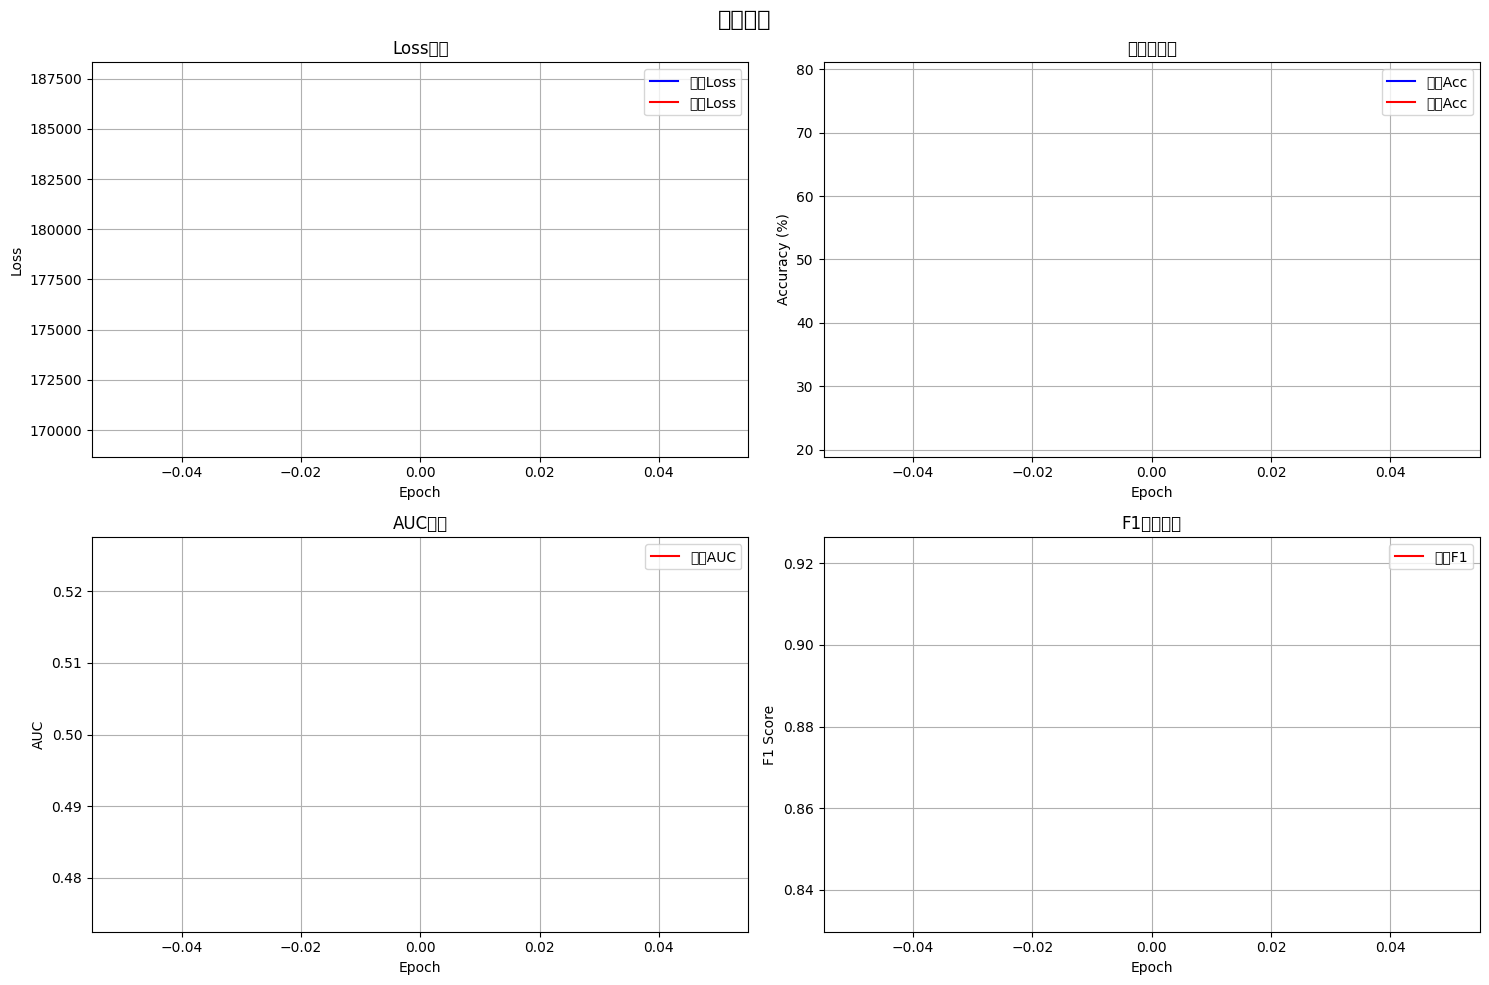

üìä ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®Â∑≤‰øùÂ≠òÂà∞ ./models/training_history.png


In [13]:
# Cell 12: ËÆ≠ÁªÉÂæ™ÁéØ

import os
import time

# Á°Æ‰øùÊ®°Âûã‰øùÂ≠òÁõÆÂΩïÂ≠òÂú®
os.makedirs('./models', exist_ok=True)

print("üöÄ ÂºÄÂßãËÆ≠ÁªÉ...")
print(f"üìä ËÆ≠ÁªÉÈÖçÁΩÆ: {len(train_loader)} ‰∏™ËÆ≠ÁªÉÊâπÊ¨°, {len(val_loader)} ‰∏™È™åËØÅÊâπÊ¨°")
print(f"üéØ Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: {sum(p.numel() for p in model.parameters()):,}")
print(f"üíæ ËÆæÂ§á: {device}")
print(f"üì¶ ÊâπÊ¨°Â§ßÂ∞è: {batch_size}")

if torch.cuda.is_available():
    print(f"üéÆ GPU: {torch.cuda.get_device_name(0)}")
    torch.cuda.reset_peak_memory_stats()

# ËÆ≠ÁªÉÂéÜÂè≤ËÆ∞ÂΩï
train_history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': [],
    'val_auc': [],
    'val_precision': [],
    'val_recall': [],
    'val_f1': []
}

best_val_loss = float('inf')
best_val_acc = 0.0
best_val_auc = 0.0

# ËÆ≠ÁªÉÂæ™ÁéØ
print("\nüîÑ ÂºÄÂßãËÆ≠ÁªÉÂæ™ÁéØ...")
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    # ËÆ≠ÁªÉÈò∂ÊÆµ
    train_results = train_epoch(
        model, train_loader, criterion, optimizer, device, 
        scheduler=scheduler, use_amp=True, gradient_clip=1.0
    )
    
    # È™åËØÅÈò∂ÊÆµ
    val_results = validate_epoch(
        model, val_loader, criterion, device
    )
    
    # ÊèêÂèñÁªìÊûú
    train_loss = train_results['loss']
    train_acc = train_results['accuracy'] * 100
    
    val_loss = val_results['loss']
    val_acc = val_results['accuracy'] * 100
    val_auc = val_results['auc']
    val_precision = val_results['precision']
    val_recall = val_results['recall']
    val_f1 = val_results['f1']
    
    # ËÆ∞ÂΩïÂéÜÂè≤
    train_history['train_loss'].append(train_loss)
    train_history['train_acc'].append(train_acc)
    train_history['val_loss'].append(val_loss)
    train_history['val_acc'].append(val_acc)
    train_history['val_auc'].append(val_auc)
    train_history['val_precision'].append(val_precision)
    train_history['val_recall'].append(val_recall)
    train_history['val_f1'].append(val_f1)
    
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    
    # ËÆ°ÁÆóepochÊó∂Èó¥
    epoch_time = time.time() - epoch_start_time
    
    # ÊâìÂç∞ÁªìÊûú
    print(f"ËÆ≠ÁªÉ: Loss={train_loss:.4f}, Acc={train_acc:.2f}%")
    print(f"È™åËØÅ: Loss={val_loss:.4f}, Acc={val_acc:.2f}%, AUC={val_auc:.4f}, F1={val_f1:.4f}")
    print(f"Â≠¶‰π†Áéá: {current_lr:.2e}, Áî®Êó∂: {epoch_time:.1f}s")
    
    # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
    if val_acc > best_val_acc:
        best_val_loss = val_loss
        best_val_acc = val_acc
        best_val_auc = val_auc
        
        print(f"üéØ Êñ∞ÁöÑÊúÄ‰Ω≥Ê®°Âûã! Acc: {best_val_acc:.2f}%, AUC: {best_val_auc:.4f}")
        
        # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_loss': best_val_loss,
            'best_val_acc': best_val_acc,
            'best_val_auc': best_val_auc,
            'train_history': train_history
        }, './models/best_model.pth')
        print("üíæ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò")
    
    # Êó©ÂÅúÊ£ÄÊü•
    if early_stopping(val_loss, model):
        print(f"\n‚èπÔ∏è Êó©ÂÅúËß¶ÂèëÔºåÂú®Á¨¨ {epoch+1} ËΩÆÂÅúÊ≠¢ËÆ≠ÁªÉ")
        break
    
    # Ê∏ÖÁêÜGPUÁºìÂ≠ò - ÂèåT4 GPUÂÜÖÂ≠òÁÆ°ÁêÜ
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        # Ê£ÄÊü•ÂÜÖÂ≠ò‰ΩøÁî®ÊÉÖÂÜµ - ÂèåT4ÊúâÊõ¥Â§ßÂÜÖÂ≠òÂÆπÈáè
        memory_used = torch.cuda.memory_allocated() / 1024**3
        if memory_used > 20:  # ÂèåT4ÂèØ‰ª•‰ΩøÁî®Êõ¥Â§öÂÜÖÂ≠òÔºåÊèêÈ´òÈòàÂÄºÂà∞20GB
            torch.cuda.empty_cache()
            print(f"‚ö†Ô∏è ÂÜÖÂ≠ò‰ΩøÁî®ËøáÈ´ò ({memory_used:.1f}GB)ÔºåÂ∑≤Ê∏ÖÁêÜÁºìÂ≠ò")
    
    # Ê£ÄÊü•ËÆ≠ÁªÉÊó∂Èó¥ÔºåÈò≤Ê≠¢Ë∂ÖÊó∂ - ÂèåT4ÂèØ‰ª•ËøêË°åÊõ¥ÈïøÊó∂Èó¥
    total_time = time.time() - epoch_start_time
    if total_time > 7200:  # ÂèåT4ÂèØ‰ª•ËøêË°åÊõ¥ÈïøÊó∂Èó¥ÔºåÊèêÈ´òÂà∞2Â∞èÊó∂
        print(f"‚è∞ ËÆ≠ÁªÉÊó∂Èó¥ËøáÈïø ({total_time/60:.1f}ÂàÜÈíü)ÔºåÊèêÂâçÂÅúÊ≠¢")
        break

print("\n‚úÖ ËÆ≠ÁªÉÂÆåÊàê!")
print(f"üèÜ ÊúÄÁªàÊúÄ‰Ω≥ÊÄßËÉΩ: Loss={best_val_loss:.4f}, Acc={best_val_acc:.2f}%, AUC={best_val_auc:.4f}")

if torch.cuda.is_available():
    print(f"üíæ Â≥∞ÂÄºGPUÂÜÖÂ≠ò‰ΩøÁî®: {torch.cuda.max_memory_allocated() / 1024**3:.1f}GB")

# ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤
def plot_training_history():
    """ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('ËÆ≠ÁªÉÂéÜÂè≤', fontsize=16, fontweight='bold')
    
    # Loss
    axes[0, 0].plot(train_history['train_loss'], label='ËÆ≠ÁªÉLoss', color='blue')
    axes[0, 0].plot(train_history['val_loss'], label='È™åËØÅLoss', color='red')
    axes[0, 0].set_title('LossÂèòÂåñ')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Accuracy
    axes[0, 1].plot(train_history['train_acc'], label='ËÆ≠ÁªÉAcc', color='blue')
    axes[0, 1].plot(train_history['val_acc'], label='È™åËØÅAcc', color='red')
    axes[0, 1].set_title('ÂáÜÁ°ÆÁéáÂèòÂåñ')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy (%)')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # AUC
    axes[1, 0].plot(train_history['val_auc'], label='È™åËØÅAUC', color='red')
    axes[1, 0].set_title('AUCÂèòÂåñ')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('AUC')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # F1 Score
    axes[1, 1].plot(train_history['val_f1'], label='È™åËØÅF1', color='red')
    axes[1, 1].set_title('F1ÂàÜÊï∞ÂèòÂåñ')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('F1 Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.savefig('./models/training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

# ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤
plot_training_history()

print("üìä ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®Â∑≤‰øùÂ≠òÂà∞ ./models/training_history.png")

# Cell 13: Ê®°ÂûãËØÑ‰º∞ÂíåÁªìÊûúÂàÜÊûê


üìä ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...
üîÑ Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã...
‚úÖ ÊàêÂäüÂä†ËΩΩÁ¨¨ 1 ËΩÆÁöÑÊúÄ‰Ω≥Ê®°Âûã
ÊúÄ‰Ω≥È™åËØÅÂáÜÁ°ÆÁéá: 78.26%
ÊúÄ‰Ω≥È™åËØÅAUC: 0.5000

üîç Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã...
üöÄ ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...


ËØÑ‰º∞ËøõÂ∫¶:   0%|          | 1/461 [00:06<47:28,  6.19s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   0%|          | 2/461 [00:13<50:57,  6.66s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   1%|          | 3/461 [00:21<55:06,  7.22s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   1%|          | 4/461 [00:26<49:34,  6.51s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   1%|          | 5/461 [00:31<46:12,  6.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   1%|‚ñè         | 6/461 [00:54<1:28:56, 11.73s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   2%|‚ñè         | 7/461 [00:58<1:09:53,  9.24s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   2%|‚ñè         | 8/461 [01:13<1:23:33, 11.07s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   2%|‚ñè         | 9/461 [01:36<1:51:29, 14.80s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   2%|‚ñè         | 10/461 [01:45<1:37:20, 12.95s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   2%|‚ñè         | 11/461 [01:50<1:18:56, 10.53s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   3%|‚ñé         | 12/461 [01:54<1:02:55,  8.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   3%|‚ñé         | 13/461 [01:57<52:37,  7.05s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   3%|‚ñé         | 14/461 [02:16<1:18:53, 10.59s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   3%|‚ñé         | 15/461 [02:38<1:44:07, 14.01s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   3%|‚ñé         | 16/461 [02:50<1:38:41, 13.31s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   4%|‚ñé         | 17/461 [02:53<1:16:57, 10.40s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   4%|‚ñç         | 18/461 [03:06<1:22:35, 11.19s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   4%|‚ñç         | 19/461 [03:13<1:12:09,  9.79s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   4%|‚ñç         | 20/461 [03:25<1:15:59, 10.34s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   5%|‚ñç         | 21/461 [03:36<1:18:03, 10.64s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   5%|‚ñç         | 22/461 [03:42<1:07:55,  9.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   5%|‚ñç         | 23/461 [03:53<1:12:21,  9.91s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   5%|‚ñå         | 24/461 [04:07<1:19:06, 10.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   5%|‚ñå         | 25/461 [04:10<1:02:07,  8.55s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   6%|‚ñå         | 26/461 [04:16<56:38,  7.81s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   6%|‚ñå         | 27/461 [04:20<48:16,  6.67s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   6%|‚ñå         | 28/461 [04:24<43:28,  6.02s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   6%|‚ñã         | 29/461 [04:36<54:40,  7.59s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   7%|‚ñã         | 30/461 [04:55<1:21:01, 11.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   7%|‚ñã         | 31/461 [05:07<1:21:20, 11.35s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   7%|‚ñã         | 32/461 [05:17<1:17:47, 10.88s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   7%|‚ñã         | 33/461 [05:23<1:06:58,  9.39s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   7%|‚ñã         | 34/461 [05:41<1:26:00, 12.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   8%|‚ñä         | 35/461 [05:48<1:15:20, 10.61s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   8%|‚ñä         | 36/461 [06:04<1:25:38, 12.09s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   8%|‚ñä         | 37/461 [06:16<1:25:51, 12.15s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   8%|‚ñä         | 38/461 [06:26<1:20:19, 11.39s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   8%|‚ñä         | 39/461 [06:29<1:03:43,  9.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   9%|‚ñä         | 40/461 [06:47<1:21:12, 11.57s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   9%|‚ñâ         | 41/461 [06:54<1:11:55, 10.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   9%|‚ñâ         | 42/461 [07:01<1:04:52,  9.29s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:   9%|‚ñâ         | 43/461 [07:09<1:02:02,  8.91s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  10%|‚ñâ         | 44/461 [07:21<1:08:03,  9.79s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  10%|‚ñâ         | 45/461 [07:31<1:08:34,  9.89s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  10%|‚ñâ         | 46/461 [07:39<1:03:40,  9.21s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  10%|‚ñà         | 47/461 [07:52<1:12:46, 10.55s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  10%|‚ñà         | 48/461 [08:02<1:10:20, 10.22s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  11%|‚ñà         | 49/461 [08:15<1:15:32, 11.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  11%|‚ñà         | 50/461 [08:18<1:00:13,  8.79s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  11%|‚ñà         | 51/461 [08:58<2:04:15, 18.18s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  11%|‚ñà‚ñè        | 52/461 [09:03<1:35:39, 14.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  11%|‚ñà‚ñè        | 53/461 [09:25<1:52:35, 16.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  12%|‚ñà‚ñè        | 54/461 [09:34<1:36:25, 14.22s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  12%|‚ñà‚ñè        | 55/461 [09:42<1:23:10, 12.29s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  12%|‚ñà‚ñè        | 56/461 [10:05<1:44:45, 15.52s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  12%|‚ñà‚ñè        | 57/461 [10:22<1:47:41, 15.99s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  13%|‚ñà‚ñé        | 58/461 [10:30<1:32:23, 13.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  13%|‚ñà‚ñé        | 59/461 [10:34<1:12:31, 10.82s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  13%|‚ñà‚ñé        | 60/461 [10:40<1:02:57,  9.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  13%|‚ñà‚ñé        | 61/461 [10:45<53:10,  7.98s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  13%|‚ñà‚ñé        | 62/461 [10:50<47:37,  7.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  14%|‚ñà‚ñé        | 63/461 [10:57<45:53,  6.92s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  14%|‚ñà‚ñç        | 64/461 [11:08<54:27,  8.23s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  14%|‚ñà‚ñç        | 65/461 [11:27<1:15:02, 11.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  14%|‚ñà‚ñç        | 66/461 [11:32<1:03:22,  9.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  15%|‚ñà‚ñç        | 67/461 [11:36<52:37,  8.01s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  15%|‚ñà‚ñç        | 68/461 [11:41<44:47,  6.84s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  15%|‚ñà‚ñç        | 69/461 [11:45<39:42,  6.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  15%|‚ñà‚ñå        | 70/461 [12:04<1:04:29,  9.90s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  15%|‚ñà‚ñå        | 71/461 [12:13<1:02:59,  9.69s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  16%|‚ñà‚ñå        | 72/461 [12:35<1:26:54, 13.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  16%|‚ñà‚ñå        | 73/461 [12:55<1:40:00, 15.47s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  16%|‚ñà‚ñå        | 74/461 [13:17<1:51:07, 17.23s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  16%|‚ñà‚ñã        | 75/461 [13:27<1:38:12, 15.27s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  16%|‚ñà‚ñã        | 76/461 [13:34<1:21:07, 12.64s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  17%|‚ñà‚ñã        | 77/461 [13:56<1:39:04, 15.48s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  17%|‚ñà‚ñã        | 78/461 [13:59<1:15:32, 11.83s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  17%|‚ñà‚ñã        | 79/461 [14:03<1:00:30,  9.50s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  17%|‚ñà‚ñã        | 80/461 [14:08<51:11,  8.06s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  18%|‚ñà‚ñä        | 81/461 [14:13<44:34,  7.04s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  18%|‚ñà‚ñä        | 82/461 [14:17<40:01,  6.34s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  18%|‚ñà‚ñä        | 83/461 [14:22<37:04,  5.88s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  18%|‚ñà‚ñä        | 84/461 [14:36<51:43,  8.23s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  18%|‚ñà‚ñä        | 85/461 [14:42<48:23,  7.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  19%|‚ñà‚ñä        | 86/461 [14:52<51:02,  8.17s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  19%|‚ñà‚ñâ        | 87/461 [14:58<47:29,  7.62s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  19%|‚ñà‚ñâ        | 88/461 [15:11<58:18,  9.38s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  19%|‚ñà‚ñâ        | 89/461 [15:15<47:43,  7.70s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  20%|‚ñà‚ñâ        | 90/461 [15:22<46:41,  7.55s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  20%|‚ñà‚ñâ        | 91/461 [15:25<38:15,  6.20s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  20%|‚ñà‚ñâ        | 92/461 [15:34<42:18,  6.88s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  20%|‚ñà‚ñà        | 93/461 [15:41<42:49,  6.98s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  20%|‚ñà‚ñà        | 94/461 [15:51<47:28,  7.76s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  21%|‚ñà‚ñà        | 95/461 [15:54<40:02,  6.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  21%|‚ñà‚ñà        | 96/461 [16:13<1:01:15, 10.07s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  21%|‚ñà‚ñà        | 97/461 [16:25<1:04:27, 10.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  21%|‚ñà‚ñà‚ñè       | 98/461 [16:30<54:50,  9.06s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  21%|‚ñà‚ñà‚ñè       | 99/461 [16:36<48:54,  8.11s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  22%|‚ñà‚ñà‚ñè       | 100/461 [16:49<57:07,  9.49s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  22%|‚ñà‚ñà‚ñè       | 101/461 [17:04<1:07:16, 11.21s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  22%|‚ñà‚ñà‚ñè       | 102/461 [17:22<1:18:45, 13.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  22%|‚ñà‚ñà‚ñè       | 103/461 [17:28<1:07:19, 11.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  23%|‚ñà‚ñà‚ñé       | 104/461 [17:41<1:09:49, 11.74s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  23%|‚ñà‚ñà‚ñé       | 105/461 [17:53<1:10:14, 11.84s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  23%|‚ñà‚ñà‚ñé       | 106/461 [18:16<1:29:08, 15.07s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  23%|‚ñà‚ñà‚ñé       | 107/461 [18:23<1:14:36, 12.65s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  23%|‚ñà‚ñà‚ñé       | 108/461 [18:33<1:09:04, 11.74s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  24%|‚ñà‚ñà‚ñé       | 109/461 [18:37<56:28,  9.63s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  24%|‚ñà‚ñà‚ñç       | 110/461 [18:45<53:36,  9.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  24%|‚ñà‚ñà‚ñç       | 111/461 [18:51<46:47,  8.02s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  24%|‚ñà‚ñà‚ñç       | 112/461 [19:12<1:09:28, 11.94s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  25%|‚ñà‚ñà‚ñç       | 113/461 [19:24<1:08:55, 11.88s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  25%|‚ñà‚ñà‚ñç       | 114/461 [19:32<1:02:38, 10.83s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  25%|‚ñà‚ñà‚ñç       | 115/461 [19:58<1:28:51, 15.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  25%|‚ñà‚ñà‚ñå       | 116/461 [20:06<1:16:22, 13.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  25%|‚ñà‚ñà‚ñå       | 117/461 [20:12<1:03:38, 11.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  26%|‚ñà‚ñà‚ñå       | 118/461 [20:16<51:04,  8.93s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  26%|‚ñà‚ñà‚ñå       | 119/461 [20:22<46:05,  8.09s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  26%|‚ñà‚ñà‚ñå       | 120/461 [20:34<51:43,  9.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  26%|‚ñà‚ñà‚ñå       | 121/461 [20:46<56:26,  9.96s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  26%|‚ñà‚ñà‚ñã       | 122/461 [20:49<45:38,  8.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  27%|‚ñà‚ñà‚ñã       | 123/461 [20:56<43:25,  7.71s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  27%|‚ñà‚ñà‚ñã       | 124/461 [21:24<1:16:21, 13.60s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  27%|‚ñà‚ñà‚ñã       | 125/461 [21:31<1:06:02, 11.79s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  27%|‚ñà‚ñà‚ñã       | 126/461 [21:40<1:01:09, 10.96s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  28%|‚ñà‚ñà‚ñä       | 127/461 [21:45<51:05,  9.18s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  28%|‚ñà‚ñà‚ñä       | 128/461 [21:52<47:15,  8.51s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  28%|‚ñà‚ñà‚ñä       | 129/461 [22:01<47:31,  8.59s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  28%|‚ñà‚ñà‚ñä       | 130/461 [22:16<57:12, 10.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  28%|‚ñà‚ñà‚ñä       | 131/461 [22:19<45:21,  8.25s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  29%|‚ñà‚ñà‚ñä       | 132/461 [22:23<38:39,  7.05s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  29%|‚ñà‚ñà‚ñâ       | 133/461 [22:31<39:37,  7.25s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  29%|‚ñà‚ñà‚ñâ       | 134/461 [22:40<42:23,  7.78s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  29%|‚ñà‚ñà‚ñâ       | 135/461 [22:44<36:31,  6.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  30%|‚ñà‚ñà‚ñâ       | 136/461 [22:48<32:14,  5.95s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  30%|‚ñà‚ñà‚ñâ       | 137/461 [22:57<36:07,  6.69s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  30%|‚ñà‚ñà‚ñâ       | 138/461 [23:02<34:29,  6.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  30%|‚ñà‚ñà‚ñà       | 139/461 [23:15<44:27,  8.29s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  30%|‚ñà‚ñà‚ñà       | 140/461 [23:22<41:41,  7.79s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  31%|‚ñà‚ñà‚ñà       | 141/461 [23:27<38:08,  7.15s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  31%|‚ñà‚ñà‚ñà       | 142/461 [23:41<48:24,  9.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  31%|‚ñà‚ñà‚ñà       | 143/461 [23:45<40:05,  7.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  31%|‚ñà‚ñà‚ñà       | 144/461 [23:50<35:55,  6.80s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  31%|‚ñà‚ñà‚ñà‚ñè      | 145/461 [24:14<1:03:20, 12.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  32%|‚ñà‚ñà‚ñà‚ñè      | 146/461 [24:24<1:00:22, 11.50s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  32%|‚ñà‚ñà‚ñà‚ñè      | 147/461 [24:27<46:52,  8.96s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  32%|‚ñà‚ñà‚ñà‚ñè      | 148/461 [24:32<39:25,  7.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  32%|‚ñà‚ñà‚ñà‚ñè      | 149/461 [24:50<55:55, 10.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  33%|‚ñà‚ñà‚ñà‚ñé      | 150/461 [24:59<53:44, 10.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  33%|‚ñà‚ñà‚ñà‚ñé      | 151/461 [25:03<43:43,  8.46s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  33%|‚ñà‚ñà‚ñà‚ñé      | 152/461 [25:08<37:56,  7.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  33%|‚ñà‚ñà‚ñà‚ñé      | 153/461 [25:21<45:44,  8.91s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  33%|‚ñà‚ñà‚ñà‚ñé      | 154/461 [25:27<40:45,  7.97s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  34%|‚ñà‚ñà‚ñà‚ñé      | 155/461 [25:33<38:25,  7.53s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  34%|‚ñà‚ñà‚ñà‚ñç      | 156/461 [25:45<44:37,  8.78s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  34%|‚ñà‚ñà‚ñà‚ñç      | 157/461 [25:52<42:38,  8.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  34%|‚ñà‚ñà‚ñà‚ñç      | 158/461 [26:05<48:57,  9.70s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  34%|‚ñà‚ñà‚ñà‚ñç      | 159/461 [26:10<41:29,  8.24s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  35%|‚ñà‚ñà‚ñà‚ñç      | 160/461 [26:26<53:12, 10.61s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  35%|‚ñà‚ñà‚ñà‚ñç      | 161/461 [26:34<49:01,  9.81s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  35%|‚ñà‚ñà‚ñà‚ñå      | 162/461 [26:43<47:57,  9.62s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  35%|‚ñà‚ñà‚ñà‚ñå      | 163/461 [26:56<52:44, 10.62s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  36%|‚ñà‚ñà‚ñà‚ñå      | 164/461 [27:08<54:37, 11.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  36%|‚ñà‚ñà‚ñà‚ñå      | 165/461 [27:12<44:21,  8.99s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  36%|‚ñà‚ñà‚ñà‚ñå      | 166/461 [27:18<39:09,  7.96s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  36%|‚ñà‚ñà‚ñà‚ñå      | 167/461 [27:32<48:44,  9.95s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  36%|‚ñà‚ñà‚ñà‚ñã      | 168/461 [27:36<38:53,  7.96s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  37%|‚ñà‚ñà‚ñà‚ñã      | 169/461 [27:40<33:14,  6.83s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  37%|‚ñà‚ñà‚ñà‚ñã      | 170/461 [27:46<32:35,  6.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  37%|‚ñà‚ñà‚ñà‚ñã      | 171/461 [27:57<37:43,  7.81s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  37%|‚ñà‚ñà‚ñà‚ñã      | 172/461 [28:04<36:45,  7.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  38%|‚ñà‚ñà‚ñà‚ñä      | 173/461 [28:20<48:20, 10.07s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  38%|‚ñà‚ñà‚ñà‚ñä      | 174/461 [28:35<55:33, 11.61s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  38%|‚ñà‚ñà‚ñà‚ñä      | 175/461 [28:46<55:03, 11.55s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  38%|‚ñà‚ñà‚ñà‚ñä      | 176/461 [28:50<43:42,  9.20s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  38%|‚ñà‚ñà‚ñà‚ñä      | 177/461 [28:54<35:32,  7.51s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  39%|‚ñà‚ñà‚ñà‚ñä      | 178/461 [29:03<37:42,  8.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  39%|‚ñà‚ñà‚ñà‚ñâ      | 179/461 [29:10<36:19,  7.73s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  39%|‚ñà‚ñà‚ñà‚ñâ      | 180/461 [29:15<32:06,  6.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  39%|‚ñà‚ñà‚ñà‚ñâ      | 181/461 [29:26<38:21,  8.22s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  39%|‚ñà‚ñà‚ñà‚ñâ      | 182/461 [29:32<35:30,  7.64s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  40%|‚ñà‚ñà‚ñà‚ñâ      | 183/461 [29:39<34:31,  7.45s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  40%|‚ñà‚ñà‚ñà‚ñâ      | 184/461 [29:58<49:54, 10.81s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  40%|‚ñà‚ñà‚ñà‚ñà      | 185/461 [30:08<48:01, 10.44s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  40%|‚ñà‚ñà‚ñà‚ñà      | 186/461 [30:31<1:05:28, 14.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  41%|‚ñà‚ñà‚ñà‚ñà      | 187/461 [30:35<50:56, 11.16s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  41%|‚ñà‚ñà‚ñà‚ñà      | 188/461 [30:38<39:52,  8.76s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  41%|‚ñà‚ñà‚ñà‚ñà      | 189/461 [30:44<36:20,  8.01s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  41%|‚ñà‚ñà‚ñà‚ñà      | 190/461 [30:58<43:59,  9.74s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 191/461 [31:10<47:05, 10.47s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 192/461 [31:14<37:41,  8.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 193/461 [31:20<34:31,  7.73s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 194/461 [31:26<32:48,  7.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 195/461 [31:34<32:39,  7.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 196/461 [31:38<27:56,  6.32s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 197/461 [31:42<25:46,  5.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 198/461 [31:51<28:37,  6.53s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 199/461 [31:59<31:29,  7.21s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 200/461 [32:12<38:27,  8.84s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 201/461 [32:17<33:20,  7.69s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 202/461 [32:21<28:25,  6.58s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 203/461 [32:27<28:08,  6.54s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 204/461 [32:40<35:48,  8.36s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 205/461 [32:44<29:53,  7.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 206/461 [32:52<31:29,  7.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 207/461 [33:03<35:03,  8.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 208/461 [33:09<32:24,  7.69s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 209/461 [33:21<38:30,  9.17s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 210/461 [33:32<39:30,  9.44s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 211/461 [33:41<39:21,  9.44s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 212/461 [33:45<32:53,  7.93s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 213/461 [33:57<37:07,  8.98s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 214/461 [34:07<38:53,  9.45s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 215/461 [34:23<46:10, 11.26s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 216/461 [34:35<46:31, 11.39s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 217/461 [34:43<42:31, 10.46s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 218/461 [35:09<1:01:09, 15.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 219/461 [35:13<47:52, 11.87s/it]  

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 220/461 [35:18<39:36,  9.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 221/461 [35:22<32:23,  8.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 222/461 [35:30<31:56,  8.02s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 223/461 [35:36<28:51,  7.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 224/461 [35:42<27:44,  7.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 225/461 [35:47<24:48,  6.31s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 226/461 [35:53<24:36,  6.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 227/461 [36:07<33:23,  8.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 228/461 [36:14<32:00,  8.24s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 229/461 [36:26<35:17,  9.13s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 230/461 [36:32<31:47,  8.26s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 231/461 [36:39<30:09,  7.87s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 232/461 [36:52<35:56,  9.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 233/461 [36:55<29:16,  7.71s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 234/461 [37:08<35:13,  9.31s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 235/461 [37:23<40:28, 10.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 236/461 [37:41<49:13, 13.13s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 237/461 [37:48<41:49, 11.20s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 238/461 [38:03<45:46, 12.32s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 239/461 [38:09<39:05, 10.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 240/461 [38:18<37:02, 10.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 241/461 [38:24<32:32,  8.88s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 242/461 [38:34<33:40,  9.23s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 243/461 [38:46<36:36, 10.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 244/461 [38:55<34:55,  9.65s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 245/461 [39:06<36:06, 10.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 246/461 [39:14<33:34,  9.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 247/461 [39:20<29:51,  8.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 248/461 [39:34<35:29, 10.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 249/461 [39:39<30:35,  8.66s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 250/461 [39:44<26:33,  7.55s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 251/461 [39:54<28:49,  8.24s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 252/461 [40:05<31:20,  9.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 253/461 [40:09<26:07,  7.54s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 254/461 [40:18<27:08,  7.87s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 255/461 [40:24<25:01,  7.29s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 256/461 [40:29<22:38,  6.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 257/461 [40:32<19:42,  5.80s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 258/461 [40:41<22:00,  6.51s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 259/461 [40:45<20:10,  5.99s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 260/461 [40:49<17:09,  5.12s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 261/461 [40:58<21:35,  6.48s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 262/461 [41:06<22:37,  6.82s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 263/461 [41:12<22:20,  6.77s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 264/461 [41:20<22:41,  6.91s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 265/461 [41:25<21:12,  6.49s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 266/461 [41:32<21:15,  6.54s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 267/461 [41:40<22:30,  6.96s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 268/461 [41:43<19:09,  5.96s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 269/461 [41:53<22:27,  7.02s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 270/461 [42:03<25:28,  8.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 271/461 [42:08<22:19,  7.05s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 272/461 [42:14<21:21,  6.78s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 273/461 [42:28<27:44,  8.85s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 274/461 [42:33<24:03,  7.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 275/461 [42:39<22:11,  7.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 276/461 [42:51<26:59,  8.76s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 277/461 [42:58<25:25,  8.29s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 278/461 [43:09<27:11,  8.92s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 279/461 [43:18<26:51,  8.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 280/461 [43:23<23:19,  7.73s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 281/461 [43:35<27:11,  9.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 282/461 [43:48<30:51, 10.34s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 283/461 [43:57<29:38,  9.99s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 284/461 [44:04<26:14,  8.90s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 285/461 [44:20<32:45, 11.17s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 286/461 [44:26<27:52,  9.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 287/461 [44:30<22:51,  7.88s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 288/461 [44:47<30:22, 10.53s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 289/461 [44:50<24:17,  8.48s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 290/461 [44:56<22:09,  7.77s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 291/461 [45:02<20:21,  7.19s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 292/461 [45:12<22:12,  7.89s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 293/461 [45:25<26:48,  9.58s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 294/461 [45:31<23:24,  8.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 295/461 [45:37<21:35,  7.80s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 296/461 [45:45<21:02,  7.65s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 297/461 [45:59<26:43,  9.78s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 298/461 [46:05<23:26,  8.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 299/461 [46:15<24:23,  9.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 300/461 [46:23<23:09,  8.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 301/461 [46:38<27:46, 10.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 302/461 [46:41<21:48,  8.23s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 303/461 [46:54<25:28,  9.67s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 304/461 [47:01<23:42,  9.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 305/461 [47:04<18:42,  7.19s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 306/461 [47:10<17:43,  6.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 307/461 [47:16<17:00,  6.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 308/461 [47:27<20:02,  7.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 309/461 [47:32<17:53,  7.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 310/461 [47:40<18:18,  7.28s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 311/461 [47:46<17:20,  6.93s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 312/461 [47:50<15:08,  6.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 313/461 [47:58<16:13,  6.58s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 314/461 [48:06<17:04,  6.97s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 315/461 [48:09<14:22,  5.90s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 316/461 [48:14<13:11,  5.46s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 317/461 [48:26<17:52,  7.45s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 318/461 [48:54<32:42, 13.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 319/461 [49:00<26:51, 11.35s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 320/461 [49:15<29:18, 12.47s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 321/461 [49:25<27:11, 11.65s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 322/461 [49:35<25:36, 11.05s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 323/461 [49:57<32:56, 14.32s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 324/461 [50:06<29:16, 12.82s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 325/461 [50:15<26:54, 11.87s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 326/461 [50:20<21:47,  9.68s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 327/461 [50:33<23:31, 10.53s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 328/461 [50:38<19:53,  8.98s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 329/461 [50:52<22:52, 10.39s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 330/461 [51:05<24:20, 11.15s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 331/461 [51:08<19:17,  8.91s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 332/461 [51:16<18:12,  8.47s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 333/461 [51:20<15:33,  7.30s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 334/461 [51:40<23:04, 10.90s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 335/461 [51:52<24:01, 11.44s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 336/461 [52:00<21:40, 10.40s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 337/461 [52:13<23:03, 11.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 338/461 [52:19<19:33,  9.54s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 339/461 [52:27<18:30,  9.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 340/461 [52:55<29:44, 14.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 341/461 [53:10<29:52, 14.94s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 342/461 [53:19<25:38, 12.93s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 343/461 [53:32<25:39, 13.05s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 344/461 [53:36<20:11, 10.35s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 345/461 [53:40<16:36,  8.59s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 346/461 [53:56<20:12, 10.54s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 347/461 [54:02<17:55,  9.43s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 348/461 [54:12<17:51,  9.48s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 349/461 [54:26<20:14, 10.84s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 350/461 [54:43<23:14, 12.57s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 351/461 [54:46<18:03,  9.85s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 352/461 [54:50<14:49,  8.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 353/461 [54:58<14:40,  8.15s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 354/461 [55:12<17:35,  9.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 355/461 [55:22<17:23,  9.85s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 356/461 [55:31<16:43,  9.56s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 357/461 [55:38<15:26,  8.91s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 358/461 [55:42<12:45,  7.43s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 359/461 [55:51<13:28,  7.92s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 360/461 [56:01<14:06,  8.38s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 361/461 [56:11<15:05,  9.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 362/461 [56:16<12:47,  7.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 363/461 [56:20<10:43,  6.57s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 364/461 [56:39<16:26, 10.17s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 365/461 [56:42<12:49,  8.01s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 366/461 [56:47<11:40,  7.38s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 367/461 [57:07<17:11, 10.98s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 368/461 [57:14<15:20,  9.89s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 369/461 [57:25<15:35, 10.17s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 370/461 [57:31<13:36,  8.97s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 371/461 [57:35<11:19,  7.55s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 372/461 [57:47<12:47,  8.62s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 373/461 [57:54<11:57,  8.15s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 374/461 [58:03<12:19,  8.50s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 375/461 [58:09<11:06,  7.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 376/461 [58:16<10:43,  7.57s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 377/461 [58:22<09:47,  7.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 378/461 [58:28<09:12,  6.65s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 379/461 [58:31<07:54,  5.79s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 380/461 [58:44<10:48,  8.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 381/461 [58:50<09:49,  7.37s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 382/461 [59:03<11:48,  8.97s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 383/461 [59:11<11:12,  8.62s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 384/461 [59:14<09:06,  7.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 385/461 [59:25<10:15,  8.10s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 386/461 [59:43<13:58, 11.18s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 387/461 [59:53<13:15, 10.75s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 388/461 [1:00:02<12:31, 10.29s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 389/461 [1:00:09<11:12,  9.34s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 390/461 [1:00:14<09:28,  8.00s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 391/461 [1:00:21<09:00,  7.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 392/461 [1:00:34<10:44,  9.34s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 393/461 [1:00:50<12:48, 11.30s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 394/461 [1:01:09<15:14, 13.64s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 395/461 [1:01:13<11:37, 10.57s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 396/461 [1:01:22<11:00, 10.16s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 397/461 [1:01:29<09:50,  9.22s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 398/461 [1:01:34<08:26,  8.04s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 399/461 [1:01:45<09:08,  8.84s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 400/461 [1:01:58<10:17, 10.13s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 401/461 [1:02:09<10:27, 10.47s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 402/461 [1:02:20<10:16, 10.45s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 403/461 [1:02:38<12:14, 12.67s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 404/461 [1:02:51<12:16, 12.93s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 405/461 [1:03:02<11:29, 12.31s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 406/461 [1:03:17<11:58, 13.07s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 407/461 [1:03:22<09:42, 10.78s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 408/461 [1:03:28<08:11,  9.27s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 409/461 [1:03:35<07:31,  8.68s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 410/461 [1:03:40<06:17,  7.41s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 411/461 [1:03:47<06:12,  7.45s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 412/461 [1:04:01<07:41,  9.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 413/461 [1:04:07<06:38,  8.31s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 414/461 [1:04:13<06:01,  7.69s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 415/461 [1:04:18<05:05,  6.64s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 416/461 [1:04:22<04:24,  5.87s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 417/461 [1:04:25<03:51,  5.26s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 418/461 [1:04:36<04:48,  6.71s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 419/461 [1:04:42<04:39,  6.66s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 420/461 [1:04:48<04:23,  6.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 421/461 [1:05:00<05:24,  8.11s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 422/461 [1:05:06<04:52,  7.49s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 423/461 [1:05:11<04:11,  6.61s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 424/461 [1:05:25<05:35,  9.07s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 425/461 [1:05:32<04:57,  8.26s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 426/461 [1:05:43<05:17,  9.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 427/461 [1:05:49<04:39,  8.21s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 428/461 [1:05:54<04:02,  7.34s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 429/461 [1:06:05<04:23,  8.23s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 430/461 [1:06:28<06:33, 12.68s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 431/461 [1:06:43<06:45, 13.51s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 432/461 [1:06:48<05:17, 10.94s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 433/461 [1:06:54<04:27,  9.57s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 434/461 [1:07:01<03:55,  8.72s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 435/461 [1:07:21<05:10, 11.93s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 436/461 [1:07:24<03:57,  9.48s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 437/461 [1:07:28<03:09,  7.89s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 438/461 [1:07:43<03:46,  9.85s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 439/461 [1:07:50<03:16,  8.94s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 440/461 [1:08:00<03:18,  9.46s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 441/461 [1:08:06<02:45,  8.30s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 442/461 [1:08:13<02:29,  7.86s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 443/461 [1:08:25<02:42,  9.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 444/461 [1:08:37<02:51, 10.08s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 445/461 [1:08:53<03:09, 11.85s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 446/461 [1:09:00<02:37, 10.49s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 447/461 [1:09:04<01:57,  8.42s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 448/461 [1:09:20<02:18, 10.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 449/461 [1:09:27<01:54,  9.51s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 450/461 [1:09:33<01:34,  8.63s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 451/461 [1:09:40<01:21,  8.20s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 452/461 [1:09:52<01:21,  9.06s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 453/461 [1:10:00<01:10,  8.78s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 454/461 [1:10:11<01:07,  9.67s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 455/461 [1:10:27<01:08, 11.48s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 456/461 [1:10:33<00:48,  9.69s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 457/461 [1:10:39<00:35,  8.84s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 458/461 [1:10:46<00:24,  8.03s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 459/461 [1:10:51<00:14,  7.13s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 460/461 [1:10:54<00:06,  6.05s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])


ËØÑ‰º∞ËøõÂ∫¶: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 461/461 [1:11:05<00:00,  9.25s/it]

üîç ËûçÂêàÁâπÂæÅÁª¥Â∫¶: [2048, 128, 32, 32]
‚úÖ ÁâπÂæÅËûçÂêàÊàêÂäü: torch.Size([2, 2240]) -> torch.Size([2, 256])
‚úÖ ËØÑ‰º∞ÂÆåÊàê
Âπ≥ÂùáÊçüÂ§±: 196426.2924
Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: 92.87 ms/batch

üìà ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á...

üìä ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:
ÊµãËØïÊçüÂ§±: 196426.2924
ÂáÜÁ°ÆÁéá: 0.7820 (78.20%)
Âπ≥Ë°°ÂáÜÁ°ÆÁéá: 0.5000 (50.00%)
Á≤æÁ°ÆÁéá: 0.7820
Âè¨ÂõûÁéá: 1.0000
ÁâπÂºÇÊÄß: 0.0000
F1ÂàÜÊï∞: 0.8777
AUC-ROC: 0.5000
AUC-PR: 0.8910
Ë¥üÈ¢ÑÊµãÂÄº: 0.0000

üîç Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:
ÁúüË¥ü‰æã (TN): 0
ÂÅáÊ≠£‰æã (FP): 201
ÂÅáË¥ü‰æã (FN): 0
ÁúüÊ≠£‰æã (TP): 721

‚ö° ÊÄßËÉΩÂàÜÊûê:
Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: 92.87 ms/batch
ÊÄªÊé®ÁêÜÊó∂Èó¥: 42.81 Áßí
ÊØè‰∏™Ê†∑Êú¨Êé®ÁêÜÊó∂Èó¥: 46.44 ms

üìã Á±ªÂà´ÁâπÂÆöÂàÜÊûê:
ÊÄªÊ†∑Êú¨Êï∞: 922
ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: 201 (21.8%)
‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: 721 (78.2%)
ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 0.0000 (0.00%)
‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 1.0000 (100.00%)

üìä ÁîüÊàêËØÑ‰º∞ÂõæË°®...


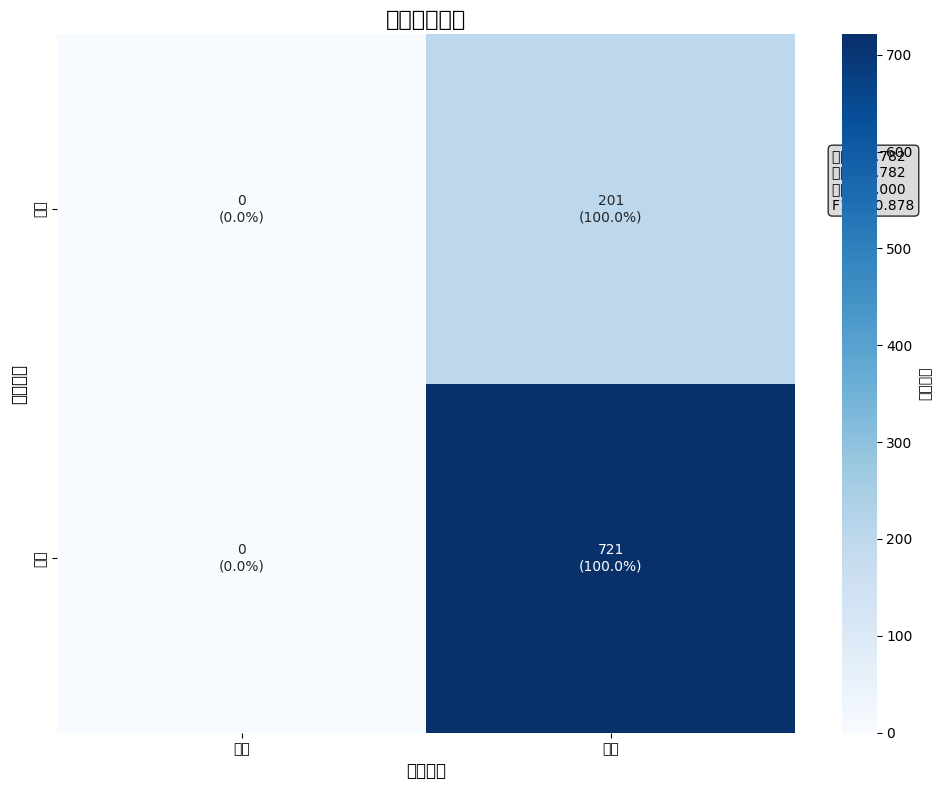

Ê∑∑Ê∑ÜÁü©ÈòµÂ∑≤‰øùÂ≠òÂà∞: ./results/evaluation/confusion_matrix.png


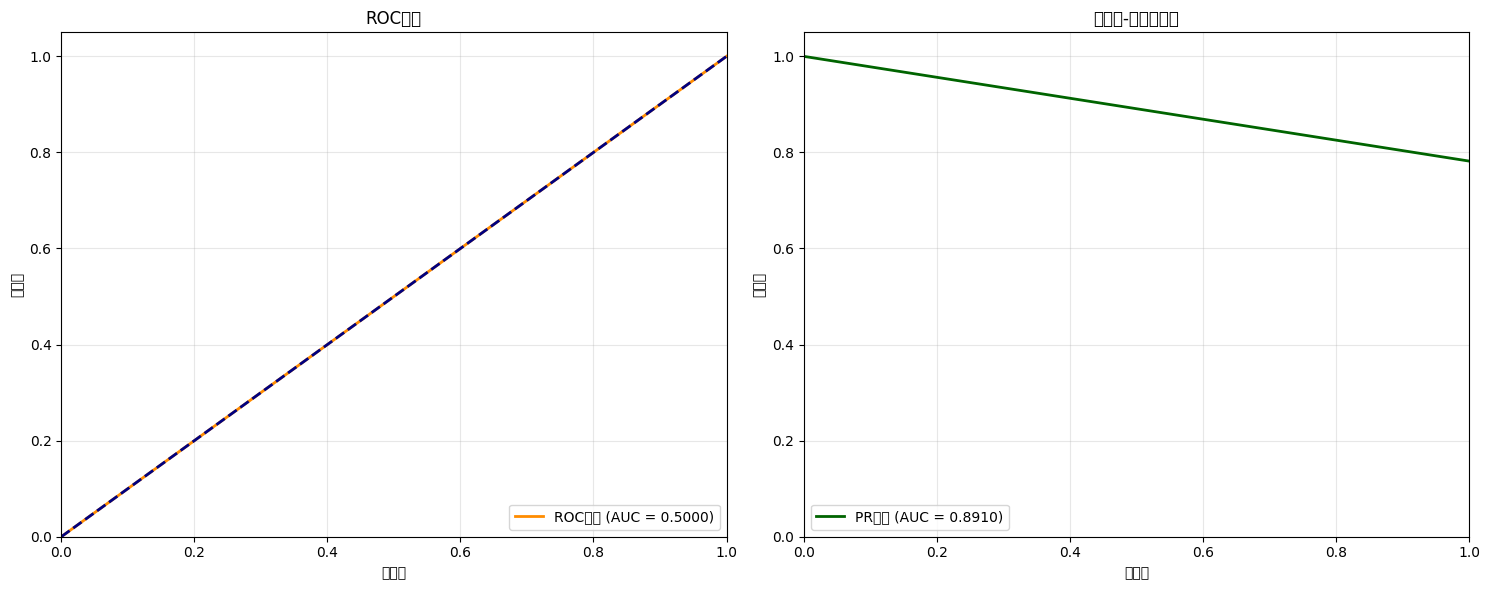

ROC/PRÊõ≤Á∫øÂ∑≤‰øùÂ≠òÂà∞: ./results/evaluation/roc_pr_curves.png


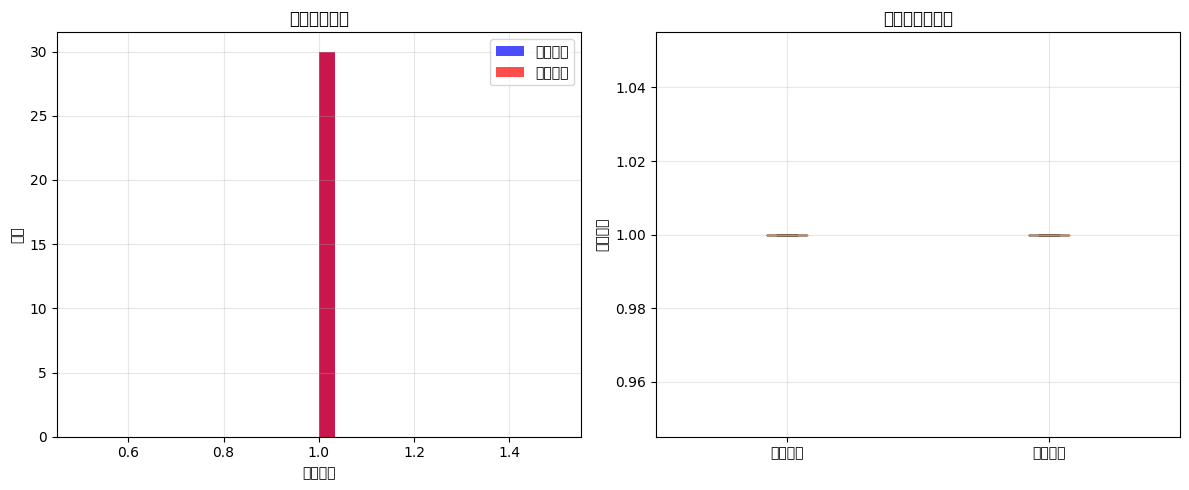

‚úÖ ËØÑ‰º∞ÂõæË°®ÁîüÊàêÂÆåÊàê

üìä Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä

üìà Êï∞ÊçÆÂàÜÂ∏É:
  ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: 201
  ‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: 721
  ‰∏çÂπ≥Ë°°ÊØî‰æã: 3.59:1 (‰º™ÈÄ†:ÁúüÂÆû)

üéØ Á±ªÂà´ÁâπÂÆöÂáÜÁ°ÆÁéá:
  ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 0.00%
  ‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 100.00%

üìã Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:
  ÁúüË¥ü‰æã (TN): 0 - Ê≠£Á°ÆËØÜÂà´ÁöÑÁúüÂÆûËßÜÈ¢ë
  ÂÅáÊ≠£‰æã (FP): 201 - ËØØÂà§‰∏∫‰º™ÈÄ†ÁöÑÁúüÂÆûËßÜÈ¢ë
  ÂÅáË¥ü‰æã (FN): 0 - ËØØÂà§‰∏∫ÁúüÂÆûÁöÑ‰º™ÈÄ†ËßÜÈ¢ë
  ÁúüÊ≠£‰æã (TP): 721 - Ê≠£Á°ÆËØÜÂà´ÁöÑ‰º™ÈÄ†ËßÜÈ¢ë

‚öñÔ∏è Ê®°ÂûãÂÅèÂêëÊÄßÂàÜÊûê:
  È¢ÑÊµã‰∏∫ÁúüÂÆûÁöÑÊ†∑Êú¨: 0 (0.0%)
  È¢ÑÊµã‰∏∫‰º™ÈÄ†ÁöÑÊ†∑Êú¨: 922 (100.0%)

üîç ÈóÆÈ¢òËØäÊñ≠:
  ‚ùå ‰∏•ÈáçÈóÆÈ¢ò: Ê®°ÂûãÂá†‰πéÊó†Ê≥ïËØÜÂà´ÁúüÂÆûËßÜÈ¢ë
  ‚ùå ‰∏•ÈáçÂÅèÂêë: Ê®°ÂûãËøáÂ∫¶ÂÅèÂêëÈ¢ÑÊµã‰º™ÈÄ†ËßÜÈ¢ë
  ‚ùå AUC-ROCËøá‰Ωé: Ê®°ÂûãÂà§Âà´ËÉΩÂäõÊé•ËøëÈöèÊú∫ÁåúÊµã

üí° ÊîπËøõÂª∫ËÆÆ:
  1. Â¢ûÂä†ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨ÊàñÂáèÂ∞ë‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨
  2. ‰ΩøÁî®Êõ¥Âº∫ÁöÑÁ±ªÂà´ÊùÉÈáç (pos_weight > 3.0)
  3. Ë∞ÉÊï¥Focal LossÂèÇÊï∞ (Èôç‰Ωéalpha, Â¢ûÂä†gamm

In [14]:
# Cell 13: Ê®°ÂûãËØÑ‰º∞ÂíåÁªìÊûúÂàÜÊûê

import torch
import os

print("üìä ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...")
print("=" * 60)

# Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã
print("üîÑ Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã...")
try:
    # ‰ΩøÁî®weights_only=FalseÊù•ÂÖºÂÆπÊóßÁâàÊú¨ÁöÑÊ®°ÂûãÊñá‰ª∂
    checkpoint = torch.load('./models/best_model.pth', map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    best_epoch = checkpoint['epoch']
    best_val_acc = checkpoint['best_val_acc']
    best_val_auc = checkpoint['best_val_auc']
    
    print(f"‚úÖ ÊàêÂäüÂä†ËΩΩÁ¨¨ {best_epoch+1} ËΩÆÁöÑÊúÄ‰Ω≥Ê®°Âûã")
    print(f"ÊúÄ‰Ω≥È™åËØÅÂáÜÁ°ÆÁéá: {best_val_acc:.2f}%")
    print(f"ÊúÄ‰Ω≥È™åËØÅAUC: {best_val_auc:.4f}")
except Exception as e:
    print(f"‚ùå Âä†ËΩΩÊ®°ÂûãÂ§±Ë¥•: {e}")
    print("‰ΩøÁî®ÂΩìÂâçÊ®°ÂûãËøõË°åËØÑ‰º∞")

# Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã
print("\nüîç Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã...")
eval_results = evaluate_model_optimized(model, test_loader, criterion, device)

# ËÆ°ÁÆóÂÖ®Èù¢ÁöÑËØÑ‰º∞ÊåáÊ†á
print("\nüìà ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á...")
metrics = calculate_comprehensive_metrics(
    eval_results['predictions'], 
    eval_results['targets'], 
    eval_results['scores']
)

# ÊâìÂç∞ËØ¶ÁªÜÁªìÊûú
print("\nüìä ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:")
print("=" * 50)
print(f"ÊµãËØïÊçüÂ§±: {eval_results['loss']:.4f}")
print(f"ÂáÜÁ°ÆÁéá: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
print(f"Âπ≥Ë°°ÂáÜÁ°ÆÁéá: {metrics['balanced_accuracy']:.4f} ({metrics['balanced_accuracy']*100:.2f}%)")
print(f"Á≤æÁ°ÆÁéá: {metrics['precision']:.4f}")
print(f"Âè¨ÂõûÁéá: {metrics['recall']:.4f}")
print(f"ÁâπÂºÇÊÄß: {metrics['specificity']:.4f}")
print(f"F1ÂàÜÊï∞: {metrics['f1']:.4f}")
print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
print(f"AUC-PR: {metrics['auc_pr']:.4f}")
print(f"Ë¥üÈ¢ÑÊµãÂÄº: {metrics['npv']:.4f}")

# Ê∑∑Ê∑ÜÁü©ÈòµËØ¶ÁªÜ‰ø°ÊÅØ
print("\nüîç Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:")
print(f"ÁúüË¥ü‰æã (TN): {metrics['tn']}")
print(f"ÂÅáÊ≠£‰æã (FP): {metrics['fp']}")
print(f"ÂÅáË¥ü‰æã (FN): {metrics['fn']}")
print(f"ÁúüÊ≠£‰æã (TP): {metrics['tp']}")

# ÊÄßËÉΩÂàÜÊûê
print("\n‚ö° ÊÄßËÉΩÂàÜÊûê:")
print(f"Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: {eval_results['avg_inference_time']*1000:.2f} ms/batch")
print(f"ÊÄªÊé®ÁêÜÊó∂Èó¥: {eval_results['total_inference_time']:.2f} Áßí")
print(f"ÊØè‰∏™Ê†∑Êú¨Êé®ÁêÜÊó∂Èó¥: {eval_results['avg_inference_time']*1000/batch_size:.2f} ms")

# ËÆ°ÁÆóÈ¢ùÂ§ñÊåáÊ†á
total_samples = len(eval_results['targets'])
real_samples = np.sum(eval_results['targets'] == 0)
fake_samples = np.sum(eval_results['targets'] == 1)
real_accuracy = np.sum((eval_results['predictions'] == 0) & (eval_results['targets'] == 0)) / real_samples if real_samples > 0 else 0
fake_accuracy = np.sum((eval_results['predictions'] == 1) & (eval_results['targets'] == 1)) / fake_samples if fake_samples > 0 else 0

print("\nüìã Á±ªÂà´ÁâπÂÆöÂàÜÊûê:")
print(f"ÊÄªÊ†∑Êú¨Êï∞: {total_samples}")
print(f"ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: {real_samples} ({real_samples/total_samples*100:.1f}%)")
print(f"‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: {fake_samples} ({fake_samples/total_samples*100:.1f}%)")
print(f"ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {real_accuracy:.4f} ({real_accuracy*100:.2f}%)")
print(f"‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {fake_accuracy:.4f} ({fake_accuracy*100:.2f}%)")

# ÁîüÊàêÂèØËßÜÂåñÂõæË°®
print("\nüìä ÁîüÊàêËØÑ‰º∞ÂõæË°®...")

# Á°Æ‰øùÁªìÊûúÁõÆÂΩïÂ≠òÂú®
os.makedirs('./results/evaluation', exist_ok=True)

# ÁªòÂà∂Â¢ûÂº∫Ê∑∑Ê∑ÜÁü©Èòµ
plot_enhanced_confusion_matrix(
    metrics['confusion_matrix'], 
    './results/evaluation/confusion_matrix.png'
)

# ÁªòÂà∂ROCÂíåPRÊõ≤Á∫ø
plot_roc_pr_curves(
    eval_results['targets'], 
    eval_results['scores'], 
    './results/evaluation/roc_pr_curves.png'
)

# È¢ÑÊµãÂàÜÊï∞ÂàÜÂ∏ÉÂõæ
plt.figure(figsize=(12, 5))

# ÁúüÂÆûËßÜÈ¢ëÁöÑÈ¢ÑÊµãÂàÜÊï∞ÂàÜÂ∏É
plt.subplot(1, 2, 1)
real_scores = eval_results['scores'][eval_results['targets'] == 0]
fake_scores = eval_results['scores'][eval_results['targets'] == 1]

plt.hist(real_scores, bins=30, alpha=0.7, label='ÁúüÂÆûËßÜÈ¢ë', color='blue', density=True)
plt.hist(fake_scores, bins=30, alpha=0.7, label='‰º™ÈÄ†ËßÜÈ¢ë', color='red', density=True)
plt.xlabel('È¢ÑÊµãÂàÜÊï∞')
plt.ylabel('ÂØÜÂ∫¶')
plt.title('È¢ÑÊµãÂàÜÊï∞ÂàÜÂ∏É')
plt.legend()
plt.grid(True, alpha=0.3)

# È¢ÑÊµãÂàÜÊï∞ÁÆ±Á∫øÂõæ
plt.subplot(1, 2, 2)
scores_data = [real_scores, fake_scores]
labels = ['ÁúüÂÆûËßÜÈ¢ë', '‰º™ÈÄ†ËßÜÈ¢ë']
plt.boxplot(scores_data, labels=labels)
plt.ylabel('È¢ÑÊµãÂàÜÊï∞')
plt.title('È¢ÑÊµãÂàÜÊï∞ÁÆ±Á∫øÂõæ')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./results/evaluation/score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úÖ ËØÑ‰º∞ÂõæË°®ÁîüÊàêÂÆåÊàê")

# ÁîüÊàêËØ¶ÁªÜÁöÑÁ±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä
generate_class_imbalance_report(metrics)

print("=" * 60)
print("üéâ Ê®°ÂûãËØÑ‰º∞ÂÆåÊàêÔºÅ")
print("üìÅ ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ ./results/evaluation/ ÁõÆÂΩï")
print("\nüí° Â¶ÇÊûúÂèëÁé∞‰∏•ÈáçÁöÑÁ±ªÂà´ÂÅèÂêëÈóÆÈ¢òÔºåËØ∑ÂèÇËÄÉ‰∏äËø∞ÊîπËøõÂª∫ËÆÆËøõË°å‰ºòÂåñ")

# Cell 14: ÁªìÊûú‰øùÂ≠òÂíåÊÄªÁªì


In [15]:
# Cell 14: ÁªìÊûú‰øùÂ≠òÂíåÊÄªÁªì

import os
import torch
import pandas as pd
from datetime import datetime

print("üíæ ‰øùÂ≠òÂÆûÈ™åÁªìÊûú...")
print("=" * 60)

# Á°Æ‰øùÁªìÊûúÁõÆÂΩïÂ≠òÂú®
os.makedirs('./results', exist_ok=True)

# ÂáÜÂ§á‰øùÂ≠òÁöÑÁªìÊûúÊï∞ÊçÆ
results_summary = {
    'experiment_info': {
        'timestamp': datetime.now().isoformat(),
        'model_architecture': 'OptimizedDeepfakeDetector',
        'backbone': 'resnet50',
        'total_epochs': len(train_history['train_loss']),
        'early_stopping': True
    },
    'dataset_info': {
        'train_samples': len(train_dataset),
        'val_samples': len(val_dataset),
        'test_samples': len(test_dataset),
        'batch_size': batch_size
    },
    'training_config': {
        'optimizer': 'AdamW',
        'learning_rate': 1e-4,
        'weight_decay': 1e-4,
        'loss_function': 'FocalLoss',
        'scheduler': 'OneCycleLR',
        'early_stopping_patience': 7
    },
    'final_metrics': {
        'test_loss': float(eval_results['loss']),
        'accuracy': float(metrics['accuracy']),
        'precision': float(metrics['precision']),
        'recall': float(metrics['recall']),
        'f1_score': float(metrics['f1']),
        'auc_roc': float(metrics['auc_roc'])
    },
    'confusion_matrix': {
        'tn': int(metrics['tn']),
        'fp': int(metrics['fp']),
        'fn': int(metrics['fn']),
        'tp': int(metrics['tp'])
    },
    'training_history': {
        'train_loss': [float(x) for x in train_history['train_loss']],
        'train_acc': [float(x) for x in train_history['train_acc']],
        'val_loss': [float(x) for x in train_history['val_loss']],
        'val_acc': [float(x) for x in train_history['val_acc']],
        'val_auc': [float(x) for x in train_history['val_auc']],
        'val_precision': [float(x) for x in train_history.get('val_precision', [])],
        'val_recall': [float(x) for x in train_history.get('val_recall', [])],
        'val_f1': [float(x) for x in train_history.get('val_f1', [])]
    },
    'class_specific_metrics': {
        'real_video_accuracy': float(real_accuracy),
        'fake_video_accuracy': float(fake_accuracy),
        'real_samples_count': int(real_samples),
        'fake_samples_count': int(fake_samples)
    }
}

# ‰øùÂ≠òÁªìÊûúÂà∞JSONÊñá‰ª∂
results_file = './results/experiment_results.json'
with open(results_file, 'w', encoding='utf-8') as f:
    json.dump(results_summary, f, indent=2, ensure_ascii=False)

print(f"‚úÖ ÂÆûÈ™åÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {results_file}")

# ‰øùÂ≠òËÆ≠ÁªÉÂéÜÂè≤Âà∞CSV
history_df = pd.DataFrame(train_history)
history_df.to_csv('./results/training_history.csv', index=False)
print("‚úÖ ËÆ≠ÁªÉÂéÜÂè≤Â∑≤‰øùÂ≠òÂà∞: ./results/training_history.csv")

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú
predictions_df = pd.DataFrame({
    'true_label': eval_results['targets'],
    'predicted_label': eval_results['predictions'],
    'prediction_score': eval_results['scores']
})
predictions_df.to_csv('./results/test_predictions.csv', index=False)
print("‚úÖ ÊµãËØïÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: ./results/test_predictions.csv")

# ÁîüÊàêÂÆûÈ™åÊä•Âëä
print("\nüìã ÁîüÊàêÂÆûÈ™åÊä•Âëä...")
report = f"""
Ê∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÊ®°ÂûãÂÆûÈ™åÊä•Âëä
{'='*50}

ÂÆûÈ™åÊó∂Èó¥: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Ê®°ÂûãÊû∂ÊûÑ: OptimizedDeepfakeDetector (ResNet50 + LSTM + Attention)

Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:
- ËÆ≠ÁªÉÊ†∑Êú¨: {len(train_dataset):,}
- È™åËØÅÊ†∑Êú¨: {len(val_dataset):,}
- ÊµãËØïÊ†∑Êú¨: {len(test_dataset):,}
- ÊâπÊ¨°Â§ßÂ∞è: {batch_size}

ËÆ≠ÁªÉÈÖçÁΩÆ:
- ‰ºòÂåñÂô®: AdamW (lr=1e-4, weight_decay=1e-4)
- ÊçüÂ§±ÂáΩÊï∞: Focal Loss
- Â≠¶‰π†ÁéáË∞ÉÂ∫¶: OneCycleLR
- Êó©ÂÅúÊú∫Âà∂: patience=7

ÊúÄÁªàÊÄßËÉΩÊåáÊ†á:
- ÂáÜÁ°ÆÁéá: {metrics['accuracy']*100:.2f}%
- Á≤æÁ°ÆÁéá: {metrics['precision']:.4f}
- Âè¨ÂõûÁéá: {metrics['recall']:.4f}
- F1ÂàÜÊï∞: {metrics['f1']:.4f}
- AUC-ROC: {metrics['auc_roc']:.4f}

Ê∑∑Ê∑ÜÁü©Èòµ:
- ÁúüË¥ü‰æã (TN): {metrics['tn']}
- ÂÅáÊ≠£‰æã (FP): {metrics['fp']}
- ÂÅáË¥ü‰æã (FN): {metrics['fn']}
- ÁúüÊ≠£‰æã (TP): {metrics['tp']}

Á±ªÂà´ÁâπÂÆöÊÄßËÉΩ:
- ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {real_accuracy*100:.2f}%
- ‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {fake_accuracy*100:.2f}%

ËÆ≠ÁªÉÊÄªÁªì:
- ËÆ≠ÁªÉËΩÆÊï∞: {len(train_history['train_loss'])}
- ÊúÄ‰Ω≥È™åËØÅÂáÜÁ°ÆÁéá: {max(train_history['val_acc']):.2f}%
- ÊúÄ‰Ω≥È™åËØÅAUC: {max(train_history['val_auc']):.4f}

Êñá‰ª∂ËæìÂá∫:
- Ê®°ÂûãÊùÉÈáç: ./models/best_model.pth
- ÂÆûÈ™åÁªìÊûú: ./results/experiment_results.json
- ËÆ≠ÁªÉÂéÜÂè≤: ./results/training_history.csv
- È¢ÑÊµãÁªìÊûú: ./results/test_predictions.csv

{'='*50}
ÂÆûÈ™åÂÆåÊàêÊó∂Èó¥: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

# ‰øùÂ≠òÊä•Âëä
with open('./results/experiment_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("‚úÖ ÂÆûÈ™åÊä•ÂëäÂ∑≤‰øùÂ≠òÂà∞: ./results/experiment_report.txt")

# ÊâìÂç∞ÊúÄÁªàÊÄªÁªì
print("\n" + "="*60)
print("üéâ Ê∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ")
print("="*60)
print(f"üìä ÊúÄÁªàÊµãËØïÂáÜÁ°ÆÁéá: {metrics['accuracy']*100:.2f}%")
print(f"üìä AUC-ROCÂàÜÊï∞: {metrics['auc_roc']:.4f}")
print(f"üìä F1ÂàÜÊï∞: {metrics['f1']:.4f}")
print("\nüìÅ ÊâÄÊúâÁªìÊûúÊñá‰ª∂Â∑≤‰øùÂ≠òÂà∞ ./results/ ÁõÆÂΩï")
print("üìÅ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞ ./models/best_model.pth")
print("\n‚ú® ÂÆûÈ™åÊàêÂäüÂÆåÊàêÔºÅ")
print("="*60)

# ÊòæÁ§∫Êñá‰ª∂ÁªìÊûÑ
print("\nüìÇ ÁîüÊàêÁöÑÊñá‰ª∂ÁªìÊûÑ:")
print("""
./models/
  ‚îî‚îÄ‚îÄ best_model.pth
./results/
  ‚îú‚îÄ‚îÄ experiment_results.json
  ‚îú‚îÄ‚îÄ experiment_report.txt
  ‚îú‚îÄ‚îÄ training_history.csv
  ‚îî‚îÄ‚îÄ test_predictions.csv
""")

print("\nüöÄ ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ã‰ª£Á†ÅÂä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãËøõË°åÊé®ÁêÜ:")
print("""
# Âä†ËΩΩÊ®°Âûã
model = OptimizedDeepfakeDetector(...)
checkpoint = torch.load('./models/best_model.pth', weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
""")

print("\n‚úÖ Kaggle T4 GPU‰ºòÂåñÁâàÊú¨ - ËÆ≠ÁªÉÂÆåÊàêÔºÅ")

üíæ ‰øùÂ≠òÂÆûÈ™åÁªìÊûú...
‚úÖ ÂÆûÈ™åÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: ./results/experiment_results.json
‚úÖ ËÆ≠ÁªÉÂéÜÂè≤Â∑≤‰øùÂ≠òÂà∞: ./results/training_history.csv
‚úÖ ÊµãËØïÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: ./results/test_predictions.csv

üìã ÁîüÊàêÂÆûÈ™åÊä•Âëä...
‚úÖ ÂÆûÈ™åÊä•ÂëäÂ∑≤‰øùÂ≠òÂà∞: ./results/experiment_report.txt

üéâ Ê∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ
üìä ÊúÄÁªàÊµãËØïÂáÜÁ°ÆÁéá: 78.20%
üìä AUC-ROCÂàÜÊï∞: 0.5000
üìä F1ÂàÜÊï∞: 0.8777

üìÅ ÊâÄÊúâÁªìÊûúÊñá‰ª∂Â∑≤‰øùÂ≠òÂà∞ ./results/ ÁõÆÂΩï
üìÅ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞ ./models/best_model.pth

‚ú® ÂÆûÈ™åÊàêÂäüÂÆåÊàêÔºÅ

üìÇ ÁîüÊàêÁöÑÊñá‰ª∂ÁªìÊûÑ:

./models/
  ‚îî‚îÄ‚îÄ best_model.pth
./results/
  ‚îú‚îÄ‚îÄ experiment_results.json
  ‚îú‚îÄ‚îÄ experiment_report.txt
  ‚îú‚îÄ‚îÄ training_history.csv
  ‚îî‚îÄ‚îÄ test_predictions.csv


üöÄ ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ã‰ª£Á†ÅÂä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãËøõË°åÊé®ÁêÜ:

# Âä†ËΩΩÊ®°Âûã
model = OptimizedDeepfakeDetector(...)
checkpoint = torch.load('./models/best_model.pth', weights_only=False)
model.l